In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

path1 = './face/'
path2 = './non-face/'

face_list = os.listdir(path1)
nonface_list = os.listdir(path2)

def readimg(file_path):
    img = cv2.imread(file_path, 0)
    height, width = img.shape
    vector_size = height*width
    img_vector = img.reshape(1, vector_size)
    return img_vector


face_cube = readimg(path1+face_list[0])

for line in face_list:
    tmp_vector = readimg(path1+line)
    face_cube = np.append(face_cube, tmp_vector, axis = 0)
    
nonface_cube = readimg(path2+nonface_list[0])

for line in nonface_list:
    tmp_vector = readimg(path2+line)
    nonface_cube = np.append(nonface_cube, tmp_vector, axis = 0)
    
def face_show(index):
    img = face_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')

def nonface_show(index):
    img = nonface_cube[index,:].reshape(32,32)
    plt.imshow(img,cmap = 'gray')


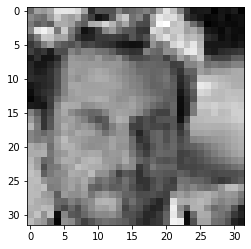

In [2]:
face_show(300)

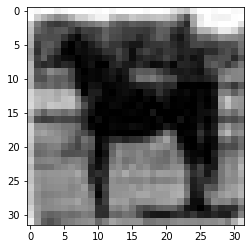

In [3]:
nonface_show(200)

In [4]:
img_set = np.append(face_cube, nonface_cube, axis = 0)

In [5]:
img_set.shape

(11994, 1024)

In [6]:
label = np.zeros(len(img_set))
# 1 for face , 0 for nonface
label[:len(face_cube)] = 1
label[len(face_cube):len(nonface_cube)] = 0
Normal_pairs = [(img_set[i], label[i]) for i in range(len(img_set))]

import random
random.shuffle(Normal_pairs)
Training_set = Normal_pairs[:int(len(img_set)*0.5)]
Test_set = Normal_pairs[int(len(img_set)*0.5)+1:int(len(img_set))]

In [7]:
len(Training_set)

5997

In [8]:
len(Test_set)

5996

In [9]:
Training_label = [Training_set[i][1] for i in range(len(Training_set))]
Training_data = [Training_set[i][0] for i in range(len(Training_set))]

Training_data = np.array(Training_data)
Training_label = np.array(Training_label)

Test_label = np.array([Test_set[i][1] for i in range(len(Test_set))])
Test_data = np.array([Test_set[i][0] for i in range(len(Test_set))])

In [178]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [175]:
def model(X, theta):
    return sigmoid(np.dot(X, theta))

In [12]:
Training_data

array([[ 41,  42,  42, ...,  74,  61,  57],
       [106, 105, 105, ...,  99, 106, 106],
       [180, 125,  98, ...,  28,  86,  53],
       ...,
       [ 80,  80,  79, ..., 144, 143, 142],
       [ 24,  25,  26, ...,  56,  47,  47],
       [221, 233, 180, ..., 196, 134, 143]], dtype=uint8)

In [107]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1-y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [240]:
c = np.ones(len(Training_data)).T
X = np.c_[c, Training_data]
Y = Training_label.reshape(len(Training_label), 1)
b = 0
theta = np.zeros((1025,1))

In [241]:
X.shape


(5997, 1025)

In [251]:
def propagate(w, b, X, Y):

    m = X.shape[1]    
    A = sigmoid(0.0001*np.dot(X,w)+b)
    cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m                 
    print('cost',cost)
    dZ = A-Y
    dw = (np.dot(X.T,dZ))/m
    db = (np.sum(dZ))/m  
    
    grads = {"dw": dw,             "db": db}    
    return grads, cost

In [252]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    for i in range(num_iterations):        
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]        

        w = w - learning_rate*dw
        b = b - learning_rate*db        
        if i % 10 == 0:
            print(cost)
    params = {"w": w,              "b": b}
    grads = {"dw": dw,             "db": db}    
    return params, grads, cost

In [259]:
params, grads, cost = optimize(theta, b, X, y, 100000, 0.001)

cost 4.101276212957047
4.101276212957047
cost 3.043930067968355
cost 2.8794567606282286
cost 2.7594533504219094
cost 2.7016448713712813
cost 2.6587515058612134
cost 2.6283735035541227
cost 2.6028739307889444
cost 2.580545679996214
cost 2.559905652670546
cost 2.5404214685668562
2.5404214685668562
cost 2.5217764211151232
cost 2.503826400299051
cost 2.4864866316728547
cost 2.469705602671216
cost 2.4534451159813
cost 2.4376744414557443
cost 2.422366619216555
cost 2.407497408934916
cost 2.393044516209993
cost 2.378987347040157
2.378987347040157
cost 2.365306763403598
cost 2.351984955552123
cost 2.3390053092496235
cost 2.3263523060946683
cost 2.3140114278031865
cost 2.301969074405459
cost 2.2902124888997317
cost 2.2787296902260716
cost 2.26750941229838
cost 2.2565410490213837
2.2565410490213837
cost 2.245814604347576
cost 2.2353206469595963
cost 2.2250502690253136
cost 2.2149950486250045
cost 2.205147015459103
cost 2.195498619507589
cost 2.1860427023425246
cost 2.1767724708323115
cost 2.1676

cost 1.3671829385770133
cost 1.3660972701605636
cost 1.3650156420318946
cost 1.3639380285290097
cost 1.362864404223292
cost 1.3617947439167248
cost 1.3607290226391535
cost 1.3596672156455871
cost 1.3586092984135412
1.3586092984135412
cost 1.357555246640417
cost 1.3565050362409212
cost 1.3554586433445222
cost 1.3544160442929432
cost 1.3533772156376915
cost 1.3523421341376247
cost 1.35131077675655
cost 1.3502831206608585
cost 1.3492591432171954
cost 1.3482388219901609
1.3482388219901609
cost 1.3472221347400426
cost 1.346209059420586
cost 1.345199574176789
cost 1.3441936573427344
cost 1.3431912874394465
cost 1.3421924431727825
cost 1.3411971034313528
cost 1.340205247284467
cost 1.339216853980113
cost 1.3382319029429595
1.3382319029429595
cost 1.3372503737723909
cost 1.3362722462405656
cost 1.335297500290503
cost 1.3343261160341955
cost 1.3333580737507473
cost 1.3323933538845383
cost 1.331431937043413
cost 1.330473803996893
cost 1.3295189356744173
cost 1.3285673131635996
1.3285673131635996

cost 1.134791604741307
cost 1.1343562122969937
cost 1.1339216834395582
cost 1.1334880153023648
cost 1.1330552050321623
cost 1.1326232497890047
cost 1.1321921467461697
1.1321921467461697
cost 1.1317618930900795
cost 1.1313324860202207
cost 1.1309039227490671
cost 1.1304762005020002
cost 1.1300493165172325
cost 1.1296232680457299
cost 1.1291980523511358
cost 1.128773666709696
cost 1.1283501084101817
cost 1.1279273747538165
1.1279273747538165
cost 1.1275054630542016
cost 1.1270843706372418
cost 1.1266640948410729
cost 1.1262446330159892
cost 1.125825982524372
cost 1.1254081407406171
cost 1.1249911050510633
cost 1.1245748728539255
cost 1.1241594415592198
cost 1.1237448085886983
1.1237448085886983
cost 1.1233309713757773
cost 1.1229179273654708
cost 1.1225056740143218
cost 1.1220942087903345
cost 1.1216835291729081
cost 1.1212736326527704
cost 1.120864516731911
cost 1.1204561789235163
cost 1.1200486167519041
cost 1.1196418277524605
1.1196418277524605
cost 1.1192358094715733
cost 1.118830559

1.0167496771459024
cost 1.0165087205339787
cost 1.0162680846026162
cost 1.0160277686358508
cost 1.0157877719199464
cost 1.0155480937433856
cost 1.0153087333968605
cost 1.0150696901732637
cost 1.0148309633676813
cost 1.0145925522773822
cost 1.0143544562018103
1.0143544562018103
cost 1.014116674442575
cost 1.0138792063034434
cost 1.0136420510903321
cost 1.0134052081112974
cost 1.013168676676528
cost 1.0129324560983357
cost 1.0126965456911472
cost 1.0124609447714963
cost 1.0122256526580147
cost 1.0119906686714242
1.0119906686714242
cost 1.0117559921345287
cost 1.0115216223722054
cost 1.0112875587113965
cost 1.0110538004811032
cost 1.010820347012373
cost 1.0105871976382974
cost 1.010354351693999
cost 1.0101218085166266
cost 1.0098895674453463
cost 1.0096576278213327
1.0096576278213327
cost 1.0094259889877626
cost 1.009194650289806
cost 1.0089636110746185
cost 1.0087328706913352
cost 1.0085024284910598
cost 1.0082722838268596
cost 1.0080424360537574
cost 1.0078128845287229
cost 1.0075836286

cost 0.9522384494411916
cost 0.95207338484289
cost 0.9519084897564818
cost 0.9517437638871555
cost 0.9515792069408118
cost 0.9514148186240616
cost 0.9512505986442239
0.9512505986442239
cost 0.9510865467093235
cost 0.9509226625280885
cost 0.9507589458099496
cost 0.9505953962650351
cost 0.9504320136041721
cost 0.9502687975388817
cost 0.9501057477813782
cost 0.9499428640445665
cost 0.9497801460420403
cost 0.9496175934880797
0.9496175934880797
cost 0.949455206097649
cost 0.9492929835863951
cost 0.9491309256706448
cost 0.9489690320674031
cost 0.9488073024943512
cost 0.948645736669844
cost 0.9484843343129082
cost 0.9483230951432408
cost 0.948162018881206
cost 0.9480011052478343
0.9480011052478343
cost 0.9478403539648195
cost 0.9476797647545172
cost 0.9475193373399428
cost 0.9473590714447692
cost 0.9471989667933253
cost 0.9470390231105928
cost 0.9468792401222065
cost 0.9467196175544497
cost 0.9465601551342536
cost 0.9464008525891958
0.9464008525891958
cost 0.946241709647497
cost 0.94608272603

cost 0.9028514302349229
cost 0.9027318585713956
cost 0.9026123847459536
cost 0.9024930086212112
cost 0.9023737300600507
0.9023737300600507
cost 0.9022545489256216
cost 0.9021354650813401
cost 0.902016478390888
cost 0.9018975887182126
cost 0.9017787959275253
cost 0.9016600998833019
cost 0.9015415004502813
cost 0.9014229974934648
cost 0.9013045908781157
cost 0.9011862804697586
0.9011862804697586
cost 0.9010680661341789
cost 0.9009499477374214
cost 0.9008319251457914
cost 0.9007139982258516
cost 0.9005961668444235
cost 0.900478430868586
cost 0.9003607901656744
cost 0.9002432446032805
cost 0.9001257940492515
cost 0.9000084383716894
0.9000084383716894
cost 0.8998911774389509
cost 0.8997740111196453
cost 0.8996569392826361
cost 0.8995399617970385
cost 0.8994230785322197
cost 0.8993062893577978
cost 0.8991895941436416
cost 0.8990729927598698
cost 0.8989564850768507
cost 0.8988400709652002
0.8988400709652002
cost 0.8987237502957836
cost 0.8986075229397128
cost 0.8984913887683472
cost 0.8983753

cost 0.8641306789328916
cost 0.8640398739997796
cost 0.8639491298546215
0.8639491298546215
cost 0.8638584464264899
cost 0.8637678236445727
cost 0.863677261438173
cost 0.8635867597367076
cost 0.863496318469708
cost 0.8634059375668199
cost 0.8633156169578023
cost 0.8632253565725284
cost 0.8631351563409845
cost 0.8630450161932696
0.8630450161932696
cost 0.8629549360595956
cost 0.8628649158702878
cost 0.8627749555557833
cost 0.8626850550466311
cost 0.8625952142734928
cost 0.8625054331671415
cost 0.8624157116584611
cost 0.8623260496784476
cost 0.862236447158208
cost 0.8621469040289594
0.8621469040289594
cost 0.8620574202220298
cost 0.8619679956688581
cost 0.8618786303009921
cost 0.8617893240500907
cost 0.8617000768479215
cost 0.8616108886263621
cost 0.8615217593173996
cost 0.861432688853129
cost 0.8613436771657549
cost 0.8612547241875903
0.8612547241875903
cost 0.8611658298510564
cost 0.8610769940886823
cost 0.8609882168331054
cost 0.8608994980170708
cost 0.8608108375734301
cost 0.860722235

cost 0.8374638185109169
cost 0.8373895936352361
cost 0.8373154114296754
cost 0.8372412718508749
cost 0.8371671748555356
cost 0.8370931204004196
cost 0.8370191084423501
cost 0.836945138938212
0.836945138938212
cost 0.8368712118449497
cost 0.8367973271195697
cost 0.8367234847191383
cost 0.8366496846007828
cost 0.8365759267216903
cost 0.836502211039109
cost 0.8364285375103471
cost 0.8363549060927722
cost 0.836281316743813
cost 0.8362077694209571
0.8362077694209571
cost 0.8361342640817526
cost 0.836060800683807
cost 0.8359873791847869
cost 0.8359139995424192
cost 0.8358406617144895
cost 0.8357673656588431
cost 0.835694111333384
cost 0.8356208986960757
cost 0.8355477277049401
cost 0.8354745983180583
0.8354745983180583
cost 0.8354015104935698
cost 0.8353284641896733
cost 0.8352554593646255
cost 0.8351824959767414
cost 0.8351095739843946
cost 0.8350366933460166
cost 0.8349638540200977
cost 0.8348910559651851
cost 0.8348182991398847
cost 0.8347455835028601
0.8347455835028601
cost 0.83467290901

cost 0.8153042565711899
cost 0.8152419510987672
0.8152419510987672
cost 0.8151796768715212
cost 0.8151174338613608
cost 0.8150552220402303
cost 0.8149930413801089
cost 0.8149308918530113
cost 0.8148687734309866
cost 0.8148066860861195
cost 0.8147446297905299
cost 0.8146826045163712
cost 0.8146206102358332
0.8146206102358332
cost 0.8145586469211394
cost 0.8144967145445485
cost 0.8144348130783541
cost 0.8143729424948836
cost 0.8143111027664994
cost 0.8142492938655986
cost 0.8141875157646123
cost 0.8141257684360066
cost 0.8140640518522811
cost 0.8140023659859703
0.8140023659859703
cost 0.8139407108096426
cost 0.8138790862959009
cost 0.8138174924173815
cost 0.8137559291467558
cost 0.8136943964567281
cost 0.8136328943200377
cost 0.813571422709457
cost 0.8135099815977923
cost 0.8134485709578843
cost 0.8133871907626067
0.8133871907626067
cost 0.8133258409848673
cost 0.8132645215976073
cost 0.813203232573802
cost 0.813141973886459
cost 0.8130807455086211
cost 0.813019547413363
cost 0.812958379

cost 0.7969302079231056
cost 0.7968765885123423
cost 0.796822992929599
cost 0.7967694211556356
0.7967694211556356
cost 0.7967158731712328
cost 0.7966623489571936
cost 0.7966088484943419
cost 0.796555371763524
cost 0.7965019187456073
cost 0.7964484894214812
cost 0.796395083772056
cost 0.7963417017782642
cost 0.7962883434210594
cost 0.7962350086814168
0.7962350086814168
cost 0.7961816975403327
cost 0.7961284099788251
cost 0.7960751459779333
cost 0.7960219055187179
cost 0.7959686885822608
cost 0.7959154951496649
cost 0.7958623252020547
cost 0.7958091787205758
cost 0.7957560556863947
cost 0.7957029560806996
0.7957029560806996
cost 0.7956498798846994
cost 0.795596827079624
cost 0.7955437976467244
cost 0.795490791567273
cost 0.7954378088225628
cost 0.7953848493939077
cost 0.795331913262643
cost 0.7952790004101242
cost 0.7952261108177283
cost 0.7951732444668528
0.7951732444668528
cost 0.795120401338916
cost 0.7950675814153575
cost 0.7950147846776366
cost 0.7949620111072343
cost 0.794909260685

cost 0.7804714495373674
cost 0.7804247456902325
cost 0.7803780603521482
cost 0.7803313935096082
cost 0.7802847451491197
0.7802847451491197
cost 0.7802381152572038
cost 0.7801915038203951
cost 0.7801449108252426
cost 0.7800983362583083
cost 0.7800517801061685
cost 0.7800052423554131
cost 0.7799587229926455
cost 0.7799122220044831
cost 0.7798657393775565
cost 0.7798192750985108
0.7798192750985108
cost 0.7797728291540037
cost 0.779726401530707
cost 0.7796799922153066
cost 0.7796336011945009
cost 0.7795872284550027
cost 0.7795408739835382
cost 0.7794945377668472
cost 0.7794482197916822
cost 0.7794019200448101
cost 0.7793556385130115
0.7793556385130115
cost 0.7793093751830792
cost 0.7792631300418206
cost 0.7792169030760561
cost 0.7791706942726194
cost 0.7791245036183578
cost 0.779078331100132
cost 0.7790321767048155
cost 0.7789860404192961
cost 0.7789399222304741
cost 0.7788938221252634
0.7788938221252634
cost 0.7788477400905913
cost 0.7788016761133979
cost 0.7787556301806374
cost 0.7787096

cost 0.7641885333710187
0.7641885333710187
cost 0.7641479164692786
cost 0.7641073138537846
cost 0.764066725515154
cost 0.7640261514440122
cost 0.7639855916309938
cost 0.7639450460667421
cost 0.7639045147419087
cost 0.7638639976471538
cost 0.7638234947731469
cost 0.7637830061105655
0.7637830061105655
cost 0.7637425316500958
cost 0.7637020713824328
cost 0.7636616252982802
cost 0.7636211933883497
cost 0.7635807756433621
cost 0.7635403720540469
cost 0.7634999826111417
cost 0.7634596073053928
cost 0.7634192461275552
cost 0.7633788990683923
0.7633788990683923
cost 0.763338566118676
cost 0.7632982472691867
cost 0.7632579425107134
cost 0.7632176518340535
cost 0.7631773752300128
cost 0.7631371126894059
cost 0.7630968642030553
cost 0.7630566297617926
cost 0.7630164093564571
cost 0.7629762029778975
0.7629762029778975
cost 0.7629360106169699
cost 0.7628958322645394
cost 0.7628556679114793
cost 0.7628155175486715
cost 0.762775381167006
cost 0.7627352587573812
cost 0.7626951503107042
cost 0.76265505

cost 0.7517271431283685
cost 0.7516907085660198
cost 0.7516542856528745
cost 0.7516178743819005
cost 0.7515814747460716
cost 0.7515450867383686
cost 0.751508710351777
0.751508710351777
cost 0.7514723455792894
cost 0.7514359924139036
cost 0.7513996508486239
cost 0.7513633208764602
cost 0.7513270024904283
cost 0.7512906956835508
cost 0.7512544004488552
cost 0.7512181167793756
cost 0.7511818446681514
cost 0.7511455841082288
0.7511455841082288
cost 0.7511093350926596
cost 0.751073097614501
cost 0.7510368716668169
cost 0.7510006572426764
cost 0.7509644543351552
cost 0.7509282629373343
cost 0.7508920830423009
cost 0.7508559146431482
cost 0.7508197577329748
cost 0.7507836123048858
0.7507836123048858
cost 0.7507474783519914
cost 0.7507113558674083
cost 0.7506752448442591
cost 0.7506391452756717
cost 0.7506030571547802
cost 0.7505669804747245
cost 0.7505309152286501
cost 0.7504948614097088
cost 0.7504588190110577
cost 0.7504227880258599
0.7504227880258599
cost 0.7503867684472847
cost 0.75035076

cost 0.7392477909177577
cost 0.7392151568295526
cost 0.7391825321919734
cost 0.7391499169997956
cost 0.7391173112477993
0.7391173112477993
cost 0.7390847149307688
cost 0.7390521280434922
cost 0.7390195505807614
cost 0.7389869825373734
cost 0.7389544239081285
cost 0.7389218746878311
cost 0.7388893348712899
cost 0.7388568044533178
cost 0.7388242834287317
cost 0.7387917717923523
0.7387917717923523
cost 0.7387592695390044
cost 0.7387267766635175
cost 0.7386942931607245
cost 0.7386618190254624
cost 0.7386293542525725
cost 0.7385968988369
cost 0.7385644527732944
cost 0.7385320160566089
cost 0.7384995886817007
cost 0.7384671706434317
0.7384671706434317
cost 0.7384347619366668
cost 0.7384023625562758
cost 0.738369972497132
cost 0.7383375917541128
cost 0.7383052203221
cost 0.7382728581959791
cost 0.7382405053706393
cost 0.7382081618409745
cost 0.7381758276018819
cost 0.7381435026482632
0.7381435026482632
cost 0.7381111869750239
cost 0.7380788805770734
cost 0.7380465834493252
cost 0.738014295586

cost 0.7289922207251881
cost 0.7289624363783495
cost 0.7289326599632546
cost 0.7289028914758358
cost 0.7288731309120289
cost 0.7288433782677728
0.7288433782677728
cost 0.7288136335390086
cost 0.7287838967216814
cost 0.7287541678117386
cost 0.7287244468051307
cost 0.7286947336978112
cost 0.7286650284857369
cost 0.7286353311648668
cost 0.7286056417311634
cost 0.7285759601805925
cost 0.728546286509122
0.728546286509122
cost 0.7285166207127232
cost 0.7284869627873706
cost 0.7284573127290411
cost 0.728427670533715
cost 0.7283980361973755
cost 0.7283684097160084
cost 0.7283387910856028
cost 0.7283091803021504
cost 0.7282795773616463
cost 0.728249982260088
0.728249982260088
cost 0.728220394993476
cost 0.7281908155578145
cost 0.7281612439491094
cost 0.7281316801633705
cost 0.72810212419661
cost 0.7280725760448433
cost 0.7280430357040885
cost 0.7280135031703667
cost 0.7279839784397018
cost 0.7279544615081207
0.7279544615081207
cost 0.7279249523716532
cost 0.727895451026332
cost 0.72786595746819

cost 0.7196259491345587
cost 0.7195985644478446
cost 0.7195711865040257
cost 0.7195438152998808
cost 0.7195164508321906
cost 0.7194890930977385
cost 0.7194617420933097
cost 0.7194343978156921
0.7194343978156921
cost 0.7194070602616752
cost 0.7193797294280512
cost 0.7193524053116143
cost 0.7193250879091607
cost 0.7192977772174893
cost 0.7192704732334008
cost 0.7192431759536981
cost 0.7192158853751867
cost 0.7191886014946738
cost 0.719161324308969
0.719161324308969
cost 0.7191340538148839
cost 0.7191067900092328
cost 0.7190795328888318
cost 0.7190522824504989
cost 0.7190250386910552
cost 0.7189978016073227
cost 0.7189705711961268
cost 0.7189433474542943
cost 0.7189161303786546
cost 0.7188889199660389
0.7188889199660389
cost 0.7188617162132809
cost 0.7188345191172162
cost 0.7188073286746827
cost 0.7187801448825206
cost 0.7187529677375719
cost 0.7187257972366814
cost 0.7186986333766952
cost 0.7186714761544621
cost 0.718644325566833
cost 0.718617181610661
0.718617181610661
cost 0.7185900442

cost 0.7110382850945519
cost 0.7110129397787561
0.7110129397787561
cost 0.7109876002628248
cost 0.7109622665441662
cost 0.71093693862019
cost 0.7109116164883086
cost 0.7108863001459352
cost 0.7108609895904848
cost 0.7108356848193746
cost 0.7108103858300228
cost 0.7107850926198495
cost 0.7107598051862767
0.7107598051862767
cost 0.7107345235267277
cost 0.710709247638628
cost 0.710683977519404
cost 0.7106587131664842
cost 0.710633454577299
cost 0.7106082017492799
cost 0.7105829546798604
cost 0.7105577133664759
cost 0.7105324778065627
cost 0.7105072479975594
0.7105072479975594
cost 0.7104820239369061
cost 0.7104568056220444
cost 0.7104315930504178
cost 0.7104063862194713
cost 0.7103811851266513
cost 0.7103559897694063
cost 0.7103308001451862
cost 0.7103056162514425
cost 0.7102804380856282
cost 0.7102552656451988
0.7102552656451988
cost 0.7102300989276102
cost 0.7102049379303207
cost 0.7101797826507903
cost 0.71015463308648
cost 0.7101294892348532
cost 0.7101043510933742
cost 0.710079218659

cost 0.7030688679112236
cost 0.7030452850487582
cost 0.7030217072227353
cost 0.7029981344310429
cost 0.7029745666715709
cost 0.7029510039422104
0.7029510039422104
cost 0.7029274462408535
cost 0.7029038935653938
cost 0.7028803459137261
cost 0.7028568032837466
cost 0.7028332656733526
cost 0.7028097330804427
cost 0.702786205502917
cost 0.7027626829386767
cost 0.7027391653856243
cost 0.7027156528416636
0.7027156528416636
cost 0.7026921453046996
cost 0.7026686427726386
cost 0.7026451452433884
cost 0.7026216527148577
cost 0.7025981651849567
cost 0.7025746826515968
cost 0.7025512051126909
cost 0.7025277325661526
cost 0.7025042650098975
cost 0.7024808024418419
0.7024808024418419
cost 0.7024573448599035
cost 0.7024338922620015
cost 0.7024104446460561
cost 0.7023870020099888
cost 0.7023635643517226
cost 0.7023401316691815
cost 0.7023167039602908
cost 0.7022932812229771
cost 0.7022698634551682
cost 0.7022464506547933
0.7022464506547933
cost 0.7022230428197828
cost 0.7021996399480683
cost 0.702176

cost 0.6955039361576886
cost 0.6954819166807503
cost 0.6954599016042987
cost 0.6954378909265994
0.6954378909265994
cost 0.695415884645919
cost 0.6953938827605254
cost 0.6953718852686872
cost 0.6953498921686743
cost 0.6953279034587572
cost 0.6953059191372074
cost 0.6952839392022983
cost 0.695261963652303
cost 0.6952399924854964
cost 0.6952180257001541
0.6952180257001541
cost 0.6951960632945529
cost 0.6951741052669704
cost 0.6951521516156851
cost 0.6951302023389769
cost 0.6951082574351264
cost 0.6950863169024151
cost 0.6950643807391256
cost 0.6950424489435414
cost 0.6950205215139476
cost 0.6949985984486291
0.6949985984486291
cost 0.6949766797458728
cost 0.6949547654039663
cost 0.6949328554211981
cost 0.6949109497958573
cost 0.6948890485262349
cost 0.694867151610622
cost 0.6948452590473113
cost 0.694823370834596
cost 0.6948014869707707
cost 0.6947796074541304
0.6947796074541304
cost 0.6947577322829721
cost 0.6947358614555926
cost 0.6947139949702905
cost 0.6946921328253648
cost 0.694670275

cost 0.6885285492345433
cost 0.688507881718843
cost 0.6884872180857772
cost 0.6884665583339025
cost 0.6884459024617761
cost 0.6884252504679558
cost 0.6884046023510004
0.6884046023510004
cost 0.6883839581094696
cost 0.6883633177419235
cost 0.6883426812469235
cost 0.6883220486230314
cost 0.6883014198688095
cost 0.6882807949828218
cost 0.6882601739636321
cost 0.6882395568098059
cost 0.6882189435199085
cost 0.688198334092507
0.688198334092507
cost 0.6881777285261682
cost 0.688157126819461
cost 0.6881365289709533
cost 0.6881159349792159
cost 0.6880953448428186
cost 0.6880747585603328
cost 0.6880541761303309
cost 0.6880335975513853
cost 0.6880130228220698
cost 0.6879924519409584
0.6879924519409584
cost 0.687971884906627
cost 0.6879513217176508
cost 0.687930762372607
cost 0.6879102068700726
cost 0.6878896552086264
cost 0.687869107386847
cost 0.6878485634033142
cost 0.687828023256609
cost 0.6878074869453124
cost 0.6877869544680062
0.6877869544680062
cost 0.687766425823274
cost 0.68774590100969

cost 0.6820666411020647
cost 0.6820471532999353
cost 0.6820276689534556
cost 0.6820081880614093
cost 0.6819887106225815
0.6819887106225815
cost 0.6819692366357566
cost 0.6819497660997208
cost 0.6819302990132601
cost 0.6819108353751617
cost 0.6818913751842129
cost 0.6818719184392023
cost 0.6818524651389185
cost 0.6818330152821512
cost 0.6818135688676901
cost 0.6817941258943264
0.6817941258943264
cost 0.681774686360851
cost 0.6817552502660564
cost 0.6817358176087348
cost 0.6817163883876797
cost 0.6816969626016848
cost 0.6816775402495446
cost 0.6816581213300542
cost 0.6816387058420095
cost 0.6816192937842065
cost 0.6815998851554426
0.6815998851554426
cost 0.6815804799545152
cost 0.6815610781802224
cost 0.6815416798313633
cost 0.6815222849067373
cost 0.6815028934051442
cost 0.6814835053253852
cost 0.681464120666261
cost 0.6814447394265742
cost 0.6814253616051269
cost 0.6814059872007225
0.6814059872007225
cost 0.6813866162121648
cost 0.681367248638258
cost 0.6813478844778077
cost 0.68132852

cost 0.6757059182253178
cost 0.675687526818378
cost 0.6756691384914721
cost 0.6756507532435743
cost 0.6756323710736586
cost 0.6756139919807
cost 0.6755956159636745
cost 0.6755772430215574
cost 0.6755588731533254
0.6755588731533254
cost 0.6755405063579556
cost 0.6755221426344253
cost 0.6755037819817128
cost 0.6754854243987961
cost 0.6754670698846545
cost 0.6754487184382674
cost 0.6754303700586148
cost 0.6754120247446773
cost 0.6753936824954359
cost 0.6753753433098716
0.6753753433098716
cost 0.6753570071869669
cost 0.6753386741257044
cost 0.6753203441250666
cost 0.6753020171840375
cost 0.6752836933016008
cost 0.675265372476741
cost 0.6752470547084432
cost 0.6752287399956928
cost 0.6752104283374758
cost 0.6751921197327788
0.6751921197327788
cost 0.6751738141805886
cost 0.675155511679893
cost 0.6751372122296797
cost 0.6751189158289371
cost 0.6751006224766546
cost 0.6750823321718213
cost 0.6750640449134272
cost 0.6750457607004631
cost 0.6750274795319195
cost 0.6750092014067881
0.67500920140

cost 0.6697284045744625
cost 0.6697109877947475
cost 0.6696935737786185
cost 0.6696761625252018
cost 0.6696587540336242
0.6696587540336242
cost 0.669641348303013
cost 0.6696239453324954
cost 0.6696065451211995
cost 0.6695891476682536
cost 0.6695717529727866
cost 0.6695543610339275
cost 0.6695369718508059
cost 0.6695195854225517
cost 0.6695022017482956
cost 0.669484820827168
0.669484820827168
cost 0.6694674426583005
cost 0.6694500672408243
cost 0.6694326945738717
cost 0.669415324656575
cost 0.6693979574880673
cost 0.6693805930674814
cost 0.6693632313939512
cost 0.6693458724666107
cost 0.6693285162845944
cost 0.6693111628470371
0.6693111628470371
cost 0.6692938121530742
cost 0.6692764642018412
cost 0.6692591189924743
cost 0.6692417765241097
cost 0.6692244367958847
cost 0.6692070998069364
cost 0.6691897655564023
cost 0.6691724340434207
cost 0.6691551052671304
cost 0.6691377792266696
0.6691377792266696
cost 0.6691204559211781
cost 0.6691031353497954
cost 0.6690858175116617
cost 0.669068502

cost 0.6642086813747419
cost 0.6641921189760072
cost 0.6641755590771592
cost 0.6641590016774455
cost 0.6641424467761134
cost 0.6641258943724114
cost 0.6641093444655876
cost 0.6640927970548908
cost 0.6640762521395699
cost 0.6640597097188745
0.6640597097188745
cost 0.6640431697920544
cost 0.6640266323583592
cost 0.66401009741704
cost 0.6639935649673472
cost 0.6639770350085314
cost 0.6639605075398448
cost 0.6639439825605388
cost 0.6639274600698655
cost 0.6639109400670772
cost 0.6638944225514268
0.6638944225514268
cost 0.6638779075221672
cost 0.6638613949785523
cost 0.6638448849198353
cost 0.6638283773452707
cost 0.6638118722541125
cost 0.6637953696456158
cost 0.6637788695190354
cost 0.6637623718736271
cost 0.6637458767086464
cost 0.6637293840233494
0.6637293840233494
cost 0.6637128938169925
cost 0.6636964060888325
cost 0.6636799208381264
cost 0.6636634380641319
cost 0.6636469577661064
cost 0.663630479943308
cost 0.6636140045949954
cost 0.6635975317204271
cost 0.6635810613188623
cost 0.663

cost 0.659000779719016
cost 0.6589849851646591
cost 0.6589691928842537
cost 0.6589534028771462
cost 0.6589376151426836
cost 0.6589218296802127
cost 0.6589060464890815
cost 0.658890265568637
0.658890265568637
cost 0.6588744869182273
cost 0.6588587105372009
cost 0.6588429364249062
cost 0.6588271645806918
cost 0.6588113950039071
cost 0.6587956276939012
cost 0.6587798626500235
cost 0.6587640998716244
cost 0.6587483393580541
cost 0.6587325811086625
0.6587325811086625
cost 0.6587168251228008
cost 0.6587010713998199
cost 0.658685319939071
cost 0.6586695707399057
cost 0.6586538238016759
cost 0.6586380791237338
cost 0.6586223367054319
cost 0.6586065965461223
cost 0.6585908586451586
cost 0.6585751230018938
0.6585751230018938
cost 0.6585593896156815
cost 0.6585436584858753
cost 0.6585279296118294
cost 0.6585122029928979
cost 0.6584964786284359
cost 0.6584807565177979
cost 0.6584650366603391
cost 0.6584493190554151
cost 0.6584336037023817
cost 0.6584178906005945
0.6584178906005945
cost 0.658402179

cost 0.6538781171537859
cost 0.6538630432666055
cost 0.6538479714509362
cost 0.6538329017062094
cost 0.6538178340318573
cost 0.6538027684273118
0.6538027684273118
cost 0.6537877048920052
cost 0.65377264342537
cost 0.6537575840268388
cost 0.653742526695845
cost 0.6537274714318214
cost 0.6537124182342016
cost 0.6536973671024194
cost 0.6536823180359087
cost 0.6536672710341034
cost 0.6536522260964381
0.6536522260964381
cost 0.6536371832223475
cost 0.6536221424112665
cost 0.6536071036626299
cost 0.6535920669758729
cost 0.6535770323504314
cost 0.6535619997857411
cost 0.6535469692812379
cost 0.6535319408363581
cost 0.6535169144505384
cost 0.6535018901232149
0.6535018901232149
cost 0.6534868678538251
cost 0.653471847641806
cost 0.6534568294865949
cost 0.6534418133876294
cost 0.6534267993443473
cost 0.6534117873561871
cost 0.6533967774225866
cost 0.6533817695429845
cost 0.6533667637168198
cost 0.6533517599435312
0.6533517599435312
cost 0.6533367582225582
cost 0.65332175855334
cost 0.65330676093

cost 0.6491283490528149
cost 0.6491139140501564
cost 0.6490994809473875
cost 0.6490850497440087
0.6490850497440087
cost 0.6490706204395209
cost 0.6490561930334253
cost 0.6490417675252231
cost 0.6490273439144157
cost 0.649012922200505
cost 0.6489985023829925
cost 0.6489840844613806
cost 0.6489696684351713
cost 0.6489552543038674
cost 0.648940842066971
0.648940842066971
cost 0.6489264317239853
cost 0.6489120232744133
cost 0.6488976167177585
cost 0.6488832120535237
cost 0.6488688092812133
cost 0.6488544084003304
cost 0.6488400094103794
cost 0.6488256123108646
cost 0.64881121710129
cost 0.6487968237811605
0.6487968237811605
cost 0.6487824323499809
cost 0.6487680428072562
cost 0.6487536551524914
cost 0.648739269385192
cost 0.6487248855048637
cost 0.6487105035110121
cost 0.6486961234031432
cost 0.6486817451807632
cost 0.6486673688433783
cost 0.6486529943904952
0.6486529943904952
cost 0.6486386218216207
cost 0.6486242511362615
cost 0.648609882333925
cost 0.6485955154141184
cost 0.648581150376

cost 0.6446034988554084
cost 0.6445896473550574
cost 0.6445757976043343
cost 0.6445619496027979
0.6445619496027979
cost 0.6445481033500075
cost 0.6445342588455215
cost 0.6445204160888998
cost 0.6445065750797014
cost 0.6444927358174863
cost 0.6444788983018143
cost 0.6444650625322449
cost 0.6444512285083386
cost 0.6444373962296556
cost 0.6444235656957563
0.6444235656957563
cost 0.6444097369062012
cost 0.6443959098605515
cost 0.6443820845583678
cost 0.6443682609992113
cost 0.6443544391826431
cost 0.6443406191082248
cost 0.6443268007755183
cost 0.6443129841840849
cost 0.6442991693334866
cost 0.6442853562232862
0.6442853562232862
cost 0.6442715448530448
cost 0.6442577352223259
cost 0.6442439273306916
cost 0.6442301211777047
cost 0.644216316762928
cost 0.6442025140859251
cost 0.6441887131462588
cost 0.6441749139434926
cost 0.6441611164771902
cost 0.6441473207469155
0.6441473207469155
cost 0.6441335267522321
cost 0.6441197344927043
cost 0.6441059439678963
cost 0.6440921551773725
cost 0.644078

0.6402180671768996
cost 0.6402047587560407
cost 0.6401914519505457
cost 0.6401781467600234
cost 0.640164843184083
cost 0.6401515412223328
cost 0.6401382408743821
cost 0.6401249421398406
cost 0.6401116450183174
cost 0.640098349509422
cost 0.6400850556127643
0.6400850556127643
cost 0.6400717633279539
cost 0.6400584726546009
cost 0.6400451835923155
cost 0.6400318961407078
cost 0.6400186102993881
cost 0.6400053260679673
cost 0.639992043446056
cost 0.6399787624332647
cost 0.6399654830292046
cost 0.639952205233487
0.639952205233487
cost 0.6399389290457229
cost 0.6399256544655236
cost 0.639912381492501
cost 0.6398991101262664
cost 0.6398858403664319
cost 0.6398725722126093
cost 0.6398593056644108
cost 0.6398460407214487
cost 0.639832777383335
cost 0.6398195156496828
0.6398195156496828
cost 0.6398062555201042
cost 0.6397929969942124
cost 0.6397797400716202
cost 0.6397664847519405
cost 0.6397532310347871
cost 0.6397399789197726
cost 0.6397267284065111
cost 0.6397134794946161
cost 0.639700232183

cost 0.6353628489334892
cost 0.6353501170668694
cost 0.6353373866789925
cost 0.6353246577695161
cost 0.6353119303380975
cost 0.6352992043843944
cost 0.6352864799080647
cost 0.6352737569087662
0.6352737569087662
cost 0.6352610353861573
cost 0.6352483153398958
cost 0.63523559676964
cost 0.6352228796750485
cost 0.6352101640557798
cost 0.6351974499114923
cost 0.6351847372418451
cost 0.6351720260464969
cost 0.6351593163251066
cost 0.6351466080773335
0.6351466080773335
cost 0.6351339013028366
cost 0.6351211960012758
cost 0.6351084921723098
cost 0.6350957898155987
cost 0.635083088930802
cost 0.6350703895175798
cost 0.6350576915755918
cost 0.6350449951044982
cost 0.6350323001039592
cost 0.6350196065736347
0.6350196065736347
cost 0.6350069145131857
cost 0.6349942239222724
cost 0.6349815348005555
cost 0.6349688471476959
cost 0.6349561609633544
cost 0.6349434762471919
cost 0.6349307929988699
cost 0.6349181112180491
cost 0.6349054309043913
cost 0.6348927520575578
0.6348927520575578
cost 0.63488007

cost 0.6312396297185557
cost 0.6312273679253768
cost 0.6312151075040751
cost 0.6312028484543447
cost 0.6311905907758796
cost 0.6311783344683743
cost 0.6311660795315233
cost 0.6311538259650208
0.6311538259650208
cost 0.6311415737685616
cost 0.6311293229418402
cost 0.6311170734845515
cost 0.6311048253963905
cost 0.631092578677052
cost 0.6310803333262313
cost 0.6310680893436234
cost 0.6310558467289237
cost 0.6310436054818276
cost 0.6310313656020308
0.6310313656020308
cost 0.6310191270892285
cost 0.6310068899431168
cost 0.6309946541633914
cost 0.6309824197497481
cost 0.6309701867018831
cost 0.6309579550194924
cost 0.6309457247022723
cost 0.6309334957499192
cost 0.6309212681621292
cost 0.6309090419385992
0.6309090419385992
cost 0.6308968170790257
cost 0.6308845935831054
cost 0.6308723714505351
cost 0.630860150681012
cost 0.6308479312742328
cost 0.6308357132298947
cost 0.6308234965476952
cost 0.6308112812273314
cost 0.6307990672685008
cost 0.630786854670901
0.630786854670901
cost 0.630774643

cost 0.6268881718466678
cost 0.6268763874592176
cost 0.6268646043392794
cost 0.6268528224865813
cost 0.626841041900852
cost 0.6268292625818201
0.6268292625818201
cost 0.6268174845292148
cost 0.6268057077427645
cost 0.6267939322221984
cost 0.6267821579672453
cost 0.6267703849776345
cost 0.6267586132530951
cost 0.6267468427933564
cost 0.6267350735981477
cost 0.6267233056671988
cost 0.626711539000239
0.626711539000239
cost 0.6266997735969979
cost 0.6266880094572054
cost 0.6266762465805911
cost 0.6266644849668851
cost 0.6266527246158172
cost 0.6266409655271179
cost 0.6266292077005169
cost 0.6266174511357444
cost 0.6266056958325312
cost 0.6265939417906075
0.6265939417906075
cost 0.6265821890097036
cost 0.6265704374895504
cost 0.6265586872298785
cost 0.6265469382304187
cost 0.6265351904909017
cost 0.6265234440110587
cost 0.6265116987906204
cost 0.6264999548293183
cost 0.6264882121268834
cost 0.6264764706830469
0.6264764706830469
cost 0.6264647304975405
cost 0.6264529915700953
cost 0.62644125

cost 0.6230438014156698
cost 0.6230324234369004
cost 0.6230210466401106
cost 0.623009671025056
0.623009671025056
cost 0.6229982965914924
cost 0.6229869233391755
cost 0.6229755512678615
cost 0.622964180377306
cost 0.6229528106672653
cost 0.6229414421374955
cost 0.6229300747877529
cost 0.6229187086177936
cost 0.6229073436273742
cost 0.6228959798162511
0.6228959798162511
cost 0.6228846171841808
cost 0.6228732557309197
cost 0.6228618954562247
cost 0.6228505363598525
cost 0.6228391784415599
cost 0.6228278217011041
cost 0.6228164661382415
cost 0.6228051117527296
cost 0.6227937585443255
cost 0.622782406512786
0.622782406512786
cost 0.622771055657869
cost 0.6227597059793314
cost 0.6227483574769308
cost 0.6227370101504247
cost 0.6227256639995706
cost 0.6227143190241262
cost 0.6227029752238494
cost 0.6226916325984978
cost 0.6226802911478293
cost 0.622668950871602
0.622668950871602
cost 0.6226576117695739
cost 0.6226462738415031
cost 0.6226349370871476
cost 0.622623601506266
cost 0.62261226709861

cost 0.6194728994396577
cost 0.6194618865163161
cost 0.6194508747007234
cost 0.6194398639926579
cost 0.6194288543918983
0.6194288543918983
cost 0.6194178458982234
cost 0.6194068385114117
cost 0.6193958322312418
cost 0.6193848270574929
cost 0.6193738229899435
cost 0.6193628200283728
cost 0.6193518181725598
cost 0.6193408174222835
cost 0.6193298177773232
cost 0.6193188192374579
0.6193188192374579
cost 0.6193078218024672
cost 0.6192968254721304
cost 0.6192858302462267
cost 0.6192748361245357
cost 0.619263843106837
cost 0.6192528511929104
cost 0.6192418603825351
cost 0.6192308706754914
cost 0.6192198820715586
cost 0.6192088945705171
0.6192088945705171
cost 0.6191979081721467
cost 0.6191869228762273
cost 0.619175938682539
cost 0.6191649555908619
cost 0.6191539736009766
cost 0.6191429927126629
cost 0.6191320129257017
cost 0.6191210342398727
cost 0.619110056654957
cost 0.6190990801707349
0.6190990801707349
cost 0.6190881047869871
cost 0.6190771305034943
cost 0.6190661573200371
cost 0.61905518

cost 0.6158335473705541
cost 0.615822894590097
cost 0.6158122428465665
cost 0.6158015921397623
cost 0.6157909424694837
cost 0.6157802938355306
cost 0.6157696462377027
cost 0.6157589996757997
cost 0.6157483541496215
0.6157483541496215
cost 0.615737709658968
cost 0.6157270662036392
cost 0.6157164237834348
cost 0.6157057823981551
cost 0.6156951420476005
cost 0.6156845027315707
cost 0.6156738644498662
cost 0.6156632272022872
cost 0.6156525909886342
cost 0.6156419558087076
0.6156419558087076
cost 0.6156313216623076
cost 0.6156206885492351
cost 0.6156100564692905
cost 0.6155994254222745
cost 0.6155887954079877
cost 0.6155781664262313
cost 0.6155675384768055
cost 0.6155569115595115
cost 0.6155462856741505
cost 0.6155356608205228
0.6155356608205228
cost 0.6155250369984302
cost 0.6155144142076734
cost 0.6155037924480536
cost 0.6154931717193722
cost 0.6154825520214303
cost 0.6154719333540294
cost 0.6154613157169708
cost 0.615450699110056
cost 0.6154400835330867
cost 0.615429468985864
0.615429468

cost 0.6124248776630302
cost 0.6124145516515744
cost 0.6124042266148557
cost 0.6123939025526921
0.6123939025526921
cost 0.6123835794649004
cost 0.6123732573512987
cost 0.6123629362117041
cost 0.6123526160459347
cost 0.6123422968538078
cost 0.6123319786351417
cost 0.6123216613897533
cost 0.6123113451174613
cost 0.6123010298180831
cost 0.6122907154914371
0.6122907154914371
cost 0.6122804021373407
cost 0.6122700897556126
cost 0.6122597783460704
cost 0.6122494679085325
cost 0.6122391584428172
cost 0.6122288499487424
cost 0.6122185424261268
cost 0.6122082358747887
cost 0.6121979302945462
cost 0.6121876256852179
0.6121876256852179
cost 0.6121773220466227
cost 0.6121670193785786
cost 0.6121567176809047
cost 0.6121464169534194
cost 0.6121361171959415
cost 0.6121258184082897
cost 0.612115520590283
cost 0.6121052237417401
cost 0.61209492786248
cost 0.6120846329523216
0.6120846329523216
cost 0.6120743390110841
cost 0.6120640460385866
cost 0.6120537540346479
cost 0.6120434629990875
cost 0.61203317

cost 0.6091593153820641
cost 0.6091492931588978
cost 0.6091392718544176
0.6091392718544176
cost 0.6091292514684574
cost 0.6091192320008499
cost 0.6091092134514282
cost 0.6090991958200259
cost 0.6090891791064758
cost 0.6090791633106113
cost 0.609069148432266
cost 0.6090591344712731
cost 0.609049121427466
cost 0.6090391093006785
0.6090391093006785
cost 0.6090290980907436
cost 0.6090190877974953
cost 0.6090090784207671
cost 0.6089990699603928
cost 0.6089890624162058
cost 0.6089790557880401
cost 0.6089690500757294
cost 0.6089590452791078
cost 0.608949041398009
cost 0.6089390384322667
0.6089390384322667
cost 0.6089290363817151
cost 0.6089190352461885
cost 0.6089090350255207
cost 0.6088990357195458
cost 0.6088890373280981
cost 0.6088790398510119
cost 0.6088690432881211
cost 0.6088590476392604
cost 0.6088490529042637
cost 0.6088390590829659
0.6088390590829659
cost 0.6088290661752012
cost 0.608819074180804
cost 0.6088090830996091
cost 0.6087990929314507
cost 0.608789103676164
cost 0.6087791153

cost 0.6058814287982526
0.6058814287982526
cost 0.6058717026762016
cost 0.6058619774198395
cost 0.605852253029014
cost 0.6058425295035728
cost 0.6058328068433627
cost 0.6058230850482319
cost 0.6058133641180278
cost 0.6058036440525977
cost 0.6057939248517897
cost 0.6057842065154513
0.6057842065154513
cost 0.6057744890434302
cost 0.6057647724355744
cost 0.6057550566917315
cost 0.6057453418117494
cost 0.605735627795476
cost 0.6057259146427595
cost 0.6057162023534476
cost 0.6057064909273884
cost 0.6056967803644301
cost 0.6056870706644204
0.6056870706644204
cost 0.6056773618272079
cost 0.6056676538526408
cost 0.6056579467405669
cost 0.6056482404908349
cost 0.6056385351032929
cost 0.6056288305777894
cost 0.6056191269141725
cost 0.6056094241122908
cost 0.6055997221719931
cost 0.6055900210931273
0.6055900210931273
cost 0.6055803208755424
cost 0.6055706215190868
cost 0.6055609230236092
cost 0.6055512253889582
cost 0.6055415286149827
cost 0.6055318327015311
cost 0.6055221376484525
cost 0.6055124

cost 0.6027179161507386
0.6027179161507386
cost 0.602708467657804
cost 0.6026990199823316
cost 0.6026895731241814
cost 0.6026801270832135
cost 0.6026706818592884
cost 0.6026612374522657
cost 0.6026517938620062
cost 0.6026423510883699
cost 0.6026329091312173
cost 0.6026234679904086
0.6026234679904086
cost 0.6026140276658039
cost 0.6026045881572643
cost 0.6025951494646495
cost 0.6025857115878204
cost 0.6025762745266376
cost 0.6025668382809614
cost 0.6025574028506526
cost 0.6025479682355716
cost 0.6025385344355793
cost 0.6025291014505363
0.6025291014505363
cost 0.6025196692803032
cost 0.6025102379247411
cost 0.6025008073837106
cost 0.6024913776570726
cost 0.6024819487446881
cost 0.6024725206464177
cost 0.6024630933621227
cost 0.6024536668916637
cost 0.6024442412349019
cost 0.6024348163916986
0.6024348163916986
cost 0.6024253923619146
cost 0.6024159691454114
cost 0.6024065467420499
cost 0.602397125151691
cost 0.6023877043741965
cost 0.6023782844094274
cost 0.6023688652572451
cost 0.6023594

cost 0.599377392271037
cost 0.5993682285248343
0.5993682285248343
cost 0.5993590655481
cost 0.599349903340707
cost 0.5993407419025274
cost 0.5993315812334336
cost 0.5993224213332979
cost 0.599313262201993
cost 0.5993041038393911
cost 0.5992949462453651
cost 0.5992857894197872
cost 0.5992766333625301
0.5992766333625301
cost 0.5992674780734664
cost 0.5992583235524687
cost 0.5992491697994097
cost 0.5992400168141621
cost 0.5992308645965989
cost 0.5992217131465924
cost 0.5992125624640158
cost 0.5992034125487417
cost 0.599194263400643
cost 0.5991851150195925
0.5991851150195925
cost 0.5991759674054634
cost 0.5991668205581284
cost 0.5991576744774608
cost 0.5991485291633334
cost 0.5991393846156193
cost 0.5991302408341915
cost 0.5991210978189232
cost 0.5991119555696877
cost 0.5991028140863579
cost 0.5990936733688071
0.5990936733688071
cost 0.5990845334169087
cost 0.5990753942305358
cost 0.5990662558095619
cost 0.5990571181538602
cost 0.599047981263304
cost 0.599038845137767
cost 0.59902970977712

0.5963854674889857
cost 0.5963765516505334
cost 0.5963676365409759
cost 0.5963587221601953
cost 0.596349808508074
cost 0.5963408955844945
cost 0.5963319833893395
cost 0.5963230719224909
cost 0.5963141611838315
cost 0.596305251173244
cost 0.5962963418906106
0.5962963418906106
cost 0.5962874333358144
cost 0.5962785255087375
cost 0.5962696184092628
cost 0.596260712037273
cost 0.5962518063926509
cost 0.5962429014752788
cost 0.5962339972850399
cost 0.5962250938218169
cost 0.5962161910854925
cost 0.5962072890759497
0.5962072890759497
cost 0.5961983877930713
cost 0.5961894872367401
cost 0.5961805874068394
cost 0.5961716883032517
cost 0.5961627899258602
cost 0.5961538922745481
cost 0.5961449953491982
cost 0.5961360991496936
cost 0.5961272036759173
cost 0.5961183089277529
0.5961183089277529
cost 0.5961094149050832
cost 0.5961005216077913
cost 0.5960916290357607
cost 0.5960827371888744
cost 0.596073846067016
cost 0.5960649556700683
cost 0.5960560659979152
cost 0.5960471770504397
cost 0.596038288

cost 0.59336931839871
cost 0.5933606458575623
cost 0.5933519740065831
cost 0.593343302845664
cost 0.5933346323746966
cost 0.5933259625935727
cost 0.593317293502184
cost 0.5933086251004225
0.5933086251004225
cost 0.5932999573881799
cost 0.5932912903653478
cost 0.5932826240318183
cost 0.5932739583874833
cost 0.5932652934322348
cost 0.5932566291659644
cost 0.5932479655885643
cost 0.5932393026999265
cost 0.5932306404999429
cost 0.5932219789885059
0.5932219789885059
cost 0.593213318165507
cost 0.5932046580308388
cost 0.5931959985843929
cost 0.5931873398260621
cost 0.5931786817557378
cost 0.593170024373313
cost 0.5931613676786793
cost 0.5931527116717293
cost 0.593144056352355
cost 0.593135401720449
0.593135401720449
cost 0.5931267477759034
cost 0.5931180945186108
cost 0.593109441948463
cost 0.5931007900653531
cost 0.5930921388691731
cost 0.5930834883598156
cost 0.5930748385371731
cost 0.5930661894011379
cost 0.5930575409516029
cost 0.5930488931884602
0.5930488931884602
cost 0.593040246111602

cost 0.5904259673489675
cost 0.5904175260037393
cost 0.5904090853128815
cost 0.5904006452762939
0.5904006452762939
cost 0.5903922058938765
cost 0.5903837671655298
cost 0.5903753290911536
cost 0.590366891670648
cost 0.5903584549039136
cost 0.59035001879085
cost 0.5903415833313581
cost 0.5903331485253376
cost 0.590324714372689
cost 0.5903162808733127
0.5903162808733127
cost 0.5903078480271088
cost 0.5902994158339777
cost 0.5902909842938197
cost 0.5902825534065352
cost 0.5902741231720249
cost 0.590265693590189
cost 0.5902572646609276
cost 0.5902488363841418
cost 0.5902404087597317
cost 0.5902319817875981
0.5902319817875981
cost 0.5902235554676412
cost 0.5902151297997619
cost 0.5902067047838606
cost 0.590198280419838
cost 0.5901898567075947
cost 0.5901814336470314
cost 0.5901730112380486
cost 0.5901645894805472
cost 0.590156168374428
cost 0.5901477479195913
0.5901477479195913
cost 0.5901393281159385
cost 0.59013090896337
cost 0.5901224904617867
cost 0.5901140726110894
cost 0.59010565541117

cost 0.5877328960357884
0.5877328960357884
cost 0.5877246609803048
cost 0.5877164265480724
cost 0.5877081927389985
cost 0.5876999595529901
cost 0.5876917269899545
cost 0.587683495049799
cost 0.5876752637324304
cost 0.5876670330377565
cost 0.5876588029656842
cost 0.5876505735161209
0.5876505735161209
cost 0.5876423446889741
cost 0.587634116484151
cost 0.5876258889015591
cost 0.5876176619411055
cost 0.5876094356026978
cost 0.5876012098862434
cost 0.5875929847916498
cost 0.5875847603188245
cost 0.5875765364676747
cost 0.5875683132381082
0.5875683132381082
cost 0.5875600906300323
cost 0.5875518686433551
cost 0.5875436472779832
cost 0.5875354265338253
cost 0.5875272064107883
cost 0.5875189869087799
cost 0.5875107680277081
cost 0.5875025497674802
cost 0.5874943321280041
cost 0.5874861151091875
0.5874861151091875
cost 0.5874778987109379
cost 0.5874696829331635
cost 0.5874614677757717
cost 0.5874532532386705
cost 0.5874450393217677
cost 0.5874368260249712
cost 0.5874286133481886
cost 0.5874204

cost 0.5849923921736483
cost 0.5849843620262507
cost 0.5849763324719605
cost 0.5849683035106913
0.5849683035106913
cost 0.5849602751423574
cost 0.5849522473668723
cost 0.5849442201841503
cost 0.584936193594105
cost 0.5849281675966505
cost 0.5849201421917009
cost 0.5849121173791698
cost 0.5849040931589714
cost 0.58489606953102
cost 0.5848880464952293
0.5848880464952293
cost 0.5848800240515136
cost 0.5848720021997867
cost 0.584863980939963
cost 0.5848559602719564
cost 0.5848479401956811
cost 0.5848399207110514
cost 0.5848319018179812
cost 0.5848238835163849
cost 0.5848158658061768
cost 0.5848078486872709
0.5848078486872709
cost 0.5847998321595815
cost 0.584791816223023
cost 0.5847838008775096
cost 0.5847757861229557
cost 0.5847677719592753
cost 0.5847597583863832
cost 0.5847517454041935
cost 0.5847437330126207
cost 0.5847357212115791
cost 0.5847277100009832
0.5847277100009832
cost 0.5847196993807473
cost 0.584711689350786
cost 0.5847036799110139
cost 0.5846956710613453
cost 0.58468766280

cost 0.582248782102597
cost 0.5822409521550248
cost 0.5822331227718454
cost 0.5822252939529788
cost 0.5822174656983452
cost 0.5822096380078647
cost 0.5822018108814575
cost 0.5821939843190435
0.5821939843190435
cost 0.5821861583205431
cost 0.5821783328858763
cost 0.5821705080149635
cost 0.5821626837077248
cost 0.5821548599640803
cost 0.5821470367839507
cost 0.5821392141672558
cost 0.582131392113916
cost 0.5821235706238517
cost 0.582115749696983
0.582115749696983
cost 0.5821079293332305
cost 0.5821001095325145
cost 0.5820922902947552
cost 0.5820844716198731
cost 0.5820766535077886
cost 0.5820688359584221
cost 0.5820610189716942
cost 0.582053202547525
cost 0.582045386685835
cost 0.5820375713865453
0.5820375713865453
cost 0.5820297566495757
cost 0.582021942474847
cost 0.5820141288622798
cost 0.5820063158117944
cost 0.5819985033233115
cost 0.581990691396752
cost 0.581982880032036
cost 0.5819750692290845
cost 0.5819672589878179
cost 0.5819594493081569
0.5819594493081569
cost 0.58195164019002

cost 0.5796186161223735
cost 0.5796109735707725
cost 0.5796033315573446
cost 0.5795956900820156
cost 0.5795880491447112
cost 0.5795804087453568
cost 0.5795727688838783
cost 0.5795651295602011
0.5795651295602011
cost 0.5795574907742511
cost 0.5795498525259543
cost 0.5795422148152357
cost 0.5795345776420217
cost 0.5795269410062375
cost 0.5795193049078096
cost 0.579511669346663
cost 0.579504034322724
cost 0.5794963998359183
cost 0.5794887658861716
0.5794887658861716
cost 0.5794811324734098
cost 0.5794734995975589
cost 0.5794658672585448
cost 0.5794582354562934
cost 0.5794506041907304
cost 0.5794429734617818
cost 0.5794353432693736
cost 0.5794277136134318
cost 0.5794200844938822
cost 0.579412455910651
0.579412455910651
cost 0.5794048278636642
cost 0.5793972003528475
cost 0.5793895733781274
cost 0.5793819469394296
cost 0.5793743210366803
cost 0.5793666956698055
cost 0.5793590708387315
cost 0.579351446543384
cost 0.5793438227836897
cost 0.5793361995595743
0.5793361995595743
cost 0.5793285768

cost 0.5771552355048276
cost 0.5771477645441102
0.5771477645441102
cost 0.5771402940981154
cost 0.5771328241667735
cost 0.577125354750015
cost 0.5771178858477705
cost 0.5771104174599704
cost 0.5771029495865453
cost 0.5770954822274257
cost 0.5770880153825418
cost 0.5770805490518246
cost 0.5770730832352046
0.5770730832352046
cost 0.5770656179326122
cost 0.5770581531439782
cost 0.577050688869233
cost 0.5770432251083075
cost 0.5770357618611323
cost 0.5770282991276376
cost 0.5770208369077546
cost 0.5770133752014137
cost 0.5770059140085458
cost 0.5769984533290813
0.5769984533290813
cost 0.5769909931629513
cost 0.5769835335100862
cost 0.576976074370417
cost 0.5769686157438743
cost 0.576961157630389
cost 0.5769537000298919
cost 0.5769462429423138
cost 0.5769387863675853
cost 0.5769313303056375
cost 0.5769238747564012
0.5769238747564012
cost 0.5769164197198072
cost 0.5769089651957865
cost 0.5769015111842698
cost 0.5768940576851882
cost 0.5768866046984725
cost 0.5768791522240537
cost 0.576871700

cost 0.574585943172042
cost 0.5745786472322838
cost 0.5745713517838767
cost 0.5745640568267559
0.5745640568267559
cost 0.5745567623608564
cost 0.5745494683861138
cost 0.5745421749024626
cost 0.5745348819098388
cost 0.574527589408177
cost 0.5745202973974128
cost 0.5745130058774814
cost 0.574505714848318
cost 0.574498424309858
cost 0.5744911342620364
0.5744911342620364
cost 0.574483844704789
cost 0.5744765556380507
cost 0.5744692670617568
cost 0.5744619789758431
cost 0.5744546913802444
cost 0.5744474042748965
cost 0.5744401176597346
cost 0.574432831534694
cost 0.5744255458997105
cost 0.5744182607547191
0.5744182607547191
cost 0.5744109760996553
cost 0.5744036919344547
cost 0.5743964082590528
cost 0.574389125073385
cost 0.5743818423773867
cost 0.5743745601709935
cost 0.5743672784541408
cost 0.5743599972267642
cost 0.5743527164887995
cost 0.5743454362401818
0.5743454362401818
cost 0.5743381564808467
cost 0.5743308772107301
cost 0.5743235984297675
cost 0.5743163201378944
cost 0.574309042335

cost 0.5720476667756411
cost 0.5720405398771644
0.5720405398771644
cost 0.5720334134479903
cost 0.5720262874880586
cost 0.5720191619973083
cost 0.5720120369756793
cost 0.5720049124231109
cost 0.5719977883395428
cost 0.5719906647249148
cost 0.5719835415791661
cost 0.5719764189022362
cost 0.571969296694065
0.571969296694065
cost 0.5719621749545921
cost 0.571955053683757
cost 0.5719479328814994
cost 0.5719408125477589
cost 0.571933692682475
cost 0.5719265732855877
cost 0.5719194543570365
cost 0.5719123358967613
cost 0.5719052179047013
cost 0.5718981003807966
0.5718981003807966
cost 0.571890983324987
cost 0.571883866737212
cost 0.5718767506174115
cost 0.5718696349655251
cost 0.571862519781493
cost 0.5718554050652543
cost 0.5718482908167494
cost 0.5718411770359177
cost 0.5718340637226994
cost 0.5718269508770341
0.5718269508770341
cost 0.5718198384988615
cost 0.5718127265881217
cost 0.5718056151447546
cost 0.5717985041686999
cost 0.5717913936598976
cost 0.5717842836182876
cost 0.571777174043

cost 0.5695257759927052
cost 0.5695188133259012
cost 0.5695118511074714
cost 0.5695048893373595
0.5695048893373595
cost 0.5694979280155089
cost 0.5694909671418632
cost 0.5694840067163657
cost 0.5694770467389605
cost 0.5694700872095908
cost 0.5694631281282002
cost 0.5694561694947324
cost 0.569449211309131
cost 0.5694422535713396
cost 0.569435296281302
0.569435296281302
cost 0.5694283394389613
cost 0.5694213830442618
cost 0.5694144270971471
cost 0.5694074715975604
cost 0.5694005165454458
cost 0.5693935619407469
cost 0.5693866077834073
cost 0.5693796540733708
cost 0.569372700810581
cost 0.569365747994982
0.569365747994982
cost 0.5693587956265173
cost 0.5693518437051306
cost 0.5693448922307657
cost 0.5693379412033666
cost 0.5693309906228767
cost 0.5693240404892402
cost 0.5693170908024008
cost 0.5693101415623023
cost 0.5693031927688884
cost 0.5692962444221032
0.5692962444221032
cost 0.5692892965218902
cost 0.5692823490681936
cost 0.5692754020609572
cost 0.5692684555001248
cost 0.56926150938

cost 0.5672589240217993
cost 0.5672521058848468
cost 0.5672452881782518
cost 0.5672384709019612
cost 0.5672316540559222
0.5672316540559222
cost 0.5672248376400815
cost 0.5672180216543861
cost 0.5672112060987828
cost 0.5672043909732187
cost 0.5671975762776408
cost 0.5671907620119961
cost 0.5671839481762316
cost 0.5671771347702941
cost 0.5671703217941307
cost 0.5671635092476885
0.5671635092476885
cost 0.5671566971309148
cost 0.567149885443756
cost 0.5671430741861596
cost 0.5671362633580727
cost 0.5671294529594421
cost 0.567122642990215
cost 0.5671158334503383
cost 0.5671090243397595
cost 0.5671022156584254
cost 0.5670954074062834
0.5670954074062834
cost 0.5670885995832804
cost 0.5670817921893636
cost 0.5670749852244801
cost 0.567068178688577
cost 0.5670613725816017
cost 0.5670545669035013
cost 0.5670477616542229
cost 0.5670409568337135
cost 0.5670341524419209
cost 0.5670273484787917
0.5670273484787917
cost 0.5670205449442735
cost 0.5670137418383134
cost 0.5670069391608588
cost 0.56700013

cost 0.5651121700008449
cost 0.5651054860932436
cost 0.5650988025996032
cost 0.5650921195198734
cost 0.5650854368540039
cost 0.5650787546019449
cost 0.5650720727636463
0.5650720727636463
cost 0.5650653913390581
cost 0.5650587103281305
cost 0.5650520297308128
cost 0.5650453495470558
cost 0.5650386697768089
cost 0.5650319904200225
cost 0.5650253114766465
cost 0.5650186329466308
cost 0.5650119548299256
cost 0.5650052771264811
0.5650052771264811
cost 0.5649985998362469
cost 0.5649919229591732
cost 0.5649852464952106
cost 0.5649785704443087
cost 0.5649718948064175
cost 0.5649652195814875
cost 0.5649585447694683
cost 0.5649518703703106
cost 0.5649451963839642
cost 0.5649385228103793
0.5649385228103793
cost 0.5649318496495063
cost 0.5649251769012948
cost 0.5649185045656954
cost 0.564911832642658
cost 0.5649051611321332
cost 0.5648984900340707
cost 0.564891819348421
cost 0.5648851490751344
cost 0.5648784792141609
cost 0.5648718097654508
0.5648718097654508
cost 0.5648651407289544
cost 0.5648584

0.5628239078173827
cost 0.5628173642130078
cost 0.5628108210057996
cost 0.5628042781957112
cost 0.5627977357826954
cost 0.5627911937667056
cost 0.5627846521476942
cost 0.5627781109256147
cost 0.5627715701004198
cost 0.5627650296720624
cost 0.5627584896404959
0.5627584896404959
cost 0.5627519500056731
cost 0.5627454107675471
cost 0.562738871926071
cost 0.5627323334811977
cost 0.5627257954328803
cost 0.5627192577810719
cost 0.5627127205257256
cost 0.5627061836667945
cost 0.5626996472042316
cost 0.5626931111379903
0.5626931111379903
cost 0.5626865754680233
cost 0.5626800401942837
cost 0.5626735053167251
cost 0.5626669708353004
cost 0.5626604367499625
cost 0.5626539030606648
cost 0.5626473697673606
cost 0.5626408368700027
cost 0.5626343043685446
cost 0.5626277722629393
0.5626277722629393
cost 0.56262124055314
cost 0.5626147092390998
cost 0.5626081783207724
cost 0.5626016477981105
cost 0.5625951176710675
cost 0.5625885879395969
cost 0.5625820586036514
cost 0.5625755296631846
cost 0.56256900

cost 0.5606665594101463
cost 0.5606601455122623
cost 0.5606537319963332
cost 0.5606473188623142
cost 0.5606409061101612
cost 0.5606344937398295
cost 0.5606280817512754
cost 0.5606216701444542
0.5606216701444542
cost 0.5606152589193214
cost 0.5606088480758331
cost 0.5606024376139448
cost 0.5605960275336124
cost 0.5605896178347912
cost 0.5605832085174374
cost 0.5605767995815063
cost 0.5605703910269539
cost 0.560563982853736
cost 0.5605575750618083
0.5605575750618083
cost 0.5605511676511263
cost 0.5605447606216462
cost 0.5605383539733234
cost 0.560531947706114
cost 0.5605255418199736
cost 0.5605191363148582
cost 0.5605127311907233
cost 0.5605063264475248
cost 0.5604999220852188
cost 0.5604935181037609
0.5604935181037609
cost 0.560487114503107
cost 0.5604807112832129
cost 0.5604743084440345
cost 0.5604679059855275
cost 0.5604615039076482
cost 0.5604551022103521
cost 0.5604487008935951
cost 0.5604422999573332
cost 0.5604358994015223
cost 0.5604294992261185
0.5604294992261185
cost 0.56042309

cost 0.5585264241978143
0.5585264241978143
cost 0.5585201365556862
cost 0.5585138492809941
cost 0.5585075623736959
cost 0.5585012758337499
cost 0.5584949896611142
cost 0.5584887038557469
cost 0.5584824184176064
cost 0.5584761333466508
cost 0.5584698486428382
cost 0.5584635643061269
0.5584635643061269
cost 0.5584572803364751
cost 0.5584509967338411
cost 0.5584447134981833
cost 0.5584384306294593
cost 0.558432148127628
cost 0.5584258659926475
cost 0.5584195842244759
cost 0.5584133028230716
cost 0.5584070217883926
cost 0.5584007411203977
0.5584007411203977
cost 0.5583944608190448
cost 0.5583881808842922
cost 0.5583819013160984
cost 0.5583756221144216
cost 0.5583693432792203
cost 0.5583630648104525
cost 0.5583567867080768
cost 0.5583505089720513
cost 0.5583442316023345
cost 0.5583379545988848
0.5583379545988848
cost 0.5583316779616605
cost 0.5583254016906201
cost 0.5583191257857215
cost 0.5583128502469237
cost 0.5583065750741848
cost 0.5583003002674634
cost 0.5582940258267173
cost 0.558287

cost 0.556434197263043
cost 0.5564280307687822
cost 0.5564218646282931
cost 0.5564156988415364
cost 0.5564095334084721
0.5564095334084721
cost 0.5564033683290611
cost 0.5563972036032636
cost 0.5563910392310404
cost 0.5563848752123518
cost 0.5563787115471586
cost 0.5563725482354209
cost 0.5563663852770996
cost 0.556360222672155
cost 0.5563540604205478
cost 0.5563478985222385
0.5563478985222385
cost 0.5563417369771877
cost 0.5563355757853558
cost 0.5563294149467036
cost 0.5563232544611916
cost 0.5563170943287804
cost 0.5563109345494306
cost 0.5563047751231026
cost 0.5562986160497573
cost 0.5562924573293551
cost 0.5562862989618568
0.5562862989618568
cost 0.5562801409472229
cost 0.556273983285414
cost 0.5562678259763911
cost 0.5562616690201143
cost 0.5562555124165446
cost 0.5562493561656425
cost 0.556243200267369
cost 0.5562370447216842
cost 0.5562308895285492
cost 0.5562247346879248
0.5562247346879248
cost 0.5562185801997711
cost 0.5562124260640495
cost 0.5562062722807202
cost 0.556200118

cost 0.5543214384918398
cost 0.5543153920885263
cost 0.5543093460256978
cost 0.5543033003033165
cost 0.5542972549213456
cost 0.5542912098797477
cost 0.5542851651784851
cost 0.5542791208175208
cost 0.5542730767968179
0.5542730767968179
cost 0.5542670331163385
cost 0.5542609897760459
cost 0.5542549467759021
cost 0.5542489041158707
cost 0.5542428617959139
cost 0.5542368198159946
cost 0.5542307781760758
cost 0.5542247368761198
cost 0.5542186959160897
cost 0.5542126552959482
0.5542126552959482
cost 0.5542066150156582
cost 0.5542005750751824
cost 0.5541945354744836
cost 0.5541884962135246
cost 0.5541824572922683
cost 0.5541764187106776
cost 0.5541703804687148
cost 0.5541643425663434
cost 0.554158305003526
cost 0.5541522677802253
0.5541522677802253
cost 0.5541462308964044
cost 0.554140194352026
cost 0.5541341581470529
cost 0.5541281222814481
cost 0.5541220867551745
cost 0.5541160515681949
cost 0.5541100167204721
cost 0.5541039822119695
cost 0.5540979480426492
cost 0.5540919142124747
0.5540919

0.5523562631876731
cost 0.5523503264979027
cost 0.552344390136703
cost 0.5523384541040379
cost 0.5523325183998725
cost 0.5523265830241714
cost 0.5523206479768993
cost 0.5523147132580203
cost 0.5523087788675
cost 0.5523028448053022
cost 0.5522969110713922
0.5522969110713922
cost 0.5522909776657344
cost 0.5522850445882936
cost 0.5522791118390343
cost 0.5522731794179215
cost 0.5522672473249198
cost 0.5522613155599938
cost 0.5522553841231084
cost 0.552249453014228
cost 0.5522435222333176
cost 0.552237591780342
0.552237591780342
cost 0.5522316616552657
cost 0.5522257318580537
cost 0.5522198023886704
cost 0.552213873247081
cost 0.55220794443325
cost 0.5522020159471422
cost 0.5521960877887225
cost 0.5521901599579555
cost 0.5521842324548062
cost 0.5521783052792392
0.5521783052792392
cost 0.5521723784312191
cost 0.5521664519107113
cost 0.5521605257176802
cost 0.5521545998520906
cost 0.5521486743139075
cost 0.5521427491030957
cost 0.5521368242196198
cost 0.552130899663445
cost 0.552124975434536


cost 0.5504439403689764
cost 0.5504381086347173
cost 0.550432277217831
cost 0.5504264461182835
cost 0.5504206153360417
cost 0.5504147848710718
0.5504147848710718
cost 0.5504089547233403
cost 0.5504031248928137
cost 0.5503972953794584
cost 0.5503914661832409
cost 0.5503856373041276
cost 0.5503798087420849
cost 0.5503739804970796
cost 0.550368152569078
cost 0.5503623249580466
cost 0.5503564976639519
0.5503564976639519
cost 0.5503506706867605
cost 0.5503448440264388
cost 0.5503390176829532
cost 0.5503331916562705
cost 0.550327365946357
cost 0.5503215405531794
cost 0.5503157154767041
cost 0.5503098907168978
cost 0.5503040662737267
cost 0.5502982421471581
0.5502982421471581
cost 0.5502924183371577
cost 0.5502865948436925
cost 0.5502807716667288
cost 0.5502749488062336
cost 0.5502691262621732
cost 0.5502633040345142
cost 0.5502574821232232
cost 0.5502516605282669
cost 0.5502458392496119
cost 0.5502400182872245
0.5502400182872245
cost 0.5502341976410717
cost 0.5502283773111198
cost 0.55022255

0.5485651485437915
cost 0.5485594182182362
cost 0.5485536881994201
cost 0.5485479584873107
cost 0.5485422290818769
cost 0.5485364999830863
cost 0.5485307711909072
cost 0.5485250427053078
cost 0.5485193145262561
cost 0.5485135866537204
cost 0.5485078590876685
0.5485078590876685
cost 0.548502131828069
cost 0.5484964048748898
cost 0.5484906782280992
cost 0.5484849518876651
cost 0.5484792258535558
cost 0.5484735001257398
cost 0.5484677747041848
cost 0.5484620495888594
cost 0.5484563247797314
cost 0.5484506002767693
0.5484506002767693
cost 0.5484448760799411
cost 0.5484391521892151
cost 0.5484334286045596
cost 0.5484277053259425
cost 0.5484219823533325
cost 0.5484162596866974
cost 0.5484105373260058
cost 0.5484048152712256
cost 0.5483990935223252
cost 0.5483933720792726
0.5483933720792726
cost 0.5483876509420368
cost 0.5483819301105851
cost 0.5483762095848864
cost 0.5483704893649087
cost 0.5483647694506203
cost 0.5483590498419896
cost 0.5483533305389847
cost 0.5483476115415741
cost 0.548341

cost 0.5467187640293987
cost 0.5467131317428998
cost 0.5467074997530329
cost 0.5467018680597675
cost 0.5466962366630735
cost 0.5466906055629205
0.5466906055629205
cost 0.5466849747592782
cost 0.5466793442521164
cost 0.5466737140414045
cost 0.5466680841271127
cost 0.5466624545092101
cost 0.546656825187667
cost 0.546651196162453
cost 0.5466455674335374
cost 0.5466399390008901
cost 0.5466343108644812
0.5466343108644812
cost 0.5466286830242801
cost 0.5466230554802569
cost 0.5466174282323807
cost 0.5466118012806217
cost 0.5466061746249498
cost 0.5466005482653343
cost 0.5465949222017453
cost 0.5465892964341525
cost 0.5465836709625258
cost 0.5465780457868346
0.5465780457868346
cost 0.546572420907049
cost 0.5465667963231388
cost 0.5465611720350736
cost 0.5465555480428234
cost 0.546549924346358
cost 0.5465443009456468
cost 0.5465386778406601
cost 0.5465330550313677
cost 0.546527432517739
cost 0.5465218102997443
0.5465218102997443
cost 0.5465161883773532
cost 0.5465105667505357
cost 0.5465049454

cost 0.544887107308614
cost 0.5448815707179779
cost 0.5448760344142725
cost 0.5448704983974689
cost 0.5448649626675381
cost 0.5448594272244515
cost 0.54485389206818
cost 0.5448483571986948
0.5448483571986948
cost 0.5448428226159674
cost 0.5448372883199686
cost 0.5448317543106699
cost 0.5448262205880422
cost 0.5448206871520567
cost 0.5448151540026849
cost 0.5448096211398977
cost 0.5448040885636665
cost 0.5447985562739625
cost 0.5447930242707566
0.5447930242707566
cost 0.5447874925540204
cost 0.5447819611237251
cost 0.5447764299798418
cost 0.5447708991223418
cost 0.5447653685511962
cost 0.5447598382663763
cost 0.5447543082678535
cost 0.544748778555599
cost 0.5447432491295838
cost 0.5447377199897795
0.5447377199897795
cost 0.5447321911361572
cost 0.5447266625686883
cost 0.5447211342873438
cost 0.5447156062920951
cost 0.5447100785829135
cost 0.5447045511597707
cost 0.5446990240226371
cost 0.5446934971714847
cost 0.5446879706062845
cost 0.5446824443270081
0.5446824443270081
cost 0.544676918

cost 0.5430754393119755
cost 0.543069995868016
cost 0.5430645527016995
cost 0.5430591098129988
cost 0.5430536672018862
cost 0.5430482248683343
cost 0.5430427828123157
cost 0.5430373410338027
0.5430373410338027
cost 0.5430318995327684
cost 0.5430264583091851
cost 0.5430210173630253
cost 0.5430155766942616
cost 0.5430101363028665
cost 0.5430046961888129
cost 0.5429992563520731
cost 0.5429938167926198
cost 0.5429883775104257
cost 0.5429829385054632
0.5429829385054632
cost 0.5429774997777049
cost 0.5429720613271237
cost 0.542966623153692
cost 0.5429611852573824
cost 0.5429557476381673
cost 0.54295031029602
cost 0.5429448732309125
cost 0.5429394364428177
cost 0.5429339999317081
cost 0.5429285636975568
0.5429285636975568
cost 0.5429231277403357
cost 0.542917692060018
cost 0.5429122566565762
cost 0.5429068215299829
cost 0.5429013866802109
cost 0.5428959521072327
cost 0.542890517811021
cost 0.5428850837915488
cost 0.5428796500487884
cost 0.5428742165827124
0.5428742165827124
cost 0.54286878339

cost 0.54132078414112
cost 0.5413154295084347
cost 0.5413100751446798
0.5413100751446798
cost 0.5413047210498293
cost 0.5412993672238572
cost 0.5412940136667369
cost 0.5412886603784426
cost 0.541283307358948
cost 0.5412779546082269
cost 0.5412726021262532
cost 0.5412672499130008
cost 0.5412618979684436
cost 0.5412565462925554
0.5412565462925554
cost 0.5412511948853098
cost 0.541245843746681
cost 0.541240492876643
cost 0.5412351422751693
cost 0.5412297919422342
cost 0.5412244418778112
cost 0.5412190920818741
cost 0.5412137425543974
cost 0.5412083932953544
cost 0.5412030443047193
0.5412030443047193
cost 0.541197695582466
cost 0.5411923471285682
cost 0.5411869989430003
cost 0.5411816510257355
cost 0.5411763033767482
cost 0.5411709559960123
cost 0.5411656088835014
cost 0.5411602620391899
cost 0.5411549154630515
cost 0.5411495691550601
0.5411495691550601
cost 0.5411442231151897
cost 0.5411388773434143
cost 0.5411335318397077
cost 0.541128186604044
cost 0.5411228416363971
cost 0.541117496936

cost 0.5395629334654675
cost 0.5395576664419767
0.5395576664419767
cost 0.5395523996789581
cost 0.5395471331763868
cost 0.5395418669342379
cost 0.539536600952486
cost 0.539531335231107
cost 0.5395260697700752
cost 0.5395208045693661
cost 0.5395155396289546
cost 0.539510274948816
cost 0.5395050105289251
0.5395050105289251
cost 0.539499746369257
cost 0.5394944824697872
cost 0.5394892188304903
cost 0.5394839554513416
cost 0.5394786923323163
cost 0.5394734294733893
cost 0.5394681668745358
cost 0.5394629045357309
cost 0.5394576424569497
cost 0.5394523806381675
0.5394523806381675
cost 0.539447119079359
cost 0.5394418577804998
cost 0.5394365967415649
cost 0.5394313359625293
cost 0.5394260754433682
cost 0.5394208151840565
cost 0.53941555518457
cost 0.539410295444883
cost 0.5394050359649714
cost 0.5393997767448098
0.5393997767448098
cost 0.5393945177843738
cost 0.5393892590836381
cost 0.5393840006425782
cost 0.5393787424611693
cost 0.5393734845393864
cost 0.5393682268772048
cost 0.5393629694745

cost 0.5378232626615492
cost 0.5378180810178632
cost 0.5378128996265364
cost 0.5378077184875452
cost 0.5378025376008654
cost 0.5377973569664735
cost 0.5377921765843459
cost 0.5377869964544585
cost 0.5377818165767877
0.5377818165767877
cost 0.5377766369513095
cost 0.5377714575780005
cost 0.5377662784568366
cost 0.5377610995877943
cost 0.5377559209708497
cost 0.5377507426059789
cost 0.5377455644931585
cost 0.5377403866323646
cost 0.5377352090235732
cost 0.537730031666761
0.537730031666761
cost 0.5377248545619041
cost 0.5377196777089788
cost 0.537714501107961
cost 0.5377093247588275
cost 0.5377041486615542
cost 0.5376989728161177
cost 0.5376937972224941
cost 0.5376886218806596
cost 0.5376834467905907
cost 0.5376782719522635
0.5376782719522635
cost 0.5376730973656544
cost 0.5376679230307396
cost 0.5376627489474957
cost 0.5376575751158987
cost 0.537652401535925
cost 0.5376472282075508
cost 0.5376420551307528
cost 0.5376368823055069
cost 0.5376317097317895
cost 0.5376265374095773
0.537626537

cost 0.5361268799829837
cost 0.5361217803460837
cost 0.5361166809538713
cost 0.5361115818063239
cost 0.5361064829034184
cost 0.5361013842451323
cost 0.5360962858314429
cost 0.5360911876623276
cost 0.5360860897377636
0.5360860897377636
cost 0.5360809920577282
cost 0.5360758946221986
cost 0.5360707974311523
cost 0.5360657004845667
cost 0.5360606037824186
cost 0.5360555073246859
cost 0.5360504111113458
cost 0.5360453151423755
cost 0.5360402194177523
cost 0.5360351239374536
0.5360351239374536
cost 0.5360300287014567
cost 0.536024933709739
cost 0.5360198389622779
cost 0.5360147444590505
cost 0.5360096502000344
cost 0.536004556185207
cost 0.5359994624145454
cost 0.5359943688880271
cost 0.5359892756056295
cost 0.5359841825673298
0.5359841825673298
cost 0.5359790897731055
cost 0.535973997222934
cost 0.5359689049167927
cost 0.5359638128546588
cost 0.5359587210365098
cost 0.5359536294623232
cost 0.5359485381320761
cost 0.535943447045746
cost 0.5359383562033104
cost 0.5359332656047469
0.535933265

cost 0.5342515194945611
cost 0.5342465091040325
cost 0.5342414989499766
cost 0.5342364890323722
cost 0.5342314793511976
cost 0.5342264699064311
cost 0.5342214606980513
cost 0.5342164517260364
0.5342164517260364
cost 0.534211442990365
cost 0.5342064344910157
cost 0.5342014262279665
cost 0.5341964182011962
cost 0.5341914104106831
cost 0.5341864028564056
cost 0.5341813955383424
cost 0.5341763884564718
cost 0.534171381610772
cost 0.534166375001222
0.534166375001222
cost 0.5341613686278
cost 0.5341563624904843
cost 0.5341513565892535
cost 0.5341463509240862
cost 0.5341413454949607
cost 0.5341363403018555
cost 0.5341313353447492
cost 0.5341263306236201
cost 0.534121326138447
cost 0.5341163218892081
0.5341163218892081
cost 0.534111317875882
cost 0.534106314098447
cost 0.5341013105568819
cost 0.5340963072511652
cost 0.534091304181275
cost 0.5340863013471903
cost 0.5340812987488893
cost 0.5340762963863507
cost 0.5340712942595529
cost 0.5340662923684745
0.5340662923684745
cost 0.5340612907130939

cost 0.5325023166784395
cost 0.5324973882141703
cost 0.5324924599789566
cost 0.5324875319727772
cost 0.532482604195612
cost 0.5324776766474402
0.5324776766474402
cost 0.5324727493282413
cost 0.5324678222379946
cost 0.5324628953766798
cost 0.532457968744276
cost 0.5324530423407631
cost 0.53244811616612
cost 0.5324431902203267
cost 0.5324382645033622
cost 0.5324333390152063
cost 0.5324284137558384
0.5324284137558384
cost 0.5324234887252377
cost 0.5324185639233839
cost 0.5324136393502563
cost 0.5324087150058346
cost 0.5324037908900983
cost 0.5323988670030264
cost 0.5323939433445989
cost 0.532389019914795
cost 0.5323840967135943
cost 0.5323791737409763
0.5323791737409763
cost 0.5323742509969204
cost 0.5323693284814062
cost 0.5323644061944129
cost 0.5323594841359206
cost 0.5323545623059082
cost 0.5323496407043555
cost 0.532344719331242
cost 0.532339798186547
cost 0.5323348772702502
cost 0.5323299565823312
0.5323299565823312
cost 0.5323250361227693
cost 0.5323201158915442
cost 0.532315195888

cost 0.5306845611953896
cost 0.5306797165430817
cost 0.5306748721123621
cost 0.5306700279032117
0.5306700279032117
cost 0.5306651839156104
cost 0.5306603401495388
cost 0.5306554966049775
cost 0.5306506532819067
cost 0.530645810180307
cost 0.5306409673001588
cost 0.5306361246414424
cost 0.5306312822041385
cost 0.5306264399882273
cost 0.5306215979936895
0.5306215979936895
cost 0.5306167562205053
cost 0.5306119146686553
cost 0.5306070733381199
cost 0.5306022322288797
cost 0.5305973913409148
cost 0.5305925506742061
cost 0.5305877102287337
cost 0.5305828700044783
cost 0.5305780300014202
cost 0.5305731902195402
0.5305731902195402
cost 0.5305683506588185
cost 0.5305635113192356
cost 0.5305586722007719
cost 0.5305538333034081
cost 0.5305489946271246
cost 0.5305441561719018
cost 0.5305393179377202
cost 0.5305344799245605
cost 0.5305296421324031
cost 0.5305248045612284
0.5305248045612284
cost 0.5305199672110168
cost 0.5305151300817492
cost 0.5305102931734058
cost 0.5305054564859671
cost 0.530500

0.5291311539674209
cost 0.5291263798842887
cost 0.5291216060165532
cost 0.529116832364196
cost 0.5291120589271983
cost 0.5291072857055413
cost 0.5291025126992063
cost 0.5290977399081744
cost 0.5290929673324268
cost 0.529088194971945
cost 0.5290834228267101
0.5290834228267101
cost 0.5290786508967034
cost 0.5290738791819061
cost 0.5290691076822995
cost 0.5290643363978649
cost 0.5290595653285834
cost 0.5290547944744366
cost 0.5290500238354053
cost 0.5290452534114712
cost 0.5290404832026154
cost 0.5290357132088191
0.5290357132088191
cost 0.5290309434300638
cost 0.5290261738663306
cost 0.5290214045176008
cost 0.5290166353838557
cost 0.5290118664650766
cost 0.5290070977612448
cost 0.5290023292723416
cost 0.5289975609983483
cost 0.5289927929392462
cost 0.5289880250950165
0.5289880250950165
cost 0.5289832574656406
cost 0.5289784900510998
cost 0.5289737228513756
cost 0.5289689558664488
cost 0.5289641890963012
cost 0.5289594225409139
cost 0.5289546562002683
cost 0.5289498900743456
cost 0.5289451

cost 0.5275578813567045
cost 0.5275531777688959
cost 0.5275484743903862
cost 0.5275437712211575
cost 0.5275390682611918
cost 0.5275343655104712
cost 0.5275296629689777
cost 0.5275249606366931
cost 0.5275202585135997
0.5275202585135997
cost 0.5275155565996795
cost 0.5275108548949147
cost 0.527506153399287
cost 0.5275014521127785
cost 0.5274967510353715
cost 0.5274920501670478
cost 0.5274873495077899
cost 0.527482649057579
cost 0.5274779488163979
cost 0.5274732487842284
0.5274732487842284
cost 0.5274685489610527
cost 0.5274638493468525
cost 0.5274591499416103
cost 0.5274544507453081
cost 0.5274497517579276
cost 0.5274450529794511
cost 0.5274403544098609
cost 0.5274356560491387
cost 0.5274309578972669
cost 0.5274262599542273
0.5274262599542273
cost 0.5274215622200024
cost 0.5274168646945737
cost 0.5274121673779238
cost 0.5274074702700345
cost 0.527402773370888
cost 0.5273980766804665
cost 0.5273933801987518
cost 0.5273886839257264
cost 0.527383987861372
cost 0.5273792920056709
0.527379292

cost 0.5260030477602895
cost 0.5259984128892699
cost 0.5259937782216887
cost 0.5259891437575286
cost 0.5259845094967726
cost 0.5259798754394032
0.5259798754394032
cost 0.5259752415854032
cost 0.5259706079347557
cost 0.525965974487443
cost 0.5259613412434482
cost 0.5259567082027541
cost 0.5259520753653434
cost 0.5259474427311989
cost 0.5259428103003033
cost 0.5259381780726395
cost 0.5259335460481903
0.5259335460481903
cost 0.5259289142269385
cost 0.525924282608867
cost 0.5259196511939584
cost 0.5259150199821956
cost 0.5259103889735613
cost 0.5259057581680386
cost 0.5259011275656101
cost 0.5258964971662587
cost 0.5258918669699671
cost 0.5258872369767181
0.5258872369767181
cost 0.5258826071864948
cost 0.5258779775992797
cost 0.5258733482150557
cost 0.5258687190338059
cost 0.5258640900555128
cost 0.5258594612801595
cost 0.5258548327077285
cost 0.5258502043382027
cost 0.5258455761715652
cost 0.5258409482077989
0.5258409482077989
cost 0.5258363204468863
cost 0.5258316928888105
cost 0.5258270

cost 0.5245073290350262
0.5245073290350262
cost 0.5245027593866263
cost 0.5244981899361785
cost 0.5244936206836661
cost 0.5244890516290727
cost 0.5244844827723819
cost 0.5244799141135771
cost 0.5244753456526415
cost 0.5244707773895588
cost 0.5244662093243125
cost 0.524461641456886
0.524461641456886
cost 0.5244570737872629
cost 0.5244525063154265
cost 0.5244479390413604
cost 0.5244433719650481
cost 0.524438805086473
cost 0.5244342384056185
cost 0.5244296719224684
cost 0.524425105637006
cost 0.5244205395492147
cost 0.5244159736590782
0.5244159736590782
cost 0.5244114079665798
cost 0.5244068424717032
cost 0.5244022771744317
cost 0.524397712074749
cost 0.5243931471726385
cost 0.5243885824680837
cost 0.5243840179610683
cost 0.5243794536515755
cost 0.524374889539589
cost 0.5243703256250922
0.5243703256250922
cost 0.5243657619080688
cost 0.5243611983885021
cost 0.524356635066376
cost 0.5243520719416737
cost 0.5243475090143785
cost 0.5243429462844745
cost 0.5243383837519451
cost 0.524333821416

cost 0.5230280164922251
cost 0.5230235105117528
cost 0.5230190047239487
cost 0.5230144991287966
cost 0.5230099937262808
0.5230099937262808
cost 0.5230054885163856
cost 0.523000983499095
cost 0.5229964786743931
cost 0.5229919740422639
cost 0.5229874696026919
cost 0.5229829653556607
cost 0.522978461301155
cost 0.5229739574391585
cost 0.5229694537696556
cost 0.5229649502926303
0.5229649502926303
cost 0.5229604470080669
cost 0.5229559439159492
cost 0.5229514410162616
cost 0.5229469383089883
cost 0.5229424357941135
cost 0.5229379334716209
cost 0.5229334313414952
cost 0.5229289294037202
cost 0.5229244276582803
cost 0.5229199261051595
0.5229199261051595
cost 0.5229154247443418
cost 0.5229109235758118
cost 0.5229064225995532
cost 0.5229019218155506
cost 0.5228974212237879
cost 0.5228929208242493
cost 0.522888420616919
cost 0.5228839206017811
cost 0.5228794207788199
cost 0.5228749211480195
0.5228749211480195
cost 0.5228704217093642
cost 0.5228659224628379
cost 0.522861423408425
cost 0.522856924

cost 0.5213782606386234
cost 0.5213738246903064
cost 0.521369388928927
cost 0.52136495335447
cost 0.5213605179669201
cost 0.5213560827662622
0.5213560827662622
cost 0.5213516477524811
cost 0.5213472129255616
cost 0.5213427782854885
cost 0.5213383438322468
cost 0.5213339095658212
cost 0.5213294754861965
cost 0.5213250415933575
cost 0.5213206078872891
cost 0.5213161743679763
cost 0.5213117410354037
0.5213117410354037
cost 0.5213073078895563
cost 0.5213028749304187
cost 0.5212984421579759
cost 0.5212940095722131
cost 0.5212895771731145
cost 0.5212851449606654
cost 0.5212807129348505
cost 0.5212762810956546
cost 0.5212718494430626
cost 0.5212674179770596
0.5212674179770596
cost 0.52126298669763
cost 0.5212585556047591
cost 0.5212541246984315
cost 0.521249693978632
cost 0.5212452634453458
cost 0.5212408330985576
cost 0.521236402938252
cost 0.5212319729644143
cost 0.5212275431770291
cost 0.5212231135760814
0.5212231135760814
cost 0.521218684161556
cost 0.521214254933438
cost 0.52120982589171

cost 0.5199332070615688
cost 0.5199288316251418
cost 0.5199244563707697
cost 0.5199200812984377
cost 0.5199157064081311
cost 0.5199113316998355
cost 0.5199069571735362
cost 0.5199025828292188
0.5199025828292188
cost 0.5198982086668683
cost 0.5198938346864704
cost 0.5198894608880106
cost 0.5198850872714741
cost 0.5198807138368465
cost 0.5198763405841133
cost 0.5198719675132596
cost 0.5198675946242709
cost 0.5198632219171329
cost 0.5198588493918307
0.5198588493918307
cost 0.51985447704835
cost 0.5198501048866762
cost 0.5198457329067945
cost 0.5198413611086906
cost 0.5198369894923498
cost 0.5198326180577575
cost 0.5198282468048994
cost 0.5198238757337607
cost 0.5198195048443268
cost 0.5198151341365832
0.5198151341365832
cost 0.5198107636105157
cost 0.5198063932661093
cost 0.5198020231033494
cost 0.5197976531222221
cost 0.5197932833227122
cost 0.5197889137048053
cost 0.519784544268487
cost 0.5197801750137427
cost 0.519775805940558
cost 0.519771437048918
0.519771437048918
cost 0.51976706833

cost 0.5185120595839715
0.5185120595839715
cost 0.5185077429114917
cost 0.5185034264163858
cost 0.5184991100986396
cost 0.5184947939582393
cost 0.5184904779951706
cost 0.5184861622094196
cost 0.5184818466009723
cost 0.5184775311698147
cost 0.5184732159159325
cost 0.518468900839312
0.518468900839312
cost 0.518464585939939
cost 0.5184602712177997
cost 0.5184559566728798
cost 0.5184516423051653
cost 0.5184473281146424
cost 0.5184430141012969
cost 0.5184387002651148
cost 0.5184343866060823
cost 0.5184300731241851
cost 0.5184257598194093
0.5184257598194093
cost 0.5184214466917408
cost 0.5184171337411658
cost 0.5184128209676702
cost 0.51840850837124
cost 0.518404195951861
cost 0.5183998837095195
cost 0.5183955716442016
cost 0.518391259755893
cost 0.5183869480445795
cost 0.5183826365102475
0.5183826365102475
cost 0.5183783251528832
cost 0.5183740139724721
cost 0.5183697029690003
cost 0.5183653921424543
cost 0.5183610814928193
cost 0.5183567710200822
cost 0.5183524607242284
cost 0.518348150605

cost 0.5171269209633398
cost 0.5171226608617004
cost 0.5171184009329853
cost 0.5171141411771809
cost 0.5171098815942741
cost 0.5171056221842508
cost 0.5171013629470979
cost 0.517097103882802
0.517097103882802
cost 0.5170928449913488
cost 0.5170885862727256
cost 0.5170843277269188
cost 0.5170800693539146
cost 0.5170758111536995
cost 0.5170715531262604
cost 0.5170672952715836
cost 0.5170630375896552
cost 0.5170587800804622
cost 0.5170545227439909
0.5170545227439909
cost 0.5170502655802282
cost 0.5170460085891599
cost 0.5170417517707729
cost 0.5170374951250539
cost 0.5170332386519891
cost 0.5170289823515651
cost 0.5170247262237685
cost 0.5170204702685857
cost 0.5170162144860032
cost 0.5170119588760078
0.5170119588760078
cost 0.5170077034385857
cost 0.5170034481737236
cost 0.5169991930814078
cost 0.5169949381616253
cost 0.516990683414362
cost 0.5169864288396051
cost 0.5169821744373406
cost 0.5169779202075553
cost 0.5169736661502357
cost 0.5169694122653683
0.5169694122653683
cost 0.51696515

0.5157430074511398
cost 0.5157388031843211
cost 0.5157345990860897
cost 0.5157303951564323
cost 0.5157261913953359
cost 0.5157219878027878
cost 0.5157177843787747
cost 0.5157135811232838
cost 0.5157093780363019
cost 0.5157051751178161
cost 0.5157009723678134
0.5157009723678134
cost 0.5156967697862809
cost 0.5156925673732053
cost 0.5156883651285739
cost 0.5156841630523735
cost 0.5156799611445912
cost 0.515675759405214
cost 0.5156715578342289
cost 0.515667356431623
cost 0.5156631551973833
cost 0.5156589541314965
0.5156589541314965
cost 0.5156547532339499
cost 0.5156505525047306
cost 0.5156463519438255
cost 0.5156421515512213
cost 0.5156379513269056
cost 0.515633751270865
cost 0.5156295513830867
cost 0.5156253516635577
cost 0.5156211521122649
cost 0.5156169527291957
0.5156169527291957
cost 0.5156127535143366
cost 0.5156085544676751
cost 0.5156043555891978
cost 0.515600156878892
cost 0.5155959583367449
cost 0.5155917599627431
cost 0.5155875617568738
cost 0.5155833637191243
cost 0.515579165

cost 0.514389574071816
cost 0.514385423754581
cost 0.514381273601794
cost 0.5143771236134419
cost 0.5143729737895126
cost 0.5143688241299936
cost 0.514364674634872
0.514364674634872
cost 0.5143605253041356
cost 0.5143563761377716
cost 0.5143522271357677
cost 0.5143480782981111
cost 0.5143439296247895
cost 0.5143397811157904
cost 0.5143356327711011
cost 0.5143314845907092
cost 0.5143273365746021
cost 0.5143231887227673
0.5143231887227673
cost 0.5143190410351923
cost 0.5143148935118645
cost 0.5143107461527715
cost 0.5143065989579008
cost 0.5143024519272397
cost 0.5142983050607759
cost 0.5142941583584966
cost 0.5142900118203897
cost 0.5142858654464424
cost 0.5142817192366423
0.5142817192366423
cost 0.5142775731909769
cost 0.5142734273094336
cost 0.5142692815919999
cost 0.5142651360386633
cost 0.5142609906494116
cost 0.5142568454242318
cost 0.5142527003631118
cost 0.5142485554660389
cost 0.5142444107330005
cost 0.5142402661639847
0.5142402661639847
cost 0.5142361217589781
cost 0.5142319775

cost 0.5130288226842591
cost 0.5130247259623659
cost 0.5130206294008581
cost 0.5130165329997236
cost 0.5130124367589505
cost 0.5130083406785264
cost 0.5130042447584394
0.5130042447584394
cost 0.5130001489986775
cost 0.5129960533992285
cost 0.5129919579600805
cost 0.5129878626812212
cost 0.5129837675626385
cost 0.5129796726043206
cost 0.5129755778062551
cost 0.5129714831684304
cost 0.512967388690834
cost 0.5129632943734541
0.5129632943734541
cost 0.5129592002162784
cost 0.512955106219295
cost 0.5129510123824919
cost 0.5129469187058567
cost 0.5129428251893778
cost 0.5129387318330428
cost 0.5129346386368401
cost 0.5129305456007569
cost 0.5129264527247819
cost 0.5129223600089025
0.5129223600089025
cost 0.512918267453107
cost 0.5129141750573831
cost 0.512910082821719
cost 0.5129059907461024
cost 0.5129018988305214
cost 0.512897807074964
cost 0.5128937154794181
cost 0.5128896240438717
cost 0.5128855327683127
cost 0.5128814416527291
0.5128814416527291
cost 0.5128773506971088
cost 0.5128732599

cost 0.5116855399239749
cost 0.5116814954813396
cost 0.5116774511951746
cost 0.5116734070654689
cost 0.5116693630922107
cost 0.5116653192753882
cost 0.5116612756149898
0.5116612756149898
cost 0.511657232111004
cost 0.511653188763419
cost 0.5116491455722231
cost 0.5116451025374049
cost 0.5116410596589526
cost 0.5116370169368546
cost 0.5116329743710993
cost 0.5116289319616749
cost 0.5116248897085701
cost 0.511620847611773
0.511620847611773
cost 0.5116168056712721
cost 0.5116127638870557
cost 0.5116087222591121
cost 0.51160468078743
cost 0.5116006394719974
cost 0.5115965983128028
cost 0.5115925573098347
cost 0.5115885164630815
cost 0.5115844757725313
cost 0.5115804352381726
0.5115804352381726
cost 0.5115763948599941
cost 0.5115723546379838
cost 0.5115683145721301
cost 0.5115642746624217
cost 0.5115602349088467
cost 0.5115561953113937
cost 0.5115521558700509
cost 0.5115481165848069
cost 0.5115440774556498
cost 0.5115400384825682
0.5115400384825682
cost 0.5115359996655506
cost 0.51153196100

cost 0.5103592993669435
cost 0.5103553059350145
cost 0.5103513126557822
cost 0.510347319529235
cost 0.5103433265553619
cost 0.5103393337341516
cost 0.5103353410655929
0.5103353410655929
cost 0.5103313485496744
cost 0.5103273561863853
cost 0.510323363975714
cost 0.5103193719176494
cost 0.5103153800121801
cost 0.5103113882592953
cost 0.5103073966589835
cost 0.5103034052112334
cost 0.5102994139160341
cost 0.510295422773374
0.510295422773374
cost 0.5102914317832422
cost 0.5102874409456273
cost 0.5102834502605181
cost 0.5102794597279036
cost 0.5102754693477723
cost 0.5102714791201133
cost 0.510267489044915
cost 0.5102634991221666
cost 0.5102595093518566
cost 0.510255519733974
0.510255519733974
cost 0.5102515302685074
cost 0.5102475409554459
cost 0.510243551794778
cost 0.5102395627864925
cost 0.5102355739305785
cost 0.5102315852270245
cost 0.5102275966758196
cost 0.5102236082769523
cost 0.5102196200304115
cost 0.5102156319361862
0.5102156319361862
cost 0.5102116439942651
cost 0.5102076562046

cost 0.5090575776328372
cost 0.5090536336901749
cost 0.5090496898965905
cost 0.5090457462520729
cost 0.5090418027566116
cost 0.5090378594101955
cost 0.5090339162128139
cost 0.509029973164456
cost 0.5090260302651107
0.5090260302651107
cost 0.5090220875147675
cost 0.5090181449134155
cost 0.5090142024610437
cost 0.5090102601576412
cost 0.5090063180031975
cost 0.5090023759977017
cost 0.5089984341411429
cost 0.5089944924335101
cost 0.5089905508747928
cost 0.5089866094649802
0.5089866094649802
cost 0.508982668204061
cost 0.508978727092025
cost 0.5089747861288609
cost 0.5089708453145582
cost 0.5089669046491058
cost 0.5089629641324933
cost 0.5089590237647094
cost 0.5089550835457437
cost 0.5089511434755851
cost 0.5089472035542228
0.5089472035542228
cost 0.5089432637816464
cost 0.5089393241578448
cost 0.508935384682807
cost 0.5089314453565225
cost 0.5089275061789802
cost 0.5089235671501697
cost 0.50891962827008
cost 0.5089156895387001
cost 0.5089117509560196
cost 0.5089078125220274
0.50890781252

cost 0.5077796882557806
cost 0.5077757923450152
cost 0.5077718965798559
0.5077718965798559
cost 0.5077680009602922
cost 0.5077641054863135
cost 0.5077602101579094
cost 0.5077563149750696
cost 0.5077524199377834
cost 0.5077485250460406
cost 0.5077446302998305
cost 0.5077407356991429
cost 0.5077368412439671
cost 0.5077329469342928
0.5077329469342928
cost 0.5077290527701095
cost 0.5077251587514066
cost 0.5077212648781738
cost 0.5077173711504007
cost 0.5077134775680767
cost 0.5077095841311917
cost 0.5077056908397347
cost 0.5077017976936957
cost 0.5076979046930642
cost 0.5076940118378295
0.5076940118378295
cost 0.5076901191279813
cost 0.5076862265635094
cost 0.5076823341444029
cost 0.5076784418706517
cost 0.5076745497422454
cost 0.5076706577591733
cost 0.5076667659214251
cost 0.5076628742289903
cost 0.5076589826818586
cost 0.5076550912800194
0.5076550912800194
cost 0.5076512000234625
cost 0.5076473089121774
cost 0.5076434179461533
cost 0.5076395271253803
cost 0.5076356364498479
cost 0.50763

cost 0.5065365225596997
cost 0.5065326728570716
0.5065326728570716
cost 0.506528823296747
cost 0.5065249738787159
cost 0.5065211246029682
cost 0.5065172754694938
cost 0.5065134264782825
cost 0.5065095776293241
cost 0.5065057289226088
cost 0.5065018803581264
cost 0.5064980319358666
cost 0.5064941836558194
0.5064941836558194
cost 0.506490335517975
cost 0.5064864875223225
cost 0.5064826396688527
cost 0.5064787919575549
cost 0.5064749443884194
cost 0.5064710969614358
cost 0.5064672496765941
cost 0.5064634025338842
cost 0.5064595555332961
cost 0.5064557086748196
0.5064557086748196
cost 0.5064518619584445
cost 0.5064480153841611
cost 0.5064441689519589
cost 0.506440322661828
cost 0.5064364765137582
cost 0.5064326305077395
cost 0.5064287846437618
cost 0.5064249389218152
cost 0.5064210933418891
cost 0.506417247903974
0.506417247903974
cost 0.5064134026080594
cost 0.5064095574541355
cost 0.506405712442192
cost 0.5064018675722189
cost 0.5063980228442062
cost 0.5063941782581439
cost 0.50639033381

cost 0.5052966087625225
cost 0.5052928046429898
cost 0.505289000662539
cost 0.5052851968211602
cost 0.5052813931188438
cost 0.5052775895555799
cost 0.5052737861313586
cost 0.5052699828461706
0.5052699828461706
cost 0.5052661797000056
cost 0.5052623766928541
cost 0.5052585738247062
cost 0.5052547710955521
cost 0.5052509685053823
cost 0.5052471660541867
cost 0.5052433637419559
cost 0.5052395615686799
cost 0.5052357595343488
cost 0.5052319576389532
0.5052319576389532
cost 0.5052281558824832
cost 0.505224354264929
cost 0.5052205527862806
cost 0.5052167514465287
cost 0.5052129502456632
cost 0.5052091491836745
cost 0.5052053482605529
cost 0.5052015474762884
cost 0.5051977468308716
cost 0.5051939463242924
0.5051939463242924
cost 0.5051901459565413
cost 0.5051863457276086
cost 0.5051825456374842
cost 0.5051787456861586
cost 0.5051749458736221
cost 0.5051711461998648
cost 0.5051673466648772
cost 0.5051635472686492
cost 0.5051597480111713
cost 0.5051559488924336
0.5051559488924336
cost 0.5051521

cost 0.5040863367950834
cost 0.5040825766882568
cost 0.5040788167174354
cost 0.5040750568826093
cost 0.5040712971837694
cost 0.504067537620906
cost 0.5040637781940097
cost 0.5040600189030713
0.5040600189030713
cost 0.504056259748081
cost 0.5040525007290294
cost 0.5040487418459073
cost 0.5040449830987052
cost 0.5040412244874134
cost 0.5040374660120227
cost 0.5040337076725235
cost 0.5040299494689066
cost 0.504026191401162
cost 0.504022433469281
0.504022433469281
cost 0.5040186756732535
cost 0.5040149180130706
cost 0.5040111604887225
cost 0.5040074031001999
cost 0.5040036458474932
cost 0.5039998887305933
cost 0.5039961317494904
cost 0.5039923749041754
cost 0.5039886181946386
cost 0.5039848616208706
0.5039848616208706
cost 0.5039811051828622
cost 0.5039773488806036
cost 0.5039735927140857
cost 0.5039698366832989
cost 0.5039660807882338
cost 0.5039623250288809
cost 0.503958569405231
cost 0.5039548139172745
cost 0.503951058565002
cost 0.503947303348404
0.503947303348404
cost 0.50394354826747

cost 0.5028528289165265
cost 0.502849113183728
cost 0.5028453975838661
cost 0.5028416821169317
cost 0.5028379667829155
cost 0.5028342515818085
cost 0.5028305365136014
cost 0.502826821578285
0.502826821578285
cost 0.5028231067758505
cost 0.5028193921062885
cost 0.5028156775695899
cost 0.5028119631657456
cost 0.5028082488947465
cost 0.5028045347565833
cost 0.5028008207512471
cost 0.5027971068787287
cost 0.5027933931390189
cost 0.5027896795321084
0.5027896795321084
cost 0.5027859660579885
cost 0.5027822527166498
cost 0.5027785395080834
cost 0.5027748264322797
cost 0.5027711134892301
cost 0.5027674006789251
cost 0.502763688001356
cost 0.5027599754565131
cost 0.5027562630443877
cost 0.5027525507649705
0.5027525507649705
cost 0.5027488386182526
cost 0.5027451266042247
cost 0.5027414147228776
cost 0.5027377029742024
cost 0.5027339913581897
cost 0.5027302798748308
cost 0.5027265685241163
cost 0.5027228573060373
cost 0.5027191462205843
cost 0.5027154352677485
0.5027154352677485
cost 0.502711724

0.501644817586928
cost 0.5016411448424357
cost 0.5016374722279395
cost 0.5016337997434307
cost 0.5016301273889003
cost 0.5016264551643397
cost 0.5016227830697396
cost 0.5016191111050914
cost 0.5016154392703864
cost 0.5016117675656157
cost 0.5016080959907704
0.5016080959907704
cost 0.5016044245458416
cost 0.5016007532308207
cost 0.5015970820456985
cost 0.5015934109904664
cost 0.5015897400651157
cost 0.5015860692696372
cost 0.5015823986040225
cost 0.5015787280682624
cost 0.5015750576623482
cost 0.5015713873862712
0.5015713873862712
cost 0.5015677172400224
cost 0.5015640472235929
cost 0.5015603773369742
cost 0.5015567075801574
cost 0.5015530379531332
cost 0.5015493684558934
cost 0.5015456990884288
cost 0.5015420298507307
cost 0.5015383607427902
cost 0.5015346917645988
0.5015346917645988
cost 0.5015310229161472
cost 0.501527354197427
cost 0.501523685608429
cost 0.5015200171491446
cost 0.5015163488195651
cost 0.5015126806196815
cost 0.501509012549485
cost 0.5015053446089667
cost 0.501501676

cost 0.5004652324894734
cost 0.5004616012787432
cost 0.5004579701951982
cost 0.5004543392388301
cost 0.5004507084096302
cost 0.5004470777075899
cost 0.5004434471327006
cost 0.500439816684954
0.500439816684954
cost 0.5004361863643413
cost 0.500432556170854
cost 0.5004289261044835
cost 0.5004252961652215
cost 0.500421666353059
cost 0.5004180366679878
cost 0.5004144071099992
cost 0.5004107776790847
cost 0.5004071483752358
cost 0.5004035191984438
0.5004035191984438
cost 0.5003998901487002
cost 0.5003962612259967
cost 0.5003926324303244
cost 0.5003890037616748
cost 0.5003853752200396
cost 0.50038174680541
cost 0.5003781185177777
cost 0.5003744903571339
cost 0.5003708623234702
cost 0.500367234416778
0.500367234416778
cost 0.5003636066370488
cost 0.5003599789842741
cost 0.5003563514584454
cost 0.5003527240595539
cost 0.5003490967875913
cost 0.5003454696425489
cost 0.5003418426244185
cost 0.5003382157331911
cost 0.5003345889688585
cost 0.500330962331412
0.500330962331412
cost 0.500327335820843

cost 0.49927378679799916
cost 0.4992701970986526
cost 0.49926660752371177
cost 0.4992630180731682
cost 0.49925942874701357
cost 0.4992558395452396
cost 0.49925225046783805
cost 0.4992486615148007
0.4992486615148007
cost 0.4992450726861191
cost 0.4992414839817851
cost 0.4992378954017904
cost 0.4992343069461267
cost 0.4992307186147857
cost 0.4992271304077592
cost 0.4992235423250388
cost 0.4992199543666163
cost 0.4992163665324834
cost 0.49921277882263193
0.49921277882263193
cost 0.49920919123705343
cost 0.4992056037757398
cost 0.49920201643868267
cost 0.49919842922587376
cost 0.49919484213730486
cost 0.4991912551729677
cost 0.49918766833285394
cost 0.4991840816169554
cost 0.4991804950252636
cost 0.4991769085577706
0.4991769085577706
cost 0.4991733222144679
cost 0.4991697359953473
cost 0.49916614990040054
cost 0.49916256392961933
cost 0.49915897808299553
cost 0.4991553923605207
cost 0.4991518067621868
cost 0.49914822128798525
cost 0.49914463593790814
cost 0.4991410507119469
0.4991410507119

cost 0.4980923414904136
cost 0.49808879252158367
cost 0.49808524367446044
cost 0.49808169494903604
cost 0.4980781463453022
cost 0.4980745978632511
cost 0.49807104950287456
0.49807104950287456
cost 0.4980675012641647
cost 0.4980639531471135
cost 0.49806040515171285
cost 0.4980568572779548
cost 0.4980533095258312
cost 0.4980497618953343
cost 0.4980462143864559
cost 0.49804266699918787
cost 0.49803911973352255
cost 0.49803557258945164
0.49803557258945164
cost 0.4980320255669673
cost 0.49802847866606126
cost 0.4980249318867258
cost 0.49802138522895273
cost 0.49801783869273425
cost 0.49801429227806204
cost 0.4980107459849284
cost 0.49800719981332514
cost 0.4980036537632443
cost 0.49800010783467785
0.49800010783467785
cost 0.49799656202761794
cost 0.49799301634205634
cost 0.49798947077798517
cost 0.49798592533539643
cost 0.4979823800142821
cost 0.49797883481463406
cost 0.4979752897364447
cost 0.4979717447797056
cost 0.4979681999444089
cost 0.4979646552305467
0.4979646552305467
cost 0.4979611

cost 0.49692072303796714
cost 0.4969172140396809
cost 0.49691370516048045
cost 0.49691019640035816
cost 0.49690668775930613
0.49690668775930613
cost 0.4969031792373166
cost 0.4968996708343819
cost 0.4968961625504941
cost 0.49689265438564567
cost 0.4968891463398287
cost 0.49688563841303546
cost 0.4968821306052581
cost 0.496878622916489
cost 0.4968751153467204
cost 0.49687160789594437
0.49687160789594437
cost 0.4968681005641533
cost 0.4968645933513395
cost 0.496861086257495
cost 0.4968575792826121
cost 0.4968540724266831
cost 0.4968505656897003
cost 0.49684705907165594
cost 0.4968435525725421
cost 0.4968400461923512
cost 0.4968365399310754
0.4968365399310754
cost 0.49683303378870697
cost 0.49682952776523825
cost 0.4968260218606612
cost 0.4968225160749684
cost 0.496819010408152
cost 0.4968155048602043
cost 0.49681199943111737
cost 0.4968084941208836
cost 0.49680498892949526
cost 0.49680148385694456
0.49680148385694456
cost 0.4967979789032238
cost 0.496794474068325
cost 0.4967909693522408


cost 0.4958004087377799
cost 0.4957969375711475
cost 0.4957934665211454
cost 0.4957899955877661
0.4957899955877661
cost 0.49578652477100205
cost 0.49578305407084583
cost 0.49577958348728973
cost 0.4957761130203264
cost 0.49577264266994814
cost 0.49576917243614765
cost 0.49576570231891726
cost 0.49576223231824934
cost 0.4957587624341366
cost 0.4957552926665713
0.4957552926665713
cost 0.49575182301554604
cost 0.49574835348105317
cost 0.4957448840630854
cost 0.49574141476163497
cost 0.49573794557669454
cost 0.4957344765082565
cost 0.4957310075563133
cost 0.49572753872085745
cost 0.49572407000188146
cost 0.4957206013993778
0.4957206013993778
cost 0.49571713291333896
cost 0.4957136645437573
cost 0.4957101962906255
cost 0.4957067281539359
cost 0.4957032601336812
cost 0.49569979222985355
cost 0.49569632444244566
cost 0.4956928567714501
cost 0.4956893892168591
cost 0.49568592177866533
0.49568592177866533
cost 0.49568245445686115
cost 0.49567898725143916
cost 0.4956755201623919
cost 0.495672053

cost 0.4946783777977561
cost 0.4946749441434473
cost 0.4946715106033584
cost 0.49466807717748185
cost 0.4946646438658103
cost 0.49466121066833657
cost 0.49465777758505336
cost 0.49465434461595326
cost 0.49465091176102916
0.49465091176102916
cost 0.4946474790202736
cost 0.4946440463936794
cost 0.4946406138812391
cost 0.4946371814829455
cost 0.4946337491987914
cost 0.49463031702876925
cost 0.494626884972872
cost 0.4946234530310923
cost 0.4946200212034227
cost 0.4946165894898561
0.4946165894898561
cost 0.4946131578903852
cost 0.49460972640500245
cost 0.49460629503370096
cost 0.49460286377647306
cost 0.49459943263331174
cost 0.4945960016042095
cost 0.49459257068915935
cost 0.4945891398881537
cost 0.49458570920118533
cost 0.49458227862824705
0.49458227862824705
cost 0.4945788481693315
cost 0.49457541782443143
cost 0.4945719875935395
cost 0.4945685574766484
cost 0.49456512747375103
cost 0.4945616975848399
cost 0.49455826780990797
cost 0.4945548381489477
cost 0.4945514086019519
cost 0.4945479

cost 0.4935853989724424
cost 0.4935820014993642
cost 0.4935786041382033
cost 0.4935752068889527
cost 0.49357180975160514
cost 0.4935684127261537
cost 0.49356501581259127
cost 0.4935616190109107
cost 0.4935582223211049
0.4935582223211049
cost 0.49355482574316695
cost 0.4935514292770896
cost 0.4935480329228658
cost 0.49354463668048854
cost 0.49354124054995063
cost 0.49353784453124516
cost 0.49353444862436485
cost 0.4935310528293027
cost 0.4935276571460517
cost 0.49352426157460466
0.49352426157460466
cost 0.49352086611495455
cost 0.4935174707670943
cost 0.4935140755310168
cost 0.49351068040671514
cost 0.49350728539418204
cost 0.4935038904934106
cost 0.49350049570439364
cost 0.4934971010271239
cost 0.49349370646159463
cost 0.4934903120077988
0.4934903120077988
cost 0.49348691766572894
cost 0.4934835234353783
cost 0.4934801293167398
cost 0.49347673530980624
cost 0.49347334141457067
cost 0.4934699476310259
cost 0.49346655395916494
cost 0.49346316039898075
cost 0.4934597669504663
cost 0.49345

cost 0.49249379606233595
cost 0.4924904343736503
cost 0.49248707279462683
cost 0.4924837113252586
cost 0.4924803499655387
cost 0.4924769887154605
0.4924769887154605
cost 0.49247362757501684
cost 0.49247026654420095
cost 0.492466905623006
cost 0.49246354481142507
cost 0.4924601841094513
cost 0.49245682351707787
cost 0.4924534630342979
cost 0.4924501026611042
cost 0.4924467423974904
cost 0.4924433822434494
0.4924433822434494
cost 0.4924400221989742
cost 0.4924366622640583
cost 0.4924333024386944
cost 0.49242994272287594
cost 0.4924265831165959
cost 0.49242322361984747
cost 0.4924198642326236
cost 0.4924165049549178
cost 0.4924131457867229
cost 0.4924097867280322
0.4924097867280322
cost 0.4924064277788388
cost 0.49240306893913577
cost 0.49239971020891626
cost 0.4923963515881736
cost 0.4923929930769006
cost 0.4923896346750906
cost 0.4923862763827368
cost 0.49238291819983215
cost 0.4923795601263699
cost 0.4923762021623433
0.4923762021623433
cost 0.4923728443077453
cost 0.49236948656256907
c

cost 0.49141030876861275
cost 0.4914069822541328
0.4914069822541328
cost 0.49140365584711954
cost 0.49140032954756635
cost 0.4913970033554665
cost 0.4913936772708133
cost 0.4913903512936001
cost 0.4913870254238203
cost 0.4913836996614671
cost 0.4913803740065339
cost 0.491377048459014
cost 0.4913737230189007
0.4913737230189007
cost 0.49137039768618745
cost 0.49136707246086747
cost 0.49136374734293414
cost 0.49136042233238075
cost 0.4913570974292007
cost 0.4913537726333873
cost 0.4913504479449339
cost 0.4913471233638336
cost 0.49134379889008006
cost 0.49134047452366647
0.49134047452366647
cost 0.4913371502645863
cost 0.4913338261128326
cost 0.49133050206839896
cost 0.49132717813127874
cost 0.491323854301465
cost 0.49132053057895136
cost 0.49131720696373105
cost 0.4913138834557974
cost 0.4913105600551438
cost 0.4913072367617635
0.4913072367617635
cost 0.49130391357564995
cost 0.4913005904967965
cost 0.4912972675251964
cost 0.491293944660843
cost 0.4912906219037297
cost 0.49128729925384973

cost 0.4903348121203361
cost 0.49033152018450205
cost 0.490328228353997
cost 0.49032493662881427
cost 0.49032164500894754
cost 0.4903183534943903
cost 0.49031506208513614
0.49031506208513614
cost 0.4903117707811785
cost 0.4903084795825109
cost 0.4903051884891269
cost 0.4903018975010201
cost 0.4902986066181838
cost 0.4902953158406117
cost 0.4902920251682973
cost 0.4902887346012341
cost 0.4902854441394156
cost 0.4902821537828354
0.4902821537828354
cost 0.49027886353148703
cost 0.4902755733853639
cost 0.49027228334445966
cost 0.49026899340876773
cost 0.49026570357828175
cost 0.49026241385299535
cost 0.49025912423290174
cost 0.4902558347179946
cost 0.49025254530826756
cost 0.49024925600371416
0.49024925600371416
cost 0.49024596680432775
cost 0.490242677710102
cost 0.4902393887210304
cost 0.49023609983710653
cost 0.4902328110583239
cost 0.490229522384676
cost 0.49022623381615643
cost 0.49022294535275873
cost 0.4902196569944764
cost 0.4902163687413029
0.4902163687413029
cost 0.49021308059323

cost 0.48928999249174554
cost 0.48928673383025373
cost 0.48928347527205285
cost 0.4892802168171368
cost 0.48927695846549896
cost 0.48927370021713334
cost 0.48927044207203363
cost 0.48926718403019337
0.48926718403019337
cost 0.48926392609160635
cost 0.48926066825626624
cost 0.48925741052416694
cost 0.4892541528953019
cost 0.48925089536966493
cost 0.4892476379472496
cost 0.48924438062805
cost 0.48924112341205944
cost 0.4892378662992718
cost 0.4892346092896808
0.4892346092896808
cost 0.4892313523832802
cost 0.48922809558006364
cost 0.4892248388800247
cost 0.4892215822831573
cost 0.4892183257894552
cost 0.4892150693989118
cost 0.4892118131115211
cost 0.48920855692727677
cost 0.4892053008461724
cost 0.4892020448682019
0.4892020448682019
cost 0.4891987889933588
cost 0.4891955332216369
cost 0.4891922775530299
cost 0.4891890219875315
cost 0.48918576652513557
cost 0.48918251116583567
cost 0.4891792559096255
cost 0.4891760007564988
cost 0.4891727457064494
cost 0.48916949075947097
0.4891694907594

cost 0.48827504328470395
cost 0.48827181664867003
cost 0.48826859011398327
cost 0.4882653636806377
cost 0.48826213734862745
0.48826213734862745
cost 0.488258911117946
cost 0.4882556849885875
cost 0.48825245896054564
cost 0.48824923303381446
cost 0.4882460072083878
cost 0.4882427814842595
cost 0.4882395558614235
cost 0.4882363303398735
cost 0.48823310491960364
cost 0.4882298796006077
0.4882298796006077
cost 0.4882266543828795
cost 0.48822342926641293
cost 0.488220204251202
cost 0.4882169793372405
cost 0.4882137545245223
cost 0.48821052981304136
cost 0.48820730520279154
cost 0.48820408069376664
cost 0.48820085628596066
cost 0.4881976319793674
0.4881976319793674
cost 0.4881944077739809
cost 0.48819118366979475
cost 0.4881879596668032
cost 0.4881847357649999
cost 0.48818151196437887
cost 0.48817828826493387
cost 0.4881750646666589
cost 0.4881718411695477
cost 0.48816861777359455
cost 0.48816539447879276
0.48816539447879276
cost 0.4881621712851368
cost 0.4881589481926202
cost 0.488155725201

cost 0.4872316880476871
cost 0.4872284940302104
cost 0.4872253001121193
cost 0.4872221062934078
cost 0.48721891257407013
cost 0.4872157189541002
cost 0.4872125254334919
cost 0.48720933201223965
cost 0.4872061386903372
cost 0.48720294546777876
0.48720294546777876
cost 0.48719975234455837
cost 0.48719655932067
cost 0.4871933663961077
cost 0.4871901735708658
cost 0.48718698084493794
cost 0.48718378821831854
cost 0.48718059569100125
cost 0.48717740326298054
cost 0.4871742109342503
cost 0.48717101870480456
0.48717101870480456
cost 0.48716782657463736
cost 0.48716463454374287
cost 0.4871614426121151
cost 0.48715825077974795
cost 0.48715505904663575
cost 0.4871518674127725
cost 0.4871486758781521
cost 0.4871454844427688
cost 0.4871422931066165
cost 0.4871391018696894
0.4871391018696894
cost 0.4871359107319814
cost 0.48713271969348687
cost 0.48712952875419946
cost 0.48712633791411364
cost 0.4871231471732232
cost 0.4871199565315223
cost 0.487116765989005
cost 0.48711357554566537
cost 0.48711038

cost 0.48619250757295535
cost 0.4861893457404441
cost 0.48618618400540037
0.48618618400540037
cost 0.4861830223678186
cost 0.4861798608276928
cost 0.4861766993850173
cost 0.48617353803978636
cost 0.4861703767919942
cost 0.48616721564163495
cost 0.4861640545887028
cost 0.48616089363319204
cost 0.48615773277509694
cost 0.48615457201441176
0.48615457201441176
cost 0.4861514113511305
cost 0.48614825078524765
cost 0.48614509031675723
cost 0.48614192994565364
cost 0.486138769671931
cost 0.4861356094955835
cost 0.4861324494166054
cost 0.48612928943499095
cost 0.4861261295507344
cost 0.48612296976383
0.48612296976383
cost 0.4861198100742718
cost 0.48611665048205427
cost 0.48611349098717144
cost 0.48611033158961775
cost 0.48610717228938716
cost 0.48610401308647416
cost 0.4861008539808728
cost 0.4860976949725774
cost 0.48609453606158215
cost 0.4860913772478814
0.4860913772478814
cost 0.4860882185314691
cost 0.48608505991233975
cost 0.4860819013904876
cost 0.48607874296590675
cost 0.4860755846385

cost 0.48516688067518515
cost 0.48516375031370057
cost 0.48516062004782506
cost 0.4851574898775533
cost 0.4851543598028794
cost 0.485151229823798
cost 0.4851480999403032
0.4851480999403032
cost 0.4851449701523896
cost 0.4851418404600514
cost 0.48513871086328314
cost 0.48513558136207907
cost 0.4851324519564337
cost 0.48512932264634134
cost 0.4851261934317964
cost 0.4851230643127933
cost 0.48511993528932634
cost 0.48511680636139
0.48511680636139
cost 0.48511367752897855
cost 0.48511054879208654
cost 0.4851074201507081
cost 0.485104291604838
cost 0.48510116315447027
cost 0.48509803479959945
cost 0.4850949065402199
cost 0.48509177837632605
cost 0.4850886503079123
cost 0.485085522334973
0.485085522334973
cost 0.4850823944575025
cost 0.48507926667549534
cost 0.4850761389889457
cost 0.48507301139784814
cost 0.4850698839021969
cost 0.4850667565019866
cost 0.48506362919721147
cost 0.485060501987866
cost 0.4850573748739444
cost 0.48505424785544127
0.48505424785544127
cost 0.4850511209323509
cost

cost 0.48415761505347216
cost 0.48415451537798504
cost 0.4841514157963114
0.4841514157963114
cost 0.4841483163084454
cost 0.48414521691438184
cost 0.4841421176141153
cost 0.4841390184076401
cost 0.4841359192949509
cost 0.4841328202760423
cost 0.4841297213509087
cost 0.4841266225195448
cost 0.484123523781945
cost 0.4841204251381039
0.4841204251381039
cost 0.484117326588016
cost 0.48411422813167587
cost 0.484111129769078
cost 0.484108031500217
cost 0.48410493332508736
cost 0.48410183524368366
cost 0.4840987372560005
cost 0.4840956393620323
cost 0.48409254156177356
cost 0.48408944385521896
0.48408944385521896
cost 0.4840863462423631
cost 0.4840832487232003
cost 0.4840801512977252
cost 0.4840770539659325
cost 0.4840739567278165
cost 0.48407085958337187
cost 0.4840677625325931
cost 0.4840646655754749
cost 0.48406156871201156
cost 0.48405847194219787
0.48405847194219787
cost 0.48405537526602826
cost 0.48405227868349726
cost 0.48404918219459947
cost 0.48404608579932945
cost 0.4840429894976817

0.48316433798530395
cost 0.48316126823777655
cost 0.4831581985823263
cost 0.4831551290189479
cost 0.483152059547636
cost 0.48314899016838536
cost 0.4831459208811906
cost 0.48314285168604637
cost 0.48313978258294743
cost 0.48313671357188864
cost 0.48313364465286435
0.48313364465286435
cost 0.4831305758258692
cost 0.4831275070908983
cost 0.48312443844794606
cost 0.48312136989700716
cost 0.4831183014380763
cost 0.4831152330711483
cost 0.48311216479621766
cost 0.48310909661327917
cost 0.48310602852232754
cost 0.4831029605233574
0.4831029605233574
cost 0.48309989261636355
cost 0.4830968248013404
cost 0.483093757078283
cost 0.4830906894471858
cost 0.4830876219080436
cost 0.4830845544608511
cost 0.4830814871056029
cost 0.4830784198422938
cost 0.4830753526709184
cost 0.4830722855914714
0.4830722855914714
cost 0.48306921860394764
cost 0.4830661517083416
cost 0.4830630849046481
cost 0.4830600181928618
cost 0.4830569515729775
cost 0.48305388504498975
cost 0.4830508186088933
cost 0.483047752264682

cost 0.48217452815025824
cost 0.48217148795997056
cost 0.48216844786006047
cost 0.4821654078505225
cost 0.4821623679313516
cost 0.48215932810254264
cost 0.48215628836409047
0.48215628836409047
cost 0.4821532487159898
cost 0.4821502091582355
cost 0.4821471696908224
cost 0.4821441303137454
cost 0.4821410910269992
cost 0.4821380518305788
cost 0.4821350127244788
cost 0.48213197370869426
cost 0.4821289347832199
cost 0.4821258959480505
0.4821258959480505
cost 0.482122857203181
cost 0.48211981854860625
cost 0.48211677998432084
cost 0.48211374151031994
cost 0.48211070312659815
cost 0.4821076648331504
cost 0.4821046266299715
cost 0.4821015885170562
cost 0.4820985504943995
cost 0.4820955125619962
0.4820955125619962
cost 0.48209247471984107
cost 0.48208943696792883
cost 0.48208639930625463
cost 0.482083361734813
cost 0.48208032425359904
cost 0.48207728686260737
cost 0.48207424956183287
cost 0.4820712123512705
cost 0.48206817523091505
cost 0.4820651382007612
0.4820651382007612
cost 0.4820621012608

cost 0.4812122756399375
cost 0.48120926393114183
cost 0.48120625231109976
cost 0.48120324077980614
cost 0.4812002293372559
cost 0.48119721798344434
cost 0.48119420671836594
cost 0.481191195542016
cost 0.4811881844543894
0.4811881844543894
cost 0.481185173455481
cost 0.4811821625452859
cost 0.481179151723799
cost 0.48117614099101524
cost 0.4811731303469297
cost 0.4811701197915372
cost 0.4811671093248328
cost 0.4811640989468114
cost 0.48116108865746804
cost 0.48115807845679764
0.48115807845679764
cost 0.4811550683447952
cost 0.48115205832145563
cost 0.48114904838677397
cost 0.48114603854074517
cost 0.4811430287833642
cost 0.4811400191146261
cost 0.48113700953452554
cost 0.48113400004305784
cost 0.4811309906402178
cost 0.48112798132600043
0.48112798132600043
cost 0.4811249721004007
cost 0.4811219629634137
cost 0.48111895391503423
cost 0.4811159449552572
cost 0.4811129360840779
cost 0.48110992730149094
cost 0.48110691860749144
cost 0.48110391000207464
cost 0.48110090148523504
cost 0.481097

cost 0.48026496684564124
cost 0.48026198293434913
cost 0.480258999110239
0.480258999110239
cost 0.48025601537330587
cost 0.4802530317235448
cost 0.48025004816095085
cost 0.48024706468551925
cost 0.480244081297245
cost 0.48024109799612325
cost 0.480238114782149
cost 0.48023513165531745
cost 0.4802321486156235
cost 0.48022916566306256
0.48022916566306256
cost 0.4802261827976296
cost 0.48022320001931956
cost 0.48022021732812775
cost 0.48021723472404904
cost 0.4802142522070787
cost 0.48021126977721174
cost 0.4802082874344434
cost 0.4802053051787686
cost 0.48020232301018245
cost 0.48019934092868033
0.48019934092868033
cost 0.4801963589342569
cost 0.4801933770269076
cost 0.4801903952066274
cost 0.48018741347341143
cost 0.48018443182725473
cost 0.48018145026815245
cost 0.4801784687960997
cost 0.48017548741109156
cost 0.4801725061131232
cost 0.48016952490218967
0.48016952490218967
cost 0.480166543778286
cost 0.4801635627414074
cost 0.4801605817915489
cost 0.48015760092870574
cost 0.48015462015

0.479338191787566
cost 0.4793352348408986
cost 0.47933227797990113
cost 0.4793293212045687
cost 0.47932636451489646
cost 0.4793234079108799
cost 0.47932045139251395
cost 0.47931749495979403
cost 0.47931453861271534
cost 0.47931158235127286
cost 0.4793086261754621
0.4793086261754621
cost 0.47930567008527813
cost 0.4793027140807162
cost 0.47929975816177145
cost 0.4792968023284392
cost 0.4792938465807147
cost 0.4792908909185931
cost 0.4792879353420696
cost 0.4792849798511396
cost 0.4792820244457979
cost 0.4792790691260403
0.4792790691260403
cost 0.47927611389186164
cost 0.4792731587432572
cost 0.47927020368022216
cost 0.47926724870275195
cost 0.4792642938108416
cost 0.4792613390044865
cost 0.4792583842836816
cost 0.4792554296484224
cost 0.479252475098704
cost 0.47924952063452164
0.47924952063452164
cost 0.47924656625587064
cost 0.479243611962746
cost 0.4792406577551432
cost 0.47923770363305734
cost 0.4792347495964837
cost 0.4792317956454174
cost 0.47922884177985375
cost 0.479225887999788


cost 0.4783670217686424
0.4783670217686424
cost 0.47836409283561476
cost 0.47836116398669926
cost 0.478358235221891
cost 0.4783553065411855
cost 0.47835237794457813
cost 0.47834944943206414
cost 0.4783465210036389
cost 0.47834359265929777
cost 0.47834066439903605
cost 0.4783377362228491
0.4783377362228491
cost 0.4783348081307322
cost 0.4783318801226809
cost 0.4783289521986904
cost 0.478326024358756
cost 0.47832309660287314
cost 0.4783201689310372
cost 0.47831724134324344
cost 0.47831431383948714
cost 0.4783113864197638
cost 0.47830845908406877
0.47830845908406877
cost 0.47830553183239727
cost 0.4783026046647447
cost 0.47829967758110653
cost 0.47829675058147797
cost 0.4782938236658544
cost 0.4782908968342312
cost 0.4782879700866037
cost 0.47828504342296724
cost 0.4782821168433172
cost 0.47827919034764893
0.47827919034764893
cost 0.4782762639359578
cost 0.4782733376082391
cost 0.47827041136448817
cost 0.4782674852047006
cost 0.47826455912887145
cost 0.47826163313699616
cost 0.47825870722

0.47740501243024497
cost 0.4774021110035787
cost 0.4773992096595077
cost 0.47739630839802755
cost 0.47739340721913354
cost 0.4773905061228212
cost 0.47738760510908623
cost 0.4773847041779238
cost 0.47738180332932956
cost 0.47737890256329885
cost 0.47737600187982726
0.47737600187982726
cost 0.4773731012789102
cost 0.47737020076054304
cost 0.47736730032472147
cost 0.47736439997144076
cost 0.4773614997006964
cost 0.47735859951248405
cost 0.47735569940679884
cost 0.4773527993836367
cost 0.47734989944299266
cost 0.4773469995848623
0.4773469995848623
cost 0.4773440998092414
cost 0.477341200116125
cost 0.47733830050550896
cost 0.47733540097738836
cost 0.477332501531759
cost 0.47732960216861625
cost 0.4773267028879555
cost 0.4773238036897723
cost 0.477320904574062
cost 0.47731800554082027
0.47731800554082027
cost 0.47731510659004256
cost 0.4773122077217242
cost 0.4773093089358608
cost 0.47730641023244785
cost 0.47730351161148066
cost 0.47730061307295485
cost 0.4772977146168659
cost 0.477294816

cost 0.47638878019528297
cost 0.47638590756461835
cost 0.476383035014975
cost 0.47638016254634835
cost 0.4763772901587343
cost 0.4763744178521281
cost 0.4763715456265256
cost 0.47636867348192213
cost 0.4763658014183137
0.4763658014183137
cost 0.47636292943569547
cost 0.47636005753406324
cost 0.47635718571341257
cost 0.47635431397373906
cost 0.47635144231503834
cost 0.47634857073730585
cost 0.47634569924053743
cost 0.4763428278247285
cost 0.4763399564898747
cost 0.4763370852359716
0.4763370852359716
cost 0.47633421406301496
cost 0.47633134297100016
cost 0.47632847195992284
cost 0.4763256010297786
cost 0.4763227301805632
cost 0.47631985941227206
cost 0.47631698872490086
cost 0.476314118118445
cost 0.47631124759290044
cost 0.4763083771482625
0.4763083771482625
cost 0.47630550678452693
cost 0.4763026365016892
cost 0.4762997662997451
cost 0.47629689617869003
cost 0.4762940261385196
cost 0.4762911561792296
cost 0.47628828630081554
cost 0.47628541650327294
cost 0.47628254678659737
cost 0.4762

cost 0.4754394921315746
cost 0.47543664615979875
cost 0.47543380026759935
cost 0.47543095445497213
cost 0.4754281087219128
cost 0.4754252630684171
cost 0.4754224174944806
0.4754224174944806
cost 0.4754195720000992
cost 0.4754167265852685
cost 0.47541388124998407
cost 0.4754110359942419
cost 0.47540819081803753
cost 0.47540534572136667
cost 0.47540250070422513
cost 0.4753996557666085
cost 0.47539681090851243
cost 0.47539396612993284
0.47539396612993284
cost 0.4753911214308653
cost 0.4753882768113056
cost 0.4753854322712494
cost 0.4753825878106923
cost 0.4753797434296303
cost 0.4753768991280589
cost 0.4753740549059738
cost 0.4753712107633707
cost 0.4753683667002455
cost 0.47536552271659377
0.47536552271659377
cost 0.47536267881241123
cost 0.4753598349876936
cost 0.4753569912424366
cost 0.4753541475766359
cost 0.4753513039902873
cost 0.4753484604833865
cost 0.47534561705592915
cost 0.47534277370791106
cost 0.4753399304393279
cost 0.4753370872501753
0.4753370872501753
cost 0.47533424414044

cost 0.4744510503815945
cost 0.47444823192357066
cost 0.4744454135436446
cost 0.4744425952418124
cost 0.4744397770180699
cost 0.47443695887241283
cost 0.474434140804837
cost 0.4744313228153382
0.4744313228153382
cost 0.4744285049039124
cost 0.4744256870705554
cost 0.47442286931526284
cost 0.4744200516380307
cost 0.4744172340388548
cost 0.4744144165177309
cost 0.4744115990746549
cost 0.47440878170962264
cost 0.4744059644226298
cost 0.47440314721367227
0.47440314721367227
cost 0.474400330082746
cost 0.4743975130298467
cost 0.4743946960549702
cost 0.47439187915811243
cost 0.47438906233926903
cost 0.4743862455984359
cost 0.47438342893560903
cost 0.474380612350784
cost 0.47437779584395684
cost 0.47437497941512324
0.47437497941512324
cost 0.4743721630642791
cost 0.47436934679142034
cost 0.47436653059654255
cost 0.4743637144796418
cost 0.47436089844071383
cost 0.4743580824797544
cost 0.4743552665967594
cost 0.47435245079172467
cost 0.4743496350646461
cost 0.4743468194155194
0.4743468194155194

cost 0.4735195883958588
cost 0.47351679563873356
cost 0.47351400295833673
cost 0.47351121035466426
cost 0.47350841782771225
cost 0.4735056253774764
0.4735056253774764
cost 0.4735028330039528
cost 0.47350004070713736
cost 0.473497248487026
cost 0.4734944563436145
cost 0.4734916642768989
cost 0.47348887228687536
cost 0.47348608037353945
cost 0.4734832885368873
cost 0.47348049677691484
cost 0.47347770509361786
0.47347770509361786
cost 0.47347491348699233
cost 0.4734721219570344
cost 0.4734693305037398
cost 0.47346653912710446
cost 0.47346374782712436
cost 0.4734609566037954
cost 0.47345816545711367
cost 0.4734553743870748
cost 0.473452583393675
cost 0.4734497924769101
0.4734497924769101
cost 0.47344700163677617
cost 0.47344421087326893
cost 0.4734414201863844
cost 0.47343862957611854
cost 0.4734358390424673
cost 0.4734330485854265
cost 0.4734302582049922
cost 0.4734274679011603
cost 0.47342467767392676
cost 0.47342188752328757
0.47342188752328757
cost 0.47341909744923844
cost 0.4734163074

cost 0.47260211973548494
cost 0.47259935207957837
cost 0.47259658449907355
cost 0.4725938169939665
cost 0.4725910495642533
cost 0.4725882822099298
0.4725882822099298
cost 0.4725855149309922
cost 0.47258274772743664
cost 0.4725799805992588
cost 0.472577213546455
cost 0.4725744465690212
cost 0.4725716796669534
cost 0.47256891284024766
cost 0.47256614608889985
cost 0.4725633794129064
cost 0.47256061281226297
0.47256061281226297
cost 0.4725578462869657
cost 0.4725550798370106
cost 0.4725523134623939
cost 0.47254954716311137
cost 0.4725467809391592
cost 0.4725440147905335
cost 0.4725412487172301
cost 0.47253848271924515
cost 0.47253571679657463
cost 0.4725329509492147
0.4725329509492147
cost 0.4725301851771612
cost 0.47252741948041044
cost 0.4725246538589582
cost 0.47252188831280056
cost 0.4725191228419338
cost 0.4725163574463537
cost 0.4725135921260563
cost 0.47251082688103785
cost 0.4725080617112942
cost 0.47250529661682145
0.47250529661682145
cost 0.4725025315976156
cost 0.47249976665367

cost 0.4717148096218015
cost 0.4717120660417783
cost 0.4717093225358942
cost 0.4717065791041455
0.4717065791041455
cost 0.4717038357465282
cost 0.4717010924630385
cost 0.47169834925367243
cost 0.47169560611842626
cost 0.471692863057296
cost 0.47169012007027783
cost 0.4716873771573679
cost 0.47168463431856233
cost 0.47168189155385715
cost 0.4716791488632487
0.4716791488632487
cost 0.4716764062467329
cost 0.471673663704306
cost 0.47167092123596405
cost 0.4716681788417032
cost 0.4716654365215197
cost 0.4716626942754095
cost 0.4716599521033689
cost 0.4716572100053939
cost 0.4716544679814807
cost 0.4716517260316255
0.4716517260316255
cost 0.47164898415582424
cost 0.47164624235407326
cost 0.47164350062636856
cost 0.47164075897270624
cost 0.47163801739308253
cost 0.4716352758874937
cost 0.47163253445593567
cost 0.47162979309840464
cost 0.47162705181489667
cost 0.4716243106054079
0.4716243106054079
cost 0.4716215694699347
cost 0.4716188284084731
cost 0.471616087421019
cost 0.4716133465075688
c

cost 0.47085422860361426
cost 0.47085150818742155
cost 0.47084878784416256
cost 0.47084606757383346
cost 0.47084334737643063
cost 0.4708406272519502
cost 0.47083790720038826
cost 0.4708351872217412
cost 0.4708324673160052
0.4708324673160052
cost 0.47082974748317646
cost 0.4708270277232513
cost 0.4708243080362257
cost 0.47082158842209615
cost 0.47081886888085867
cost 0.4708161494125097
cost 0.4708134300170453
cost 0.4708107106944616
cost 0.470807991444755
cost 0.47080527226792174
0.47080527226792174
cost 0.4708025531639579
cost 0.4707998341328598
cost 0.47079711517462364
cost 0.47079439628924563
cost 0.47079167747672207
cost 0.47078895873704907
cost 0.4707862400702229
cost 0.47078352147623975
cost 0.47078080295509594
cost 0.47077808450678776
0.47077808450678776
cost 0.4707753661313112
cost 0.4707726478286626
cost 0.4707699295988383
cost 0.47076721144183425
cost 0.47076449335764703
cost 0.47076177534627256
cost 0.4707590574077073
cost 0.4707563395419473
cost 0.4707536217489889
cost 0.470

cost 0.46998470035579065
cost 0.46998200315867644
cost 0.4699793060332967
cost 0.46997660897964777
cost 0.469973911997726
cost 0.46997121508752765
cost 0.46996851824904917
cost 0.4699658214822866
0.4699658214822866
cost 0.46996312478723645
cost 0.469960428163895
cost 0.46995773161225857
cost 0.46995503513232356
cost 0.46995233872408604
cost 0.46994964238754255
cost 0.4699469461226893
cost 0.46994424992952244
cost 0.4699415538080387
cost 0.46993885775823396
0.46993885775823396
cost 0.46993616178010483
cost 0.4699334658736475
cost 0.4699307700388583
cost 0.4699280742757334
cost 0.46992537858426947
cost 0.4699226829644626
cost 0.469919987416309
cost 0.46991729193980514
cost 0.4699145965349473
cost 0.46991190120173176
0.46991190120173176
cost 0.469909205940155
cost 0.46990651075021306
cost 0.4699038156319025
cost 0.4699011205852195
cost 0.46989842561016043
cost 0.4698957307067216
cost 0.4698930358748992
cost 0.46989034111468975
cost 0.4698876464260896
cost 0.4698849518090949
0.469884951809

cost 0.46914663673174717
cost 0.46914396173811995
cost 0.4691412868150889
cost 0.4691386119626506
cost 0.46913593718080143
cost 0.46913326246953774
0.46913326246953774
cost 0.46913058782885597
cost 0.4691279132587523
cost 0.4691252387592236
cost 0.4691225643302656
cost 0.4691198899718753
cost 0.46911721568404885
cost 0.4691145414667825
cost 0.46911186732007304
cost 0.4691091932439164
cost 0.4691065192383094
0.4691065192383094
cost 0.4691038453032481
cost 0.46910117143872915
cost 0.46909849764474887
cost 0.46909582392130356
cost 0.46909315026838966
cost 0.4690904766860037
cost 0.4690878031741419
cost 0.46908512973280075
cost 0.4690824563619766
cost 0.4690797830616659
0.4690797830616659
cost 0.46907710983186507
cost 0.4690744366725705
cost 0.4690717635837786
cost 0.4690690905654856
cost 0.46906641761768814
cost 0.4690637447403826
cost 0.4690610719335652
cost 0.4690583991972324
cost 0.4690557265313808
cost 0.46905305393600655
0.46905305393600655
cost 0.4690503814111062
cost 0.469047708956

cost 0.4682756559737558
cost 0.4682730038744716
cost 0.4682703518446188
cost 0.468267699884194
cost 0.4682650479931934
cost 0.46826239617161375
cost 0.4682597444194514
cost 0.46825709273670296
cost 0.46825444112336473
0.46825444112336473
cost 0.46825178957943325
cost 0.46824913810490504
cost 0.4682464866997766
cost 0.4682438353640444
cost 0.468241184097705
cost 0.4682385329007547
cost 0.46823588177319003
cost 0.4682332307150076
cost 0.46823057972620374
cost 0.4682279288067751
0.4682279288067751
cost 0.46822527795671803
cost 0.46822262717602914
cost 0.46821997646470476
cost 0.46821732582274145
cost 0.46821467525013577
cost 0.46821202474688406
cost 0.4682093743129829
cost 0.46820672394842877
cost 0.4682040736532182
cost 0.4682014234273475
0.4682014234273475
cost 0.46819877327081344
cost 0.4681961231836122
cost 0.4681934731657405
cost 0.4681908232171948
cost 0.46818817333797136
cost 0.46818552352806697
cost 0.46818287378747797
cost 0.4681802241162009
cost 0.4681775745142322
cost 0.4681749

cost 0.46742261907940563
cost 0.4674199892248914
cost 0.4674173594386851
cost 0.46741472972078363
cost 0.4674121000711832
cost 0.46740947048988046
0.46740947048988046
cost 0.46740684097687224
cost 0.4674042115321548
cost 0.46740158215572486
cost 0.46739895284757893
cost 0.46739632360771366
cost 0.46739369443612555
cost 0.46739106533281105
cost 0.467388436297767
cost 0.46738580733098967
cost 0.46738317843247573
0.46738317843247573
cost 0.46738054960222186
cost 0.46737792084022456
cost 0.4673752921464803
cost 0.46737266352098583
cost 0.4673700349637376
cost 0.4673674064747321
cost 0.4673647780539661
cost 0.467362149701436
cost 0.46735952141713843
cost 0.46735689320107004
0.46735689320107004
cost 0.46735426505322725
cost 0.4673516369736067
cost 0.467349008962205
cost 0.46734638101901865
cost 0.4673437531440442
cost 0.4673411253372783
cost 0.46733849759871754
cost 0.46733586992835846
cost 0.4673332423261975
cost 0.4673306147922315
0.4673306147922315
cost 0.46732798732645664
cost 0.46732535

cost 0.4665819254238836
cost 0.4665793173211261
cost 0.4665767092855864
cost 0.466574101317261
cost 0.46657149341614657
0.46657149341614657
cost 0.4665688855822399
cost 0.4665662778155376
cost 0.4665636701160362
cost 0.46656106248373247
cost 0.4665584549186229
cost 0.4665558474207044
cost 0.4665532399899733
cost 0.4665506326264265
cost 0.46654802533006046
cost 0.4665454181008719
0.4665454181008719
cost 0.4665428109388576
cost 0.4665402038440139
cost 0.4665375968163378
cost 0.4665349898558257
cost 0.4665323829624742
cost 0.46652977613628016
cost 0.4665271693772401
cost 0.4665245626853507
cost 0.4665219560606087
cost 0.4665193495030106
0.4665193495030106
cost 0.4665167430125531
cost 0.46651413658923285
cost 0.4665115302330464
cost 0.46650892394399074
cost 0.4665063177220621
cost 0.46650371156725734
cost 0.4665011054795732
cost 0.466498499459006
cost 0.46649589350555276
cost 0.46649328761920994
0.46649328761920994
cost 0.4664906817999741
cost 0.46648807604784215
cost 0.4664854703628107
co

cost 0.4657326393253605
cost 0.4657300530252806
cost 0.4657274667913335
cost 0.46572488062351614
cost 0.465722294521825
cost 0.46571970848625716
cost 0.4657171225168089
cost 0.46571453661347734
0.46571453661347734
cost 0.46571195077625904
cost 0.46570936500515075
cost 0.46570677930014903
cost 0.4657041936612509
cost 0.46570160808845273
cost 0.46569902258175155
cost 0.46569643714114395
cost 0.46569385176662675
cost 0.4656912664581966
cost 0.4656886812158501
0.4656886812158501
cost 0.46568609603958416
cost 0.46568351092939547
cost 0.46568092588528076
cost 0.4656783409072367
cost 0.46567575599525995
cost 0.46567317114934753
cost 0.4656705863694959
cost 0.46566800165570177
cost 0.465665417007962
cost 0.46566283242627327
0.46566283242627327
cost 0.4656602479106323
cost 0.4656576634610359
cost 0.46565507907748066
cost 0.46565249475996334
cost 0.46564991050848076
cost 0.4656473263230295
cost 0.46564474220360647
cost 0.4656421581502083
cost 0.4656395741628317
cost 0.4656369902414734
0.46563699

cost 0.4648750372187475
cost 0.4648724727611476
cost 0.46486990836860204
cost 0.4648673440411075
cost 0.46486477977866075
0.46486477977866075
cost 0.46486221558125856
cost 0.4648596514488979
cost 0.46485708738157533
cost 0.46485452337928773
cost 0.464851959442032
cost 0.4648493955698049
cost 0.4648468317626032
cost 0.46484426802042367
cost 0.4648417043432633
cost 0.46483914073111854
0.46483914073111854
cost 0.4648365771839865
cost 0.4648340137018639
cost 0.4648314502847474
cost 0.464828886932634
cost 0.4648263236455205
cost 0.46482376042340356
cost 0.4648211972662801
cost 0.46481863417414676
cost 0.4648160711470006
cost 0.46481350818483824
0.46481350818483824
cost 0.4648109452876565
cost 0.46480838245545225
cost 0.4648058196882222
cost 0.46480325698596325
cost 0.4648006943486722
cost 0.4647981317763459
cost 0.4647955692689809
cost 0.46479300682657426
cost 0.46479044444912265
cost 0.46478788213662314
0.46478788213662314
cost 0.4647853198890721
cost 0.46478275770646665
cost 0.46478019558

cost 0.46403227879247544
cost 0.4640297356303654
cost 0.4640271925322657
cost 0.4640246494981732
cost 0.46402210652808473
0.46402210652808473
cost 0.4640195636219972
cost 0.4640170207799074
cost 0.4640144780018124
cost 0.4640119352877088
cost 0.4640093926375937
cost 0.4640068500514638
cost 0.4640043075293162
cost 0.46400176507114765
cost 0.463999222676955
cost 0.46399668034673514
0.46399668034673514
cost 0.4639941380804849
cost 0.46399159587820127
cost 0.4639890537398811
cost 0.46398651166552124
cost 0.4639839696551184
cost 0.4639814277086698
cost 0.46397888582617214
cost 0.4639763440076222
cost 0.4639738022530171
cost 0.46397126056235344
0.46397126056235344
cost 0.4639687189356283
cost 0.4639661773728385
cost 0.4639636358739809
cost 0.46396109443905237
cost 0.46395855306804984
cost 0.4639560117609701
cost 0.4639534705178102
cost 0.4639509293385669
cost 0.46394838822323703
cost 0.4639458471718176
0.4639458471718176
cost 0.4639433061843053
cost 0.4639407652606972
cost 0.4639382244009901

cost 0.46320658110657814
cost 0.4632040586474791
cost 0.4632015362513828
cost 0.4631990139182863
cost 0.4631964916481865
cost 0.4631939694410804
cost 0.4631914472969649
cost 0.46318892521583693
cost 0.4631864031976934
0.4631864031976934
cost 0.46318388124253135
cost 0.4631813593503477
cost 0.4631788375211394
cost 0.4631763157549034
cost 0.46317379405163667
cost 0.463171272411336
cost 0.4631687508339986
cost 0.4631662293196212
cost 0.4631637078682008
cost 0.46316118647973437
0.46316118647973437
cost 0.4631586651542189
cost 0.4631561438916514
cost 0.46315362269202853
cost 0.4631511015553474
cost 0.4631485804816051
cost 0.46314605947079857
cost 0.46314353852292445
cost 0.46314101763798
cost 0.463138496815962
cost 0.46313597605686757
0.46313597605686757
cost 0.46313345536069345
cost 0.4631309347274369
cost 0.46312841415709444
cost 0.4631258936496634
cost 0.4631233732051405
cost 0.46312085282352267
cost 0.4631183325048072
cost 0.4631158122489907
cost 0.46311329205607027
cost 0.4631107719260

cost 0.46236756472640117
cost 0.4623650631416803
cost 0.4623625616189539
cost 0.46236006015821884
cost 0.4623575587594722
0.4623575587594722
cost 0.462355057422711
cost 0.46235255614793214
cost 0.462350054935133
cost 0.46234755378431014
cost 0.4623450526954609
cost 0.46234255166858207
cost 0.46234005070367074
cost 0.46233754980072406
cost 0.462335048959739
cost 0.4623325481807124
0.4623325481807124
cost 0.4623300474636415
cost 0.46232754680852317
cost 0.4623250462153545
cost 0.4623225456841325
cost 0.4623200452148541
cost 0.4623175448075166
cost 0.4623150444621167
cost 0.4623125441786514
cost 0.46231004395711806
cost 0.46230754379751343
0.46230754379751343
cost 0.46230504369983466
cost 0.4623025436640787
cost 0.4623000436902426
cost 0.46229754377832327
cost 0.4622950439283179
cost 0.4622925441402234
cost 0.4622900444140369
cost 0.4622875447497553
cost 0.4622850451473758
cost 0.46228254560689513
0.46228254560689513
cost 0.46228004612831064
cost 0.4622775467116191
cost 0.4622750473568176

cost 0.4615528337524622
cost 0.4615503522820564
cost 0.4615478708726803
cost 0.461545389524331
cost 0.4615429082370055
cost 0.4615404270107009
cost 0.4615379458454143
cost 0.4615354647411428
0.4615354647411428
cost 0.4615329836978834
cost 0.46153050271563345
cost 0.4615280217943897
cost 0.4615255409341495
cost 0.4615230601349096
cost 0.4615205793966675
cost 0.46151809871942
cost 0.46151561810316427
cost 0.4615131375478974
cost 0.4615106570536165
0.4615106570536165
cost 0.4615081766203187
cost 0.4615056962480008
cost 0.4615032159366603
cost 0.4615007356862941
cost 0.4614982554968992
cost 0.46149577536847275
cost 0.4614932953010118
cost 0.46149081529451363
cost 0.4614883353489751
cost 0.46148585546439336
0.46148585546439336
cost 0.4614833756407656
cost 0.46148089587808877
cost 0.4614784161763601
cost 0.46147593653557656
cost 0.46147345695573533
cost 0.46147097743683335
cost 0.46146849797886785
cost 0.46146601858183595
cost 0.4614635392457346
cost 0.4614610599705609
0.4614610599705609
cos

cost 0.46075940039531665
cost 0.46075693836673853
cost 0.4607544763982641
cost 0.46075201448989067
cost 0.46074955264161527
cost 0.46074709085343507
cost 0.46074462912534714
0.46074462912534714
cost 0.4607421674573488
cost 0.4607397058494371
cost 0.4607372443016092
cost 0.4607347828138622
cost 0.46073232138619324
cost 0.46072986001859967
cost 0.46072739871107843
cost 0.4607249374636267
cost 0.46072247627624163
cost 0.46072001514892047
0.46072001514892047
cost 0.4607175540816603
cost 0.46071509307445835
cost 0.4607126321273116
cost 0.4607101712402173
cost 0.4607077104131726
cost 0.4607052496461746
cost 0.46070278893922056
cost 0.4607003282923076
cost 0.46069786770543275
cost 0.4606954071785933
0.4606954071785933
cost 0.4606929467117864
cost 0.4606904863050092
cost 0.4606880259582587
cost 0.4606855656715321
cost 0.46068310544482677
cost 0.4606806452781396
cost 0.46067818517146797
cost 0.46067572512480887
cost 0.4606732651381595
cost 0.460670805211517
0.460670805211517
cost 0.460668345344

cost 0.45996727495558776
cost 0.4599648321932759
cost 0.4599623894901565
cost 0.4599599468462269
0.4599599468462269
cost 0.4599575042614843
cost 0.4599550617359259
cost 0.4599526192695489
cost 0.45995017686235046
cost 0.4599477345143279
cost 0.45994529222547836
cost 0.4599428499957991
cost 0.4599404078252872
cost 0.4599379657139401
cost 0.4599355236617549
0.4599355236617549
cost 0.4599330816687286
cost 0.45993063973485876
cost 0.45992819786014233
cost 0.4599257560445768
cost 0.45992331428815914
cost 0.4599208725908866
cost 0.4599184309527565
cost 0.4599159893737659
cost 0.4599135478539122
cost 0.45991110639319244
0.45991110639319244
cost 0.45990866499160393
cost 0.45990622364914385
cost 0.4599037823658095
cost 0.459901341141598
cost 0.4598988999765065
cost 0.4598964588705324
cost 0.4598940178236728
cost 0.4598915768359249
cost 0.4598891359072859
cost 0.45988669503775315
0.45988669503775315
cost 0.45988425422732376
cost 0.45988181347599505
cost 0.45987937278376406
cost 0.459876932150628

cost 0.45919344529131917
cost 0.45919102121263683
cost 0.4591885971922695
cost 0.45918617323021443
cost 0.45918374932646877
cost 0.4591813254810299
0.4591813254810299
cost 0.4591789016938952
cost 0.4591764779650617
cost 0.45917405429452673
cost 0.4591716306822878
cost 0.45916920712834186
cost 0.45916678363268637
cost 0.45916436019531853
cost 0.45916193681623557
cost 0.45915951349543493
cost 0.45915709023291373
0.45915709023291373
cost 0.45915466702866936
cost 0.45915224388269893
cost 0.4591498207949999
cost 0.45914739776556934
cost 0.4591449747944047
cost 0.45914255188150316
cost 0.459140129026862
cost 0.4591377062304786
cost 0.4591352834923501
cost 0.45913286081247373
0.45913286081247373
cost 0.459130438190847
cost 0.459128015627467
cost 0.45912559312233103
cost 0.45912317067543645
cost 0.45912074828678034
cost 0.4591183259563602
cost 0.4591159036841732
cost 0.4591134814702166
cost 0.45911105931448776
cost 0.45910863721698375
0.45910863721698375
cost 0.4591062151777021
cost 0.45910379

cost 0.4584134853225221
cost 0.45841107993864005
cost 0.4584086746122008
0.4584086746122008
cost 0.4584062693432016
cost 0.45840386413163997
cost 0.45840145897751305
cost 0.45839905388081825
cost 0.4583966488415529
cost 0.45839424385971433
cost 0.4583918389352999
cost 0.45838943406830684
cost 0.4583870292587326
cost 0.45838462450657447
0.45838462450657447
cost 0.4583822198118298
cost 0.45837981517449583
cost 0.45837741059457
cost 0.45837500607204956
cost 0.45837260160693194
cost 0.45837019719921435
cost 0.45836779284889423
cost 0.45836538855596887
cost 0.45836298432043554
cost 0.45836058014229164
0.45836058014229164
cost 0.4583581760215346
cost 0.45835577195816146
cost 0.4583533679521699
cost 0.458350964003557
cost 0.4583485601123203
cost 0.4583461562784569
cost 0.45834375250196435
cost 0.4583413487828398
cost 0.4583389451210807
cost 0.45833654151668435
0.45833654151668435
cost 0.4583341379696481
cost 0.4583317344799694
cost 0.4583293310476453
cost 0.45832692767267336
cost 0.4583245243

cost 0.457634744867119
cost 0.45763235801255253
cost 0.45762997121457033
cost 0.4576275844731696
cost 0.4576251977883481
cost 0.4576228111601029
cost 0.45762042458843155
cost 0.4576180380733314
0.4576180380733314
cost 0.4576156516147998
cost 0.45761326521283413
cost 0.45761087886743185
cost 0.4576084925785903
cost 0.4576061063463069
cost 0.45760372017057893
cost 0.4576013340514041
cost 0.4575989479887792
cost 0.4575965619827022
cost 0.45759417603317026
0.45759417603317026
cost 0.45759179014018087
cost 0.45758940430373113
cost 0.4575870185238188
cost 0.4575846328004411
cost 0.45758224713359535
cost 0.457579861523279
cost 0.45757747596948944
cost 0.4575750904722242
cost 0.4575727050314805
cost 0.45757031964725575
0.45757031964725575
cost 0.4575679343195473
cost 0.4575655490483528
cost 0.45756316383366935
cost 0.45756077867549444
cost 0.4575583935738255
cost 0.4575560085286598
cost 0.45755362353999496
cost 0.45755123860782815
cost 0.457548853732157
cost 0.4575464689129785
0.45754646891297

cost 0.4568240906296886
cost 0.4568217229200253
cost 0.4568193552660654
cost 0.4568169876678061
cost 0.45681462012524515
cost 0.45681225263837993
cost 0.45680988520720767
0.45680988520720767
cost 0.45680751783172613
cost 0.4568051505119326
cost 0.4568027832478245
cost 0.4568004160393992
cost 0.45679804888665443
cost 0.4567956817895874
cost 0.4567933147481956
cost 0.4567909477624765
cost 0.45678858083242757
cost 0.4567862139580462
0.4567862139580462
cost 0.45678384713932996
cost 0.45678148037627625
cost 0.45677911366888235
cost 0.4567767470171459
cost 0.45677438042106433
cost 0.456772013880635
cost 0.45676964739585546
cost 0.4567672809667231
cost 0.4567649145932353
cost 0.45676254827538965
0.45676254827538965
cost 0.45676018201318364
cost 0.45675781580661445
cost 0.4567554496556798
cost 0.456753083560377
cost 0.45675071752070356
cost 0.456748351536657
cost 0.45674598560823465
cost 0.45674361973543387
cost 0.4567412539182523
cost 0.4567388881566875
0.4567388881566875
cost 0.4567365224507

cost 0.4560152164522853
cost 0.45601286770019844
cost 0.4560105190029489
cost 0.4560081703605341
0.4560081703605341
cost 0.4560058217729515
cost 0.45600347324019874
cost 0.4560011247622731
cost 0.4559987763391722
cost 0.4559964279708937
cost 0.45599407965743477
cost 0.45599173139879323
cost 0.45598938319496646
cost 0.45598703504595184
cost 0.4559846869517471
0.4559846869517471
cost 0.4559823389123496
cost 0.45597999092775693
cost 0.4559776429979665
cost 0.4559752951229759
cost 0.45597294730278265
cost 0.45597059953738417
cost 0.455968251826778
cost 0.45596590417096167
cost 0.45596355656993265
cost 0.4559612090236885
0.4559612090236885
cost 0.4559588615322267
cost 0.4559565140955447
cost 0.45595416671364014
cost 0.45595181938651036
cost 0.45594947211415293
cost 0.4559471248965655
cost 0.4559447777337455
cost 0.4559424306256903
cost 0.45594008357239746
cost 0.4559377365738646
0.4559377365738646
cost 0.4559353896300891
cost 0.4559330427410686
cost 0.4559306959068006
cost 0.455928349127282

cost 0.45519182545349385
cost 0.4551894958510747
0.4551894958510747
cost 0.4551871663026243
cost 0.4551848368081399
cost 0.4551825073676194
cost 0.4551801779810601
cost 0.4551778486484596
cost 0.45517551936981554
cost 0.4551731901451254
cost 0.4551708609743868
cost 0.4551685318575972
cost 0.45516620279475434
0.45516620279475434
cost 0.45516387378585565
cost 0.4551615448308988
cost 0.45515921592988123
cost 0.45515688708280055
cost 0.45515455828965434
cost 0.4551522295504402
cost 0.45514990086515567
cost 0.45514757223379826
cost 0.45514524365636544
cost 0.45514291513285504
0.45514291513285504
cost 0.45514058666326435
cost 0.4551382582475912
cost 0.4551359298858329
cost 0.4551336015779872
cost 0.4551312733240516
cost 0.45512894512402363
cost 0.45512661697790097
cost 0.455124288885681
cost 0.45512196084736145
cost 0.4551196328629398
0.4551196328629398
cost 0.45511730493241365
cost 0.4551149770557806
cost 0.455112649233038
cost 0.45511032146418373
cost 0.4551079937492152
cost 0.455105666088

0.45442366001656265
cost 0.4544213481454863
cost 0.45441903632757985
cost 0.454416724562841
cost 0.45441441285126716
cost 0.4544121011928561
cost 0.4544097895876054
cost 0.4544074780355127
cost 0.45440516653657553
cost 0.45440285509079165
cost 0.4544005436981585
0.4544005436981585
cost 0.4543982323586737
cost 0.4543959210723351
cost 0.4543936098391401
cost 0.45439129865908634
cost 0.45438898753217144
cost 0.4543866764583931
cost 0.4543843654377488
cost 0.4543820544702363
cost 0.45437974355585314
cost 0.4543774326945969
0.4543774326945969
cost 0.4543751218864652
cost 0.45437281113145583
cost 0.45437050042956617
cost 0.4543681897807939
cost 0.4543658791851367
cost 0.45436356864259225
cost 0.454361258153158
cost 0.4543589477168316
cost 0.4543566373336108
cost 0.45435432700349304
0.45435432700349304
cost 0.45435201672647607
cost 0.45434970650255746
cost 0.4543473963317348
cost 0.4543450862140058
cost 0.4543427761493679
cost 0.45434046613781903
cost 0.45433815617935647
cost 0.45433584627397

cost 0.4536659093041014
cost 0.45366361479804523
0.45366361479804523
cost 0.45366132034438206
cost 0.45365902594310936
cost 0.45365673159422515
cost 0.4536544372977267
cost 0.45365214305361196
cost 0.4536498488618785
cost 0.45364755472252377
cost 0.4536452606355458
cost 0.45364296660094194
cost 0.4536406726187102
0.4536406726187102
cost 0.453638378688848
cost 0.45363608481135287
cost 0.45363379098622286
cost 0.4536314972134553
cost 0.453629203493048
cost 0.4536269098249987
cost 0.4536246162093049
cost 0.45362232264596436
cost 0.4536200291349747
cost 0.4536177356763336
0.4536177356763336
cost 0.45361544227003886
cost 0.4536131489160879
cost 0.4536108556144785
cost 0.4536085623652085
cost 0.4536062691682753
cost 0.4536039760236767
cost 0.45360168293141034
cost 0.45359938989147397
cost 0.45359709690386496
cost 0.4535948039685813
0.4535948039685813
cost 0.4535925110856207
cost 0.4535902182549805
cost 0.4535879254766587
cost 0.45358563275065267
cost 0.45358334007696044
cost 0.45358104745557

cost 0.4529001664673228
cost 0.452897889383127
cost 0.4528956123505497
cost 0.45289333536958887
cost 0.4528910584402421
cost 0.452888781562507
cost 0.4528865047363815
0.4528865047363815
cost 0.4528842279618632
cost 0.4528819512389498
cost 0.4528796745676391
cost 0.45287739794792864
cost 0.45287512137981645
cost 0.45287284486329993
cost 0.4528705683983769
cost 0.45286829198504513
cost 0.45286601562330225
cost 0.4528637393131461
0.4528637393131461
cost 0.4528614630545743
cost 0.45285918684758447
cost 0.45285691069217454
cost 0.4528546345883422
cost 0.4528523585360849
cost 0.45285008253540066
cost 0.452847806586287
cost 0.4528455306887417
cost 0.45284325484276267
cost 0.4528409790483473
0.4528409790483473
cost 0.4528387033054936
cost 0.45283642761419907
cost 0.45283415197446153
cost 0.45283187638627864
cost 0.4528296008496481
cost 0.4528273253645677
cost 0.4528250499310352
cost 0.45282277454904823
cost 0.4528204992186045
cost 0.45281822393970184
0.45281822393970184
cost 0.4528159487123378

cost 0.4521266581932478
cost 0.45212439857942593
cost 0.45212213901645143
cost 0.45211987950432225
cost 0.4521176200430359
cost 0.4521153606325904
0.4521153606325904
cost 0.4521131012729833
cost 0.4521108419642125
cost 0.45210858270627574
cost 0.4521063234991708
cost 0.45210406434289524
cost 0.45210180523744714
cost 0.4520995461828241
cost 0.4520972871790238
cost 0.45209502822604425
cost 0.4520927693238829
0.4520927693238829
cost 0.45209051047253784
cost 0.45208825167200667
cost 0.4520859929222871
cost 0.45208373422337705
cost 0.4520814755752741
cost 0.45207921697797615
cost 0.452076958431481
cost 0.4520746999357862
cost 0.45207244149088976
cost 0.45207018309678937
0.45207018309678937
cost 0.4520679247534827
cost 0.4520656664609676
cost 0.4520634082192418
cost 0.45206115002830316
cost 0.45205889188814935
cost 0.45205663379877814
cost 0.45205437576018737
cost 0.4520521177723748
cost 0.45204985983533813
cost 0.4520476019490751
0.4520476019490751
cost 0.4520453441135836
cost 0.45204308632

cost 0.4513613053852737
cost 0.4513590629315895
cost 0.4513568205280004
cost 0.4513545781745041
cost 0.4513523358710986
cost 0.4513500936177814
0.4513500936177814
cost 0.4513478514145507
cost 0.45134560926140393
cost 0.45134336715833906
cost 0.4513411251053541
cost 0.4513388831024466
cost 0.4513366411496144
cost 0.4513343992468554
cost 0.4513321573941675
cost 0.45132991559154817
cost 0.4513276738389955
0.4513276738389955
cost 0.45132543213650733
cost 0.45132319048408137
cost 0.45132094888171537
cost 0.4513187073294073
cost 0.4513164658271549
cost 0.45131422437495594
cost 0.4513119829728084
cost 0.4513097416207098
cost 0.4513075003186583
cost 0.45130525906665137
0.45130525906665137
cost 0.4513030178646871
cost 0.45130077671276314
cost 0.4512985356108773
cost 0.4512962945590276
cost 0.4512940535572116
cost 0.4512918126054273
cost 0.4512895717036724
cost 0.4512873308519447
cost 0.45128509005024214
cost 0.45128284929856244
0.45128284929856244
cost 0.45128060859690344
cost 0.451278367945263

cost 0.4505728157160814
cost 0.45057059081095424
cost 0.4505683659551581
0.4505683659551581
cost 0.45056614114869065
cost 0.45056391639154975
cost 0.45056169168373333
cost 0.45055946702523925
cost 0.4505572424160654
cost 0.45055501785620944
cost 0.45055279334566956
cost 0.4505505688844433
cost 0.4505483444725288
cost 0.4505461201099237
0.4505461201099237
cost 0.4505438957966259
cost 0.45054167153263336
cost 0.4505394473179438
cost 0.4505372231525553
cost 0.45053499903646554
cost 0.4505327749696724
cost 0.4505305509521738
cost 0.45052832698396755
cost 0.45052610306505153
cost 0.4505238791954236
0.4505238791954236
cost 0.4505216553750816
cost 0.4505194316040235
cost 0.4505172078822471
cost 0.45051498420975006
cost 0.4505127605865306
cost 0.45051053701258637
cost 0.45050831348791526
cost 0.4505060900125151
cost 0.4505038665863839
cost 0.4505016432095194
0.4505016432095194
cost 0.45049941988191944
cost 0.4504971966035819
cost 0.45049497337450467
cost 0.4504927501946857
cost 0.4504905270641

cost 0.4497993045394724
cost 0.4497970967217706
cost 0.4497948889526608
cost 0.44979268123214067
0.44979268123214067
cost 0.44979047356020835
cost 0.44978826593686166
cost 0.44978605836209845
cost 0.44978385083591677
cost 0.44978164335831433
cost 0.4497794359292891
cost 0.4497772285488392
cost 0.4497750212169622
cost 0.44977281393365637
cost 0.4497706066989192
0.4497706066989192
cost 0.44976839951274883
cost 0.44976619237514337
cost 0.44976398528610034
cost 0.44976177824561786
cost 0.44975957125369376
cost 0.4497573643103261
cost 0.4497551574155126
cost 0.4497529505692512
cost 0.44975074377153984
cost 0.4497485370223764
0.4497485370223764
cost 0.449746330321759
cost 0.4497441236696852
cost 0.4497419170661532
cost 0.44973971051116074
cost 0.4497375040047058
cost 0.4497352975467862
cost 0.4497330911374
cost 0.449730884776545
cost 0.4497286784642191
cost 0.44972647220042034
0.44972647220042034
cost 0.44972426598514653
cost 0.4497220598183956
cost 0.44971985370016526
cost 0.449717647630453

cost 0.4490645828495694
cost 0.44906239114590385
cost 0.4490601994901378
cost 0.44905800788226946
cost 0.4490558163222967
cost 0.4490536248102174
cost 0.44905143334602954
cost 0.44904924192973117
cost 0.44904705056132005
cost 0.44904485924079424
0.44904485924079424
cost 0.4490426679681518
cost 0.4490404767433905
cost 0.44903828556650827
cost 0.4490360944375032
cost 0.4490339033563733
cost 0.4490317123231163
cost 0.4490295213377302
cost 0.44902733040021314
cost 0.4490251395105628
cost 0.44902294866877734
0.44902294866877734
cost 0.44902075787485457
cost 0.4490185671287927
cost 0.44901637643058934
cost 0.44901418578024255
cost 0.4490119951777504
cost 0.44900980462311074
cost 0.4490076141163215
cost 0.44900542365738083
cost 0.4490032332462865
cost 0.4490010428830364
0.4490010428830364
cost 0.4489988525676286
cost 0.4489966623000611
cost 0.4489944720803316
cost 0.44899228190843843
cost 0.4489900917843793
cost 0.44898790170815217
cost 0.44898571167975504
cost 0.44898352169918593
cost 0.4489

cost 0.44830909830974375
cost 0.44830692305781056
cost 0.44830474785307495
cost 0.44830257269553475
0.44830257269553475
cost 0.44830039758518814
cost 0.44829822252203305
cost 0.4482960475060675
cost 0.4482938725372894
cost 0.44829169761569687
cost 0.4482895227412878
cost 0.44828734791406016
cost 0.448285173134012
cost 0.4482829984011414
cost 0.44828082371544625
0.44828082371544625
cost 0.4482786490769245
cost 0.4482764744855743
cost 0.44827429994139345
cost 0.44827212544438005
cost 0.4482699509945321
cost 0.4482677765918476
cost 0.4482656022363245
cost 0.44826342792796087
cost 0.4482612536667546
cost 0.4482590794527037
0.4482590794527037
cost 0.4482569052858063
cost 0.44825473116606035
cost 0.4482525570934637
cost 0.4482503830680144
cost 0.4482482090897105
cost 0.4482460351585501
cost 0.44824386127453103
cost 0.4482416874376513
cost 0.44823951364790887
cost 0.44823733990530196
0.44823733990530196
cost 0.4482351662098283
cost 0.448232992561486
cost 0.44823081896027306
cost 0.44822864540

cost 0.4475808574234169
cost 0.44757869791764676
cost 0.4475765384584065
cost 0.4475743790456942
cost 0.44757221967950794
cost 0.44757006035984576
cost 0.4475679010867055
cost 0.44756574186008546
0.44756574186008546
cost 0.44756358267998353
cost 0.44756142354639783
cost 0.4475592644593263
cost 0.447557105418767
cost 0.447554946424718
cost 0.44755278747717725
cost 0.44755062857614286
cost 0.4475484697216129
cost 0.4475463109135853
cost 0.44754415215205823
0.44754415215205823
cost 0.44754199343702955
cost 0.4475398347684974
cost 0.4475376761464599
cost 0.44753551757091486
cost 0.4475333590418606
cost 0.4475312005592949
cost 0.4475290421232159
cost 0.4475268837336217
cost 0.4475247253905103
cost 0.4475225670938797
0.4475225670938797
cost 0.4475204088437279
cost 0.44751825064005296
cost 0.44751609248285296
cost 0.44751393437212594
cost 0.4475117763078699
cost 0.4475096182900829
cost 0.447507460318763
cost 0.4475053023939082
cost 0.4475031445155165
cost 0.447500986683586
0.447500986683586
c

cost 0.44685572594923656
0.44685572594923656
cost 0.44685358201348285
cost 0.4468514381236033
cost 0.44684929427959574
cost 0.44684715048145834
cost 0.44684500672918936
cost 0.4468428630227866
cost 0.4468407193622482
cost 0.4468385757475723
cost 0.4468364321787569
cost 0.4468342886558002
0.4468342886558002
cost 0.4468321451787002
cost 0.4468300017474549
cost 0.44682785836206257
cost 0.44682571502252105
cost 0.4468235717288286
cost 0.4468214284809833
cost 0.446819285278983
cost 0.44681714212282597
cost 0.4468149990125102
cost 0.4468128559480339
0.4468128559480339
cost 0.446810712929395
cost 0.44680856995659163
cost 0.4468064270296219
cost 0.44680428414848383
cost 0.4468021413131756
cost 0.44679999852369506
cost 0.44679785578004044
cost 0.44679571308220994
cost 0.44679357043020146
cost 0.44679142782401315
0.44679142782401315
cost 0.4467892852636428
cost 0.446787142749089
cost 0.4467850002803495
cost 0.4467828578574225
cost 0.446780715480306
cost 0.4467785731489981
cost 0.4467764308634968

cost 0.4461166490555502
cost 0.44611452087804143
cost 0.44611239274574704
cost 0.4461102646586654
cost 0.4461081366167945
0.4461081366167945
cost 0.4461060086201323
cost 0.4461038806686772
cost 0.446101752762427
cost 0.44609962490138005
cost 0.4460974970855343
cost 0.44609536931488813
cost 0.4460932415894394
cost 0.4460911139091863
cost 0.446088986274127
cost 0.4460868586842595
0.4460868586842595
cost 0.446084731139582
cost 0.4460826036400926
cost 0.44608047618578955
cost 0.4460783487766707
cost 0.44607622141273423
cost 0.4460740940939784
cost 0.44607196682040134
cost 0.44606983959200097
cost 0.4460677124087755
cost 0.44606558527072304
0.44606558527072304
cost 0.44606345817784177
cost 0.4460613311301298
cost 0.4460592041275851
cost 0.446057077170206
cost 0.44605495025799047
cost 0.4460528233909366
cost 0.4460506965690426
cost 0.4460485697923066
cost 0.4460464430607267
cost 0.4460443163743009
0.4460443163743009
cost 0.44604218973302756
cost 0.4460400631369046
cost 0.44603793658593
cost 

cost 0.4454358160402069
cost 0.44543370228029805
cost 0.44543158856500414
cost 0.4454294748943232
0.4454294748943232
cost 0.44542736126825333
cost 0.4454252476867929
cost 0.4454231341499398
cost 0.4454210206576924
cost 0.44541890721004873
cost 0.44541679380700705
cost 0.4454146804485653
cost 0.4454125671347218
cost 0.4454104538654747
cost 0.44540834064082213
0.44540834064082213
cost 0.44540622746076214
cost 0.44540411432529303
cost 0.4454020012344128
cost 0.44539988818811993
cost 0.4453977751864122
cost 0.44539566222928784
cost 0.4453935493167451
cost 0.44539143644878204
cost 0.4453893236253969
cost 0.4453872108465878
0.4453872108465878
cost 0.4453850981123529
cost 0.4453829854226903
cost 0.4453808727775982
cost 0.44537876017707484
cost 0.44537664762111817
cost 0.4453745351097264
cost 0.44537242264289784
cost 0.4453703102206305
cost 0.4453681978429226
cost 0.44536608550977225
0.44536608550977225
cost 0.4453639732211776
cost 0.44536186097713676
cost 0.4453597487776481
cost 0.44535763662

cost 0.44477847825180306
cost 0.44477637832253436
0.44477637832253436
cost 0.44477427843730866
cost 0.4447721785961242
cost 0.4447700787989791
cost 0.4447679790458716
cost 0.4447658793368
cost 0.4447637796717622
cost 0.44476168005075667
cost 0.44475958047378145
cost 0.44475748094083467
cost 0.4447553814519147
0.4447553814519147
cost 0.4447532820070195
cost 0.4447511826061476
cost 0.44474908324929674
cost 0.44474698393646545
cost 0.4447448846676517
cost 0.44474278544285384
cost 0.44474068626207
cost 0.4447385871252984
cost 0.444736488032537
cost 0.4447343889837844
0.4447343889837844
cost 0.44473228997903846
cost 0.4447301910182973
cost 0.44472809210155945
cost 0.44472599322882295
cost 0.44472389440008575
cost 0.4447217956153463
cost 0.4447196968746029
cost 0.44471759817785333
cost 0.4447154995250962
cost 0.44471340091632944
0.44471340091632944
cost 0.44471130235155126
cost 0.4447092038307599
cost 0.4447071053539536
cost 0.44470500692113035
cost 0.4447029085322886
cost 0.4447008101874263

cost 0.44407745471603577
cost 0.4440753694402848
cost 0.44407328420797476
cost 0.44407119901910375
cost 0.44406911387367004
cost 0.44406702877167187
cost 0.4440649437131074
0.4440649437131074
cost 0.4440628586979749
cost 0.4440607737262725
cost 0.44405868879799865
cost 0.44405660391315127
cost 0.44405451907172877
cost 0.4440524342737295
cost 0.4440503495191513
cost 0.44404826480799275
cost 0.4440461801402519
cost 0.4440440955159269
0.4440440955159269
cost 0.44404201093501616
cost 0.44403992639751777
cost 0.4440378419034301
cost 0.44403575745275115
cost 0.4440336730454793
cost 0.4440315886816127
cost 0.44402950436114963
cost 0.44402742008408835
cost 0.44402533585042697
cost 0.44402325166016376
0.44402325166016376
cost 0.4440211675132969
cost 0.4440190834098247
cost 0.44401699934974537
cost 0.4440149153330571
cost 0.44401283135975805
cost 0.4440107474298466
cost 0.44400866354332086
cost 0.44400657970017904
cost 0.44400449590041946
cost 0.4440024121440403
0.4440024121440403
cost 0.4440003

cost 0.4433792358191532
0.4433792358191532
cost 0.44337716504003166
cost 0.4433750943037589
cost 0.4433730236103332
cost 0.4433709529597529
cost 0.4433688823520161
cost 0.44336681178712106
cost 0.44336474126506625
cost 0.4433626707858497
cost 0.4433606003494698
cost 0.44335852995592484
0.44335852995592484
cost 0.4433564596052128
cost 0.4433543892973323
cost 0.4433523190322813
cost 0.44335024881005825
cost 0.4433481786306613
cost 0.44334610849408884
cost 0.4433440384003389
cost 0.44334196834941
cost 0.44333989834130016
cost 0.44333782837600777
0.44333782837600777
cost 0.4433357584535312
cost 0.4433336885738684
cost 0.4433316187370179
cost 0.4433295489429778
cost 0.4433274791917465
cost 0.44332540948332205
cost 0.4433233398177029
cost 0.44332127019488726
cost 0.4433192006148733
cost 0.44331713107765935
0.44331713107765935
cost 0.44331506158324363
cost 0.44331299213162456
cost 0.4433109227228002
cost 0.4433088533567689
cost 0.44330678403352886
cost 0.4433047147530785
cost 0.44330264551541

cost 0.44266323573870664
cost 0.4426611797241069
cost 0.44265912375175664
cost 0.44265706782165437
0.44265706782165437
cost 0.44265501193379836
cost 0.4426529560881868
cost 0.44265090028481796
cost 0.4426488445236902
cost 0.44264678880480185
cost 0.4426447331281511
cost 0.4426426774937363
cost 0.44264062190155573
cost 0.44263856635160775
cost 0.44263651084389055
0.44263651084389055
cost 0.44263445537840246
cost 0.4426323999551418
cost 0.44263034457410677
cost 0.4426282892352958
cost 0.442626233938707
cost 0.4426241786843389
cost 0.4426221234721896
cost 0.4426200683022575
cost 0.4426180131745408
cost 0.4426159580890378
0.4426159580890378
cost 0.4426139030457469
cost 0.4426118480446663
cost 0.4426097930857944
cost 0.44260773816912935
cost 0.44260568329466954
cost 0.44260362846241325
cost 0.4426015736723587
cost 0.4425995189245042
cost 0.4425974642188481
cost 0.44259540955538884
0.44259540955538884
cost 0.4425933549341244
cost 0.44259130035505323
cost 0.44258924581817366
cost 0.4425871913

cost 0.44197682394030435
cost 0.44197478198432677
cost 0.44197274007003184
cost 0.4419706981974178
cost 0.4419686563664831
cost 0.4419666145772259
cost 0.44196457282964463
cost 0.4419625311237376
cost 0.4419604894595032
0.4419604894595032
cost 0.44195844783693966
cost 0.4419564062560454
cost 0.4419543647168186
cost 0.44195232321925776
cost 0.441950281763361
cost 0.44194824034912683
cost 0.44194619897655346
cost 0.4419441576456392
cost 0.4419421163563826
cost 0.4419400751087817
0.4419400751087817
cost 0.4419380339028349
cost 0.4419359927385407
cost 0.44193395161589727
cost 0.4419319105349029
cost 0.441929869495556
cost 0.4419278284978549
cost 0.4419257875417979
cost 0.4419237466273833
cost 0.4419217057546095
cost 0.4419196649234747
0.4419196649234747
cost 0.44191762413397734
cost 0.44191558338611575
cost 0.44191354267988814
cost 0.44191150201529306
cost 0.4419094613923285
cost 0.44190742081099316
cost 0.44190538027128506
cost 0.44190333977320273
cost 0.44190129931674443
cost 0.441899258

cost 0.44129914655934954
cost 0.4412971183916373
cost 0.44129509026505503
cost 0.4412930621796009
cost 0.4412910341352736
cost 0.44128900613207106
0.44128900613207106
cost 0.44128697816999185
cost 0.44128495024903447
cost 0.4412829223691972
cost 0.44128089453047814
cost 0.4412788667328759
cost 0.4412768389763889
cost 0.4412748112610152
cost 0.44127278358675354
cost 0.4412707559536019
cost 0.44126872836155884
0.44126872836155884
cost 0.4412667008106227
cost 0.4412646733007919
cost 0.4412626458320646
cost 0.44126061840443936
cost 0.4412585910179144
cost 0.4412565636724882
cost 0.44125453636815903
cost 0.4412525091049253
cost 0.44125048188278526
cost 0.4412484547017374
0.4412484547017374
cost 0.44124642756178006
cost 0.4412444004629115
cost 0.44124237340513023
cost 0.44124034638843435
cost 0.44123831941282254
cost 0.44123629247829305
cost 0.4412342655848441
cost 0.4412322387324742
cost 0.4412302119211816
cost 0.4412281851509648
0.4412281851509648
cost 0.441226158421822
cost 0.441224131733

cost 0.440583733038005
cost 0.4405817193282755
0.4405817193282755
cost 0.44057970565910004
cost 0.4405776920304768
cost 0.4405756784424043
cost 0.440573664894881
cost 0.4405716513879051
cost 0.4405696379214752
cost 0.44056762449558945
cost 0.44056561111024667
cost 0.4405635977654447
cost 0.4405615844611822
0.4405615844611822
cost 0.4405595711974576
cost 0.44055755797426926
cost 0.44055554479161557
cost 0.44055353164949485
cost 0.44055151854790553
cost 0.44054950548684607
cost 0.44054749246631475
cost 0.44054547948631007
cost 0.4405434665468303
cost 0.44054145364787395
0.44054145364787395
cost 0.4405394407894394
cost 0.44053742797152495
cost 0.44053541519412903
cost 0.44053340245725003
cost 0.44053138976088635
cost 0.44052937710503653
cost 0.4405273644896987
cost 0.4405253519148714
cost 0.4405233393805529
cost 0.4405213268867418
0.4405213268867418
cost 0.4405193144334363
cost 0.44051730202063494
cost 0.44051528964833603
cost 0.440513277316538
cost 0.44051126502523913
cost 0.440509252774

cost 0.43988939896724444
cost 0.43988739919369935
cost 0.4398853994601566
cost 0.4398833997666144
cost 0.43988140011307136
cost 0.4398794004995258
0.4398794004995258
cost 0.43987740092597627
cost 0.4398754013924211
cost 0.43987340189885865
cost 0.4398714024452875
cost 0.43986940303170596
cost 0.4398674036581125
cost 0.4398654043245055
cost 0.4398634050308834
cost 0.4398614057772447
cost 0.4398594065635877
0.4398594065635877
cost 0.43985740738991086
cost 0.43985540825621267
cost 0.43985340916249144
cost 0.4398514101087456
cost 0.4398494110949738
cost 0.4398474121211741
cost 0.43984541318734527
cost 0.4398434142934855
cost 0.43984141543959326
cost 0.439839416625667
0.439839416625667
cost 0.4398374178517052
cost 0.43983541911770624
cost 0.43983342042366846
cost 0.4398314217695904
cost 0.43982942315547047
cost 0.43982742458130697
cost 0.43982542604709857
cost 0.4398234275528434
cost 0.4398214290985401
cost 0.439819430684187
0.439819430684187
cost 0.4398174323097825
cost 0.43981543397532513

cost 0.4392475305802004
cost 0.4392455436062975
cost 0.43924355667189324
cost 0.439241569776986
0.439241569776986
cost 0.4392395829215743
cost 0.4392375961056565
cost 0.43923560932923117
cost 0.43923362259229665
cost 0.4392316358948515
cost 0.439229649236894
cost 0.4392276626184228
cost 0.4392256760394362
cost 0.4392236894999327
cost 0.43922170299991076
0.43922170299991076
cost 0.43921971653936887
cost 0.4392177301183054
cost 0.43921574373671884
cost 0.4392137573946076
cost 0.4392117710919703
cost 0.4392097848288051
cost 0.4392077986051107
cost 0.4392058124208856
cost 0.4392038262761279
cost 0.43920184017083647
0.43920184017083647
cost 0.4391998541050094
cost 0.4391978680786454
cost 0.4391958820917428
cost 0.43919389614430004
cost 0.43919191023631565
cost 0.4391899243677881
cost 0.4391879385387157
cost 0.43918595274909705
cost 0.43918396699893053
cost 0.4391819812882146
0.4391819812882146
cost 0.43917999561694776
cost 0.4391780099851283
cost 0.43917602439275494
cost 0.439174038839826
c

cost 0.4385840944932451
cost 0.4385821206652161
cost 0.4385801468761715
cost 0.4385781731261095
cost 0.438576199415029
cost 0.4385742257429282
cost 0.43857225210980566
cost 0.43857027851565983
cost 0.4385683049604891
0.4385683049604891
cost 0.4385663314442922
cost 0.43856435796706744
cost 0.4385623845288133
cost 0.43856041112952826
cost 0.4385584377692109
cost 0.4385564644478596
cost 0.43855449116547285
cost 0.4385525179220492
cost 0.4385505447175869
cost 0.4385485715520849
0.4385485715520849
cost 0.4385465984255411
cost 0.43854462533795446
cost 0.43854265228932326
cost 0.4385406792796459
cost 0.43853870630892106
cost 0.438536733377147
cost 0.4385347604843224
cost 0.4385327876304456
cost 0.4385308148155152
cost 0.4385288420395297
0.4385288420395297
cost 0.43852686930248735
cost 0.43852489660438687
cost 0.4385229239452266
cost 0.438520951325005
cost 0.43851897874372087
cost 0.4385170062013723
cost 0.43851503369795797
cost 0.43851306123347633
cost 0.4385110888079258
cost 0.43850911642130

cost 0.4379622972002627
cost 0.4379603356160514
cost 0.4379583740703482
0.4379583740703482
cost 0.43795641256315176
cost 0.4379544510944603
cost 0.4379524896642725
cost 0.43795052827258685
cost 0.43794856691940187
cost 0.43794660560471593
cost 0.4379446443285277
cost 0.4379426830908356
cost 0.4379407218916382
cost 0.43793876073093396
0.43793876073093396
cost 0.4379367996087213
cost 0.437934838524999
cost 0.4379328774797653
cost 0.4379309164730188
cost 0.43792895550475797
cost 0.43792699457498135
cost 0.4379250336836875
cost 0.43792307283087484
cost 0.437921112016542
cost 0.4379191512406873
0.4379191512406873
cost 0.4379171905033094
cost 0.4379152298044068
cost 0.437913269143978
cost 0.43791130852202137
cost 0.43790934793853553
cost 0.43790738739351903
cost 0.4379054268869704
cost 0.437903466418888
cost 0.4379015059892704
cost 0.4378995455981162
0.4378995455981162
cost 0.43789758524542377
cost 0.4378956249311918
cost 0.4378936646554186
cost 0.43789170441810277
cost 0.4378897442192428
co

0.43731315812265487
cost 0.4373112092415731
cost 0.43730926039850815
cost 0.4373073115934586
cost 0.437305362826423
cost 0.4373034140973997
cost 0.4373014654063874
cost 0.43729951675338463
cost 0.4372975681383899
cost 0.4372956195614017
cost 0.43729367102241856
0.43729367102241856
cost 0.43729172252143916
cost 0.4372897740584618
cost 0.4372878256334853
cost 0.4372858772465079
cost 0.4372839288975283
cost 0.43728198058654505
cost 0.4372800323135566
cost 0.43727808407856156
cost 0.43727613588155845
cost 0.4372741877225458
0.4372741877225458
cost 0.43727223960152206
cost 0.4372702915184859
cost 0.43726834347343585
cost 0.43726639546637025
cost 0.4372644474972879
cost 0.43726249956618707
cost 0.4372605516730666
cost 0.43725860381792486
cost 0.4372566560007603
cost 0.43725470822157153
0.43725470822157153
cost 0.43725276048035727
cost 0.43725081277711575
cost 0.4372488651118457
cost 0.4372469174845456
cost 0.43724496989521394
cost 0.4372430223438494
cost 0.4372410748304504
cost 0.43723912735

cost 0.4366101357916256
cost 0.4366082005774889
cost 0.4366062654008435
cost 0.4366043302616882
cost 0.43660239516002153
cost 0.43660046009584197
cost 0.4365985250691482
cost 0.43659659007993873
cost 0.4365946551282121
0.4365946551282121
cost 0.4365927202139669
cost 0.4365907853372017
cost 0.436588850497915
cost 0.4365869156961055
cost 0.43658498093177156
cost 0.436583046204912
cost 0.4365811115155252
cost 0.43657917686360975
cost 0.4365772422491644
cost 0.43657530767218733
0.43657530767218733
cost 0.43657337313267747
cost 0.43657143863063314
cost 0.436569504166053
cost 0.4365675697389358
cost 0.4365656353492798
cost 0.4365637009970837
cost 0.4365617666823461
cost 0.4365598324050654
cost 0.43655789816524043
cost 0.43655596396286955
0.43655596396286955
cost 0.4365540297979514
cost 0.43655209567048453
cost 0.4365501615804676
cost 0.43654822752789896
cost 0.4365462935127774
cost 0.43654435953510135
cost 0.4365424255948694
cost 0.4365404916920802
cost 0.4365385578267322
cost 0.436536623998

cost 0.4359754648204087
cost 0.43597354186392606
cost 0.43597161894446645
cost 0.43596969606202857
cost 0.4359677732166112
cost 0.4359658504082125
cost 0.43596392763683145
cost 0.43596200490246634
cost 0.43596008220511606
cost 0.43595815954477896
0.43595815954477896
cost 0.43595623692145374
cost 0.43595431433513904
cost 0.4359523917858333
cost 0.4359504692735352
cost 0.4359485467982434
cost 0.4359466243599563
cost 0.4359447019586726
cost 0.43594277959439093
cost 0.4359408572671098
cost 0.4359389349768279
0.4359389349768279
cost 0.4359370127235437
cost 0.43593509050725593
cost 0.4359331683279631
cost 0.4359312461856637
cost 0.4359293240803565
cost 0.43592740201204
cost 0.4359254799807128
cost 0.4359235579863735
cost 0.43592163602902073
cost 0.43591971410865304
0.43591971410865304
cost 0.43591779222526905
cost 0.4359158703788672
cost 0.4359139485694463
cost 0.4359120267970048
cost 0.4359101050615414
cost 0.4359081833630547
cost 0.4359062617015431
cost 0.4359043400770053
cost 0.4359024184

cost 0.4353237841439164
cost 0.43532187369451764
cost 0.43531996328166683
cost 0.4353180529053628
cost 0.4353161425656039
cost 0.435314232262389
cost 0.4353123219957165
cost 0.43531041176558516
cost 0.43530850157199363
cost 0.43530659141494027
0.43530659141494027
cost 0.43530468129442396
cost 0.4353027712104432
cost 0.4353008611629967
cost 0.435298951152083
cost 0.4352970411777006
cost 0.43529513123984837
cost 0.4352932213385248
cost 0.43529131147372846
cost 0.4352894016454581
cost 0.4352874918537122
0.4352874918537122
cost 0.43528558209848933
cost 0.4352836723797883
cost 0.43528176269760765
cost 0.43527985305194594
cost 0.43527794344280185
cost 0.435276033870174
cost 0.43527412433406104
cost 0.4352722148344614
cost 0.43527030537137384
cost 0.435268395944797
0.435268395944797
cost 0.43526648655472944
cost 0.43526457720116984
cost 0.4352626678841168
cost 0.43526075860356883
cost 0.4352588493595247
cost 0.43525694015198296
cost 0.43525503098094226
cost 0.43525312184640114
cost 0.43525121

0.43464027088919616
cost 0.4346383734721682
cost 0.43463647609119616
cost 0.4346345787462788
cost 0.4346326814374146
cost 0.43463078416460227
cost 0.4346288869278405
cost 0.4346269897271279
cost 0.4346250925624632
cost 0.4346231954338447
cost 0.43462129834127156
0.43462129834127156
cost 0.434619401284742
cost 0.4346175042642549
cost 0.4346156072798088
cost 0.4346137103314024
cost 0.43461181341903415
cost 0.4346099165427031
cost 0.4346080197024074
cost 0.4346061228981461
cost 0.4346042261299177
cost 0.43460232939772087
0.43460232939772087
cost 0.4346004327015542
cost 0.43459853604141624
cost 0.4345966394173058
cost 0.43459474282922145
cost 0.4345928462771619
cost 0.4345909497611257
cost 0.43458905328111164
cost 0.43458715683711824
cost 0.4345852604291441
cost 0.43458336405718795
0.43458336405718795
cost 0.4345814677212484
cost 0.4345795714213242
cost 0.4345776751574139
cost 0.4345757789295161
cost 0.4345738827376296
cost 0.4345719865817528
cost 0.43457009046188466
cost 0.434568194378023

cost 0.4339689434335626
cost 0.4339670587316643
cost 0.43396517406534485
cost 0.43396328943460283
cost 0.43396140483943685
cost 0.4339595202798457
0.4339595202798457
cost 0.433957635755828
cost 0.43395575126738245
cost 0.43395386681450765
cost 0.4339519823972024
cost 0.43395009801546514
cost 0.4339482136692948
cost 0.43394632935869
cost 0.43394444508364916
cost 0.4339425608441712
cost 0.4339406766402548
0.4339406766402548
cost 0.4339387924718984
cost 0.43393690833910104
cost 0.433935024241861
cost 0.4339331401801772
cost 0.43393125615404815
cost 0.4339293721634727
cost 0.43392748820844934
cost 0.43392560428897686
cost 0.4339237204050539
cost 0.4339218365566791
0.4339218365566791
cost 0.4339199527438511
cost 0.43391806896656876
cost 0.4339161852248306
cost 0.4339143015186352
cost 0.4339124178479814
cost 0.4339105342128678
cost 0.43390865061329303
cost 0.43390676704925585
cost 0.43390488352075485
cost 0.43390300002778887
0.43390300002778887
cost 0.43390111657035635
cost 0.433899233148456

cost 0.43336952101575094
cost 0.4333676475963545
cost 0.4333657742121158
cost 0.43336390086303367
cost 0.43336202754910663
cost 0.4333601542703335
cost 0.43335828102671303
0.43335828102671303
cost 0.4333564078182437
cost 0.4333545346449244
cost 0.43335266150675367
cost 0.43335078840373037
cost 0.43334891533585307
cost 0.4333470423031205
cost 0.43334516930553124
cost 0.4333432963430842
cost 0.433341423415778
cost 0.4333395505236112
0.4333395505236112
cost 0.4333376776665827
cost 0.433335804844691
cost 0.4333339320579348
cost 0.4333320593063129
cost 0.43333018658982414
cost 0.4333283139084669
cost 0.43332644126224
cost 0.43332456865114216
cost 0.43332269607517204
cost 0.4333208235343284
0.4333208235343284
cost 0.4333189510286098
cost 0.433317078558015
cost 0.4333152061225428
cost 0.43331333372219166
cost 0.4333114613569606
cost 0.4333095890268479
cost 0.43330771673185264
cost 0.4333058444719734
cost 0.4333039722472088
cost 0.43330210005755737
0.43330210005755737
cost 0.4333002279030182
c

cost 0.4327848508354956
cost 0.43278298835697
cost 0.432781125913196
cost 0.43277926350417245
0.43277926350417245
cost 0.4327774011298982
cost 0.4327755387903718
cost 0.43277367648559206
cost 0.4327718142155576
cost 0.4327699519802672
cost 0.43276808977971953
cost 0.43276622761391337
cost 0.4327643654828474
cost 0.4327625033865203
cost 0.4327606413249308
0.4327606413249308
cost 0.4327587792980777
cost 0.43275691730595967
cost 0.4327550553485753
cost 0.43275319342592344
cost 0.4327513315380028
cost 0.432749469684812
cost 0.43274760786634986
cost 0.432745746082615
cost 0.43274388433360633
cost 0.4327420226193223
0.4327420226193223
cost 0.43274016093976175
cost 0.43273829929492347
cost 0.432736437684806
cost 0.43273457610940824
cost 0.4327327145687288
cost 0.4327308530627663
cost 0.43272899159151973
cost 0.4327271301549876
cost 0.43272526875316863
cost 0.43272340738606163
0.43272340738606163
cost 0.4327215460536653
cost 0.4327196847559783
cost 0.43271782349299925
cost 0.432715962264727
co

cost 0.4321517518300392
cost 0.4321499011277493
cost 0.4321480504597766
0.4321480504597766
cost 0.4321461998261199
cost 0.43214434922677764
cost 0.4321424986617488
cost 0.4321406481310319
cost 0.43213879763462604
cost 0.43213694717252965
cost 0.43213509674474154
cost 0.4321332463512604
cost 0.432131395992085
cost 0.4321295456672141
0.4321295456672141
cost 0.4321276953766466
cost 0.4321258451203809
cost 0.432123994898416
cost 0.43212214471075044
cost 0.4321202945573832
cost 0.4321184444383128
cost 0.4321165943535381
cost 0.43211474430305785
cost 0.43211289428687066
cost 0.4321110443049754
0.4321110443049754
cost 0.43210919435737083
cost 0.4321073444440555
cost 0.43210549456502834
cost 0.43210364472028784
cost 0.43210179490983314
cost 0.4320999451336626
cost 0.4320980953917752
cost 0.4320962456841695
cost 0.43209439601084443
cost 0.4320925463717986
0.4320925463717986
cost 0.43209069676703077
cost 0.43208884719653967
cost 0.43208699766032393
cost 0.43208514815838267
cost 0.432083298690714

cost 0.431559432054703
cost 0.43155759230371493
0.43155759230371493
cost 0.4315557525866419
cost 0.4315539129034829
cost 0.43155207325423656
cost 0.4315502336389016
cost 0.4315483940574769
cost 0.43154655450996127
cost 0.43154471499635333
cost 0.43154287551665194
cost 0.43154103607085564
cost 0.4315391966589635
0.4315391966589635
cost 0.43153735728097403
cost 0.4315355179368861
cost 0.4315336786266985
cost 0.43153183935041
cost 0.4315300001080192
cost 0.431528160899525
cost 0.4315263217249262
cost 0.4315244825842214
cost 0.4315226434774095
cost 0.43152080440448914
0.43152080440448914
cost 0.43151896536545914
cost 0.43151712636031836
cost 0.4315152873890654
cost 0.43151344845169903
cost 0.4315116095482182
cost 0.4315097706786215
cost 0.4315079318429077
cost 0.43150609304107557
cost 0.43150425427312394
cost 0.43150241553905144
0.43150241553905144
cost 0.431500576838857
cost 0.43149873817253925
cost 0.43149689954009696
cost 0.43149506094152884
cost 0.4314932223768339
cost 0.43149138384601

cost 0.4309834105521092
cost 0.4309815813898204
cost 0.4309797522610601
cost 0.4309779231658272
cost 0.4309760941041206
cost 0.4309742650759388
cost 0.4309724360812807
cost 0.4309706071201452
0.4309706071201452
cost 0.430968778192531
cost 0.4309669492984368
cost 0.43096512043786145
cost 0.43096329161080377
cost 0.4309614628172625
cost 0.43095963405723636
cost 0.4309578053307242
cost 0.4309559766377248
cost 0.43095414797823683
cost 0.43095231935225925
0.43095231935225925
cost 0.4309504907597907
cost 0.4309486622008301
cost 0.4309468336753761
cost 0.43094500518342754
cost 0.43094317672498306
cost 0.4309413483000417
cost 0.4309395199086021
cost 0.4309376915506631
cost 0.43093586322622324
cost 0.43093403493528165
0.43093403493528165
cost 0.4309322066778369
cost 0.43093037845388776
cost 0.43092855026343313
cost 0.4309267221064717
cost 0.4309248939830023
cost 0.4309230658930237
cost 0.4309212378365347
cost 0.43091940981353394
cost 0.4309175818240204
cost 0.43091575386799275
0.430915753867992

cost 0.43038887286896643
cost 0.4303870545726985
0.4303870545726985
cost 0.4303852363095645
cost 0.4303834180795634
cost 0.43038159988269387
cost 0.43037978171895475
cost 0.4303779635883449
cost 0.43037614549086306
cost 0.430374327426508
cost 0.4303725093952786
cost 0.4303706913971736
cost 0.43036887343219193
0.43036887343219193
cost 0.4303670555003322
cost 0.43036523760159323
cost 0.43036341973597403
cost 0.4303616019034731
cost 0.4303597841040896
cost 0.430357966337822
cost 0.4303561486046692
cost 0.43035433090463016
cost 0.43035251323770335
cost 0.4303506956038879
0.4303506956038879
cost 0.43034887800318244
cost 0.4303470604355859
cost 0.4303452429010969
cost 0.4303434253997143
cost 0.4303416079314371
cost 0.4303397904962639
cost 0.43033797309419347
cost 0.4303361557252247
cost 0.4303343383893564
cost 0.4303325210865873
0.4303325210865873
cost 0.4303307038169163
cost 0.43032888658034213
cost 0.43032706937686366
cost 0.4303252522064796
cost 0.43032343506918885
cost 0.4303216179649901

cost 0.4297852045073956
cost 0.4297833971788101
cost 0.42978158988296256
cost 0.4297797826198518
cost 0.4297779753894765
cost 0.4297761681918356
cost 0.429774361026928
cost 0.4297725538947524
cost 0.4297707467953075
0.4297707467953075
cost 0.42976893972859237
cost 0.4297671326946057
cost 0.42976532569334636
cost 0.4297635187248132
cost 0.4297617117890049
cost 0.4297599048859203
cost 0.4297580980155584
cost 0.4297562911779179
cost 0.4297544843729977
cost 0.4297526776007965
0.4297526776007965
cost 0.42975087086131314
cost 0.4297490641545465
cost 0.4297472574804954
cost 0.4297454508391586
cost 0.429743644230535
cost 0.4297418376546234
cost 0.4297400311114226
cost 0.4297382246009314
cost 0.4297364181231487
cost 0.4297346116780732
0.4297346116780732
cost 0.429732805265704
cost 0.42973099888603955
cost 0.42972919253907893
cost 0.4297273862248207
cost 0.4297255799432641
cost 0.42972377369440756
cost 0.42972196747825014
cost 0.42972016129479057
cost 0.4297183551440276
cost 0.42971654902596024


cost 0.4291995397126269
cost 0.4291977429621339
cost 0.4291959462439988
cost 0.4291941495582206
0.4291941495582206
cost 0.42919235290479796
cost 0.42919055628372976
cost 0.4291887596950149
cost 0.4291869631386522
cost 0.42918516661464057
cost 0.4291833701229785
cost 0.42918157366366544
cost 0.4291797772366997
cost 0.4291779808420804
cost 0.4291761844798064
0.4291761844798064
cost 0.4291743881498762
cost 0.429172591852289
cost 0.4291707955870436
cost 0.42916899935413866
cost 0.4291672031535732
cost 0.4291654069853459
cost 0.42916361084945576
cost 0.4291618147459016
cost 0.4291600186746822
cost 0.4291582226357963
0.4291582226357963
cost 0.4291564266292429
cost 0.4291546306550209
cost 0.42915283471312893
cost 0.42915103880356603
cost 0.429149242926331
cost 0.4291474470814225
cost 0.4291456512688397
cost 0.4291438554885811
cost 0.42914205974064573
cost 0.42914026402503247
0.42914026402503247
cost 0.4291384683417399
cost 0.4291366726907673
cost 0.4291348770721132
cost 0.4291330814857765
cos

cost 0.4285976454205597
cost 0.4285958594774764
cost 0.4285940735663649
cost 0.4285922876872242
cost 0.428590501840053
cost 0.42858871602485016
cost 0.42858693024161476
cost 0.42858514449034546
0.42858514449034546
cost 0.4285833587710411
cost 0.42858157308370076
cost 0.4285797874283231
cost 0.42857800180490696
cost 0.42857621621345127
cost 0.42857443065395506
cost 0.42857264512641696
cost 0.42857085963083585
cost 0.42856907416721074
cost 0.4285672887355403
0.4285672887355403
cost 0.42856550333582355
cost 0.4285637179680593
cost 0.4285619326322464
cost 0.4285601473283837
cost 0.4285583620564701
cost 0.42855657681650444
cost 0.4285547916084856
cost 0.42855300643241234
cost 0.42855122128828366
cost 0.4285494361760983
0.4285494361760983
cost 0.4285476510958553
cost 0.4285458660475534
cost 0.4285440810311915
cost 0.4285422960467684
cost 0.42854051109428304
cost 0.4285387261737342
cost 0.4285369412851208
cost 0.4285351564284417
cost 0.42853337160369576
cost 0.4285315868108818
0.4285315868108

cost 0.42797450998847986
cost 0.4279727351663933
cost 0.42797096037588356
cost 0.42796918561694947
cost 0.4279674108895899
cost 0.4279656361938038
cost 0.42796386152958993
cost 0.42796208689694715
0.42796208689694715
cost 0.42796031229587467
cost 0.42795853772637094
cost 0.4279567631884352
cost 0.427954988682066
cost 0.42795321420726246
cost 0.4279514397640234
cost 0.42794966535234763
cost 0.4279478909722341
cost 0.42794611662368176
cost 0.4279443423066894
0.4279443423066894
cost 0.4279425680212559
cost 0.42794079376738015
cost 0.42793901954506103
cost 0.42793724535429745
cost 0.4279354711950883
cost 0.4279336970674324
cost 0.4279319229713288
cost 0.4279301489067761
cost 0.42792837487377344
cost 0.4279266008723196
0.4279266008723196
cost 0.4279248269024134
cost 0.4279230529640538
cost 0.42792127905723976
cost 0.42791950518197
cost 0.4279177313382435
cost 0.4279159575260591
cost 0.4279141837454157
cost 0.4279124099963122
cost 0.4279106362787475
cost 0.42790886259272043
0.427908862592720

cost 0.42738699734092883
cost 0.427385232941217
cost 0.42738346857271386
cost 0.427381704235418
cost 0.4273799399293286
cost 0.42737817565444447
0.42737817565444447
cost 0.4273764114107644
cost 0.4273746471982875
cost 0.4273728830170125
cost 0.4273711188669385
cost 0.42736935474806415
cost 0.4273675906603885
cost 0.42736582660391037
cost 0.42736406257862875
cost 0.4273622985845424
cost 0.4273605346216505
0.4273605346216505
cost 0.4273587706899516
cost 0.42735700678944494
cost 0.4273552429201291
cost 0.4273534790820032
cost 0.42735171527506616
cost 0.4273499514993167
cost 0.4273481877547538
cost 0.4273464240413765
cost 0.42734466035918345
cost 0.4273428967081738
0.4273428967081738
cost 0.4273411330883462
cost 0.42733936949969986
cost 0.42733760594223336
cost 0.42733584241594585
cost 0.42733407892083614
cost 0.4273323154569031
cost 0.4273305520241456
cost 0.4273287886225627
cost 0.42732702525215305
cost 0.42732526191291587
0.42732526191291587
cost 0.42732349860484986
cost 0.4273217353279

0.426780123928943
cost 0.42677837023131776
cost 0.4267766165645249
cost 0.42677486292856376
cost 0.4267731093234327
cost 0.42677135574913116
cost 0.4267696022056578
cost 0.4267678486930115
cost 0.42676609521119135
cost 0.4267643417601961
cost 0.4267625883400248
0.4267625883400248
cost 0.42676083495067624
cost 0.42675908159214954
cost 0.42675732826444335
cost 0.42675557496755684
cost 0.42675382170148884
cost 0.4267520684662382
cost 0.42675031526180396
cost 0.42674856208818496
cost 0.4267468089453801
cost 0.4267450558333884
0.4267450558333884
cost 0.4267433027522087
cost 0.42674154970184
cost 0.42673979668228107
cost 0.4267380436935309
cost 0.4267362907355886
cost 0.42673453780845283
cost 0.4267327849121226
cost 0.42673103204659685
cost 0.4267292792118745
cost 0.4267275264079544
0.4267275264079544
cost 0.4267257736348357
cost 0.42672402089251704
cost 0.4267222681809974
cost 0.42672051550027584
cost 0.4267187628503512
cost 0.4267170102312223
cost 0.42671525764288826
cost 0.426713505085348

cost 0.4262100457016879
cost 0.42620830199855714
cost 0.4262065583259096
cost 0.42620481468374427
cost 0.4262030710720602
0.4262030710720602
cost 0.42620132749085615
cost 0.4261995839401311
cost 0.42619784041988407
cost 0.4261960969301139
cost 0.42619435347081963
cost 0.42619261004200004
cost 0.4261908666436542
cost 0.42618912327578107
cost 0.4261873799383795
cost 0.4261856366314484
0.4261856366314484
cost 0.42618389335498685
cost 0.42618215010899363
cost 0.4261804068934678
cost 0.42617866370840823
cost 0.42617692055381395
cost 0.42617517742968375
cost 0.4261734343360166
cost 0.42617169127281157
cost 0.4261699482400676
cost 0.4261682052377834
0.4261682052377834
cost 0.42616646226595817
cost 0.42616471932459055
cost 0.4261629764136798
cost 0.42616123353322477
cost 0.4261594906832242
cost 0.42615774786367727
cost 0.4261560050745828
cost 0.42615426231593984
cost 0.42615251958774714
cost 0.42615077689000375
0.42615077689000375
cost 0.4261490342227086
cost 0.4261472915858607
cost 0.42614554

0.4256466750123761
cost 0.4256449411305348
cost 0.42564320727883537
cost 0.4256414734572767
cost 0.42563973966585783
cost 0.42563800590457773
cost 0.4256362721734352
cost 0.42563453847242944
cost 0.4256328048015591
cost 0.4256310711608234
cost 0.4256293375502211
0.4256293375502211
cost 0.4256276039697513
cost 0.4256258704194129
cost 0.4256241368992048
cost 0.4256224034091261
cost 0.42562066994917563
cost 0.42561893651935245
cost 0.42561720311965545
cost 0.4256154697500834
cost 0.42561373641063566
cost 0.4256120031013108
0.4256120031013108
cost 0.42561026982210803
cost 0.4256085365730262
cost 0.4256068033540643
cost 0.42560507016522137
cost 0.42560333700649605
cost 0.42560160387788765
cost 0.425599870779395
cost 0.425598137711017
cost 0.4255964046727527
cost 0.4255946716646009
0.4255946716646009
cost 0.4255929386865608
cost 0.42559120573863113
cost 0.4255894728208109
cost 0.4255877399330992
cost 0.42558600707549493
cost 0.4255842742479969
cost 0.4255825414506042
cost 0.42558080868331577

cost 0.42510716102089213
cost 0.42510543649286797
cost 0.425103711994662
cost 0.42510198752627354
cost 0.4251002630877011
cost 0.42509853867894404
cost 0.4250968143000012
cost 0.4250950899508716
cost 0.42509336563155403
0.42509336563155403
cost 0.4250916413420477
cost 0.42508991708235133
cost 0.4250881928524641
cost 0.42508646865238486
cost 0.42508474448211275
cost 0.4250830203416465
cost 0.42508129623098534
cost 0.42507957215012804
cost 0.4250778480990736
cost 0.42507612407782114
0.42507612407782114
cost 0.42507440008636943
cost 0.42507267612471766
cost 0.4250709521928646
cost 0.4250692282908093
cost 0.4250675044185507
cost 0.4250657805760879
cost 0.42506405676341963
cost 0.42506233298054524
cost 0.4250606092274633
cost 0.4250588855041729
0.4250588855041729
cost 0.42505716181067327
cost 0.42505543814696306
cost 0.4250537145130414
cost 0.42505199090890716
cost 0.4250502673345595
cost 0.4250485437899971
cost 0.4250468202752193
cost 0.4250450967902248
cost 0.42504337333501263
cost 0.4250

cost 0.42456197372906135
cost 0.4245602586021922
0.4245602586021922
cost 0.4245585435048179
cost 0.4245568284369374
cost 0.4245551133985496
cost 0.42455339838965356
cost 0.4245516834102483
cost 0.4245499684603327
cost 0.42454825353990583
cost 0.42454653864896685
cost 0.42454482378751435
cost 0.4245431089555476
0.4245431089555476
cost 0.4245413941530656
cost 0.42453967938006715
cost 0.42453796463655136
cost 0.4245362499225172
cost 0.4245345352379637
cost 0.4245328205828898
cost 0.4245311059572946
cost 0.42452939136117673
cost 0.4245276767945357
cost 0.42452596225737016
0.42452596225737016
cost 0.424524247749679
cost 0.42452253327146156
cost 0.4245208188227166
cost 0.4245191044034432
cost 0.42451739001364025
cost 0.42451567565330683
cost 0.4245139613224419
cost 0.42451224702104445
cost 0.4245105327491133
cost 0.42450881850664784
0.42450881850664784
cost 0.4245071042936467
cost 0.424505390110109
cost 0.42450367595603367
cost 0.42450196183141986
cost 0.42450024773626643
cost 0.424498533670

cost 0.4239907553843596
cost 0.4239890500527573
cost 0.42398734475031424
cost 0.4239856394770296
cost 0.4239839342329025
cost 0.4239822290179318
cost 0.4239805238321166
cost 0.42397881867545584
0.42397881867545584
cost 0.42397711354794854
cost 0.42397540844959364
cost 0.4239737033803903
cost 0.4239719983403374
cost 0.42397029332943387
cost 0.42396858834767887
cost 0.42396688339507144
cost 0.4239651784716104
cost 0.42396347357729497
cost 0.42396176871212393
0.42396176871212393
cost 0.42396006387609647
cost 0.4239583590692115
cost 0.423956654291468
cost 0.42395494954286506
cost 0.42395324482340163
cost 0.4239515401330767
cost 0.42394983547188936
cost 0.4239481308398385
cost 0.4239464262369233
cost 0.42394472166314257
0.42394472166314257
cost 0.42394301711849536
cost 0.42394131260298074
cost 0.4239396081165978
cost 0.4239379036593453
cost 0.4239361992312224
cost 0.4239344948322281
cost 0.4239327904623615
cost 0.42393108612162134
cost 0.42392938181000683
cost 0.423927677527517
0.4239276775

cost 0.4233804075727687
cost 0.42337871264579535
cost 0.42337701774762726
cost 0.4233753228782633
cost 0.42337362803770245
cost 0.42337193322594396
cost 0.4233702384429866
cost 0.4233685436888296
cost 0.4233668489634717
0.4233668489634717
cost 0.42336515426691224
cost 0.42336345959915006
cost 0.42336176496018424
cost 0.42336007035001383
cost 0.4233583757686378
cost 0.42335668121605513
cost 0.4233549866922649
cost 0.42335329219726614
cost 0.4233515977310579
cost 0.42334990329363914
0.42334990329363914
cost 0.4233482088850089
cost 0.4233465145051662
cost 0.42334482015411007
cost 0.4233431258318396
cost 0.42334143153835363
cost 0.4233397372736514
cost 0.4233380430377318
cost 0.4233363488305939
cost 0.4233346546522367
cost 0.42333296050265923
0.42333296050265923
cost 0.4233312663818605
cost 0.4233295722898396
cost 0.42332787822659546
cost 0.4233261841921271
cost 0.4233244901864337
cost 0.4233227962095142
cost 0.4233211022613675
cost 0.4233194083419928
cost 0.4233177144513889
cost 0.4233160

cost 0.42284286748876193
0.42284286748876193
cost 0.42284118167278556
cost 0.42283949588530584
cost 0.4228378101263216
cost 0.422836124395832
cost 0.42283443869383613
cost 0.42283275302033296
cost 0.4228310673753215
cost 0.42282938175880086
cost 0.42282769617077
cost 0.4228260106112281
0.4228260106112281
cost 0.42282432508017403
cost 0.4228226395776069
cost 0.42282095410352566
cost 0.4228192686579296
cost 0.4228175832408175
cost 0.42281589785218854
cost 0.4228142124920416
cost 0.42281252716037593
cost 0.4228108418571903
cost 0.42280915658248397
0.42280915658248397
cost 0.422807471336256
cost 0.4228057861185054
cost 0.422804100929231
cost 0.42280241576843197
cost 0.42280073063610757
cost 0.42279904553225645
cost 0.42279736045687794
cost 0.42279567540997093
cost 0.4227939903915344
cost 0.4227923054015677
0.4227923054015677
cost 0.42279062044006954
cost 0.42278893550703917
cost 0.4227872506024754
cost 0.4227855657263775
cost 0.42278388087874436
cost 0.4227821960595751
cost 0.4227805112688

cost 0.4223115629181393
cost 0.4223098860594065
cost 0.42230820922886847
cost 0.42230653242652405
cost 0.4223048556523724
0.4223048556523724
cost 0.42230317890641267
cost 0.4223015021886439
cost 0.42229982549906486
cost 0.42229814883767497
cost 0.4222964722044731
cost 0.42229479559945843
cost 0.4222931190226298
cost 0.42229144247398637
cost 0.42228976595352724
cost 0.4222880894612514
0.4222880894612514
cost 0.4222864129971579
cost 0.4222847365612458
cost 0.42228306015351436
cost 0.42228138377396224
cost 0.4222797074225888
cost 0.422278031099393
cost 0.4222763548043738
cost 0.4222746785375303
cost 0.42227300229886167
cost 0.42227132608836687
0.42227132608836687
cost 0.422269649906045
cost 0.422267973751895
cost 0.42226629762591605
cost 0.4222646215281071
cost 0.42226294545846743
cost 0.4222612694169957
cost 0.4222595934036913
cost 0.42225791741855306
cost 0.42225624146158025
cost 0.4222545655327718
0.4222545655327718
cost 0.4222528896321268
cost 0.42225121375964425
cost 0.42224953791532

cost 0.4217147089132113
cost 0.4217130420600962
cost 0.42171137523484037
cost 0.4217097084374429
cost 0.4217080416679027
cost 0.42170637492621904
cost 0.42170470821239087
cost 0.42170304152641724
0.42170304152641724
cost 0.42170137486829734
cost 0.4216997082380301
cost 0.42169804163561464
cost 0.42169637506105007
cost 0.42169470851433544
cost 0.42169304199546975
cost 0.4216913755044521
cost 0.42168970904128167
cost 0.4216880426059574
cost 0.42168637619847843
0.42168637619847843
cost 0.4216847098188437
cost 0.42168304346705243
cost 0.4216813771431037
cost 0.4216797108469965
cost 0.42167804457872987
cost 0.421676378338303
cost 0.4216747121257149
cost 0.4216730459409645
cost 0.42167137978405106
cost 0.42166971365497363
0.42166971365497363
cost 0.42166804755373116
cost 0.42166638148032287
cost 0.4216647154347477
cost 0.42166304941700483
cost 0.4216613834270933
cost 0.42165971746501213
cost 0.42165805153076036
cost 0.4216563856243371
cost 0.4216547197457415
cost 0.4216530538949725
0.4216530

cost 0.42111477802100916
cost 0.421113121164909
cost 0.4211114643363349
cost 0.42110980753528565
cost 0.4211081507617606
cost 0.4211064940157587
cost 0.42110483729727916
0.42110483729727916
cost 0.4211031806063209
cost 0.42110152394288314
cost 0.4210998673069649
cost 0.42109821069856535
cost 0.4210965541176834
cost 0.4210948975643183
cost 0.42109324103846907
cost 0.42109158454013484
cost 0.4210899280693146
cost 0.42108827162600754
0.42108827162600754
cost 0.4210866152102127
cost 0.42108495882192903
cost 0.42108330246115594
cost 0.42108164612789223
cost 0.4210799898221371
cost 0.4210783335438896
cost 0.42107667729314885
cost 0.421075021069914
cost 0.42107336487418395
cost 0.42107170870595795
0.42107170870595795
cost 0.421070052565235
cost 0.42106839645201416
cost 0.4210667403662946
cost 0.4210650843080755
cost 0.4210634282773557
cost 0.42106177227413444
cost 0.4210601162984107
cost 0.4210584603501837
cost 0.42105680442945254
cost 0.4210551485362162
0.4210551485362162
cost 0.421053492670

cost 0.42051349366601887
cost 0.42051184676925624
cost 0.4205101998996893
0.4205101998996893
cost 0.4205085530573172
cost 0.4205069062421391
cost 0.420505259454154
cost 0.4205036126933612
cost 0.4205019659597595
cost 0.42050031925334824
cost 0.4204986725741265
cost 0.42049702592209326
cost 0.4204953792972477
cost 0.4204937326995889
0.4204937326995889
cost 0.4204920861291159
cost 0.420490439585828
cost 0.42048879306972403
cost 0.4204871465808034
cost 0.420485500119065
cost 0.42048385368450797
cost 0.42048220727713137
cost 0.4204805608969343
cost 0.420478914543916
cost 0.4204772682180756
0.4204772682180756
cost 0.42047562191941185
cost 0.4204739756479242
cost 0.42047232940361173
cost 0.42047068318647324
cost 0.4204690369965081
cost 0.4204673908337155
cost 0.4204657446980943
cost 0.42046409858964373
cost 0.42046245250836284
cost 0.42046080645425077
0.42046080645425077
cost 0.4204591604273066
cost 0.42045751442752943
cost 0.4204558684549184
cost 0.4204542225094725
cost 0.42045257659119095


cost 0.41995183486758225
0.41995183486758225
cost 0.41995019721962806
cost 0.4199485595985647
cost 0.41994692200439127
cost 0.4199452844371068
cost 0.41994364689671054
cost 0.4199420093832015
cost 0.41994037189657873
cost 0.4199387344368415
cost 0.4199370970039889
cost 0.41993545959802003
0.41993545959802003
cost 0.41993382221893394
cost 0.4199321848667299
cost 0.4199305475414068
cost 0.419928910242964
cost 0.4199272729714004
cost 0.41992563572671526
cost 0.4199239985089076
cost 0.41992236131797667
cost 0.41992072415392145
cost 0.41991908701674113
0.41991908701674113
cost 0.4199174499064348
cost 0.4199158128230016
cost 0.4199141757664406
cost 0.41991253873675094
cost 0.41991090173393175
cost 0.4199092647579822
cost 0.4199076278089012
cost 0.41990599088668806
cost 0.4199043539913419
cost 0.41990271712286176
0.41990271712286176
cost 0.4199010802812468
cost 0.41989944346649605
cost 0.41989780667860876
cost 0.41989616991758394
cost 0.4198945331834208
cost 0.4198928964761183
cost 0.41989125

cost 0.41939169297296836
cost 0.4193900644969678
cost 0.41938843604755716
cost 0.41938680762473557
cost 0.4193851792285022
cost 0.4193835508588562
cost 0.4193819225157966
cost 0.41938029419932266
0.41938029419932266
cost 0.4193786659094333
cost 0.41937703764612794
cost 0.4193754094094056
cost 0.41937378119926516
cost 0.4193721530157061
cost 0.4193705248587274
cost 0.41936889672832817
cost 0.4193672686245075
cost 0.4193656405472647
cost 0.4193640124965989
0.4193640124965989
cost 0.41936238447250895
cost 0.4193607564749942
cost 0.4193591285040538
cost 0.41935750055968674
cost 0.4193558726418922
cost 0.4193542447506694
cost 0.4193526168860173
cost 0.4193509890479354
cost 0.41934936123642247
cost 0.4193477334514776
0.4193477334514776
cost 0.41934610569310016
cost 0.4193444779612892
cost 0.41934285025604384
cost 0.41934122257736317
cost 0.41933959492524636
cost 0.4193379672996927
cost 0.41933633970070094
cost 0.41933471212827056
cost 0.41933308458240054
cost 0.41933145706308994
0.4193314570

cost 0.4188654532270631
cost 0.4188638333209179
cost 0.41886221344108315
cost 0.4188605935875576
0.4188605935875576
cost 0.4188589737603408
cost 0.4188573539594316
cost 0.4188557341848292
cost 0.4188541144365328
cost 0.41885249471454156
cost 0.41885087501885454
cost 0.418849255349471
cost 0.41884763570638994
cost 0.41884601608961064
cost 0.41884439649913224
0.41884439649913224
cost 0.41884277693495364
cost 0.4188411573970743
cost 0.4188395378854933
cost 0.4188379184002097
cost 0.4188362989412225
cost 0.41883467950853115
cost 0.41883306010213456
cost 0.418831440722032
cost 0.4188298213682226
cost 0.4188282020407055
0.4188282020407055
cost 0.41882658273947987
cost 0.41882496346454473
cost 0.41882334421589934
cost 0.41882172499354275
cost 0.41882010579747425
cost 0.41881848662769294
cost 0.4188168674841978
cost 0.4188152483669882
cost 0.41881362927606314
cost 0.41881201021142184
0.41881201021142184
cost 0.41881039117306335
cost 0.41880877216098694
cost 0.4188071531751917
cost 0.4188055342

cost 0.41836131470035204
cost 0.4183597029616589
0.4183597029616589
cost 0.41835809124901063
cost 0.41835647956240657
cost 0.41835486790184584
cost 0.41835325626732756
cost 0.4183516446588509
cost 0.41835003307641505
cost 0.4183484215200191
cost 0.4183468099896623
cost 0.4183451984853437
cost 0.41834358700706253
0.41834358700706253
cost 0.41834197555481795
cost 0.41834036412860914
cost 0.41833875272843507
cost 0.4183371413542951
cost 0.4183355300061884
cost 0.41833391868411396
cost 0.4183323073880711
cost 0.41833069611805884
cost 0.4183290848740765
cost 0.418327473656123
0.418327473656123
cost 0.4183258624641977
cost 0.4183242512982997
cost 0.4183226401584282
cost 0.41832102904458224
cost 0.4183194179567611
cost 0.4183178068949638
cost 0.41831619585918955
cost 0.41831458484943757
cost 0.41831297386570704
cost 0.41831136290799703
0.41831136290799703
cost 0.41830975197630665
cost 0.4183081410706353
cost 0.4183065301909818
cost 0.41830491933734554
cost 0.41830330850972564
cost 0.418301697

cost 0.41784688310713736
cost 0.41784527965999035
0.41784527965999035
cost 0.4178436762386203
cost 0.4178420728430266
cost 0.41784046947320813
cost 0.41783886612916415
cost 0.41783726281089384
cost 0.41783565951839635
cost 0.417834056251671
cost 0.41783245301071675
cost 0.4178308497955328
cost 0.41782924660611837
0.41782924660611837
cost 0.4178276434424727
cost 0.4178260403045949
cost 0.4178244371924841
cost 0.4178228341061395
cost 0.4178212310455603
cost 0.41781962801074557
cost 0.4178180250016946
cost 0.4178164220184065
cost 0.41781481906088036
cost 0.41781321612911554
0.41781321612911554
cost 0.41781161322311106
cost 0.4178100103428662
cost 0.41780840748837994
cost 0.41780680465965164
cost 0.4178052018566804
cost 0.41780359907946546
cost 0.4178019963280058
cost 0.4178003936023008
cost 0.4177987909023495
cost 0.41779718822815115
0.41779718822815115
cost 0.41779558557970486
cost 0.4177939829570098
cost 0.41779238036006516
cost 0.4177907777888702
cost 0.4177891752434239
cost 0.41778757

cost 0.4172824617209291
cost 0.41728086732170916
cost 0.41727927294797523
cost 0.4172776785997264
cost 0.41727608427696206
cost 0.41727448997968125
cost 0.41727289570788334
cost 0.41727130146156727
cost 0.4172697072407322
0.4172697072407322
cost 0.41726811304537753
cost 0.41726651887550237
cost 0.4172649247311058
cost 0.41726333061218723
cost 0.41726173651874565
cost 0.4172601424507802
cost 0.4172585484082902
cost 0.41725695439127486
cost 0.4172553603997332
cost 0.4172537664336645
0.4172537664336645
cost 0.41725217249306795
cost 0.41725057857794273
cost 0.417248984688288
cost 0.41724739082410295
cost 0.4172457969853868
cost 0.4172442031721387
cost 0.4172426093843578
cost 0.41724101562204335
cost 0.41723942188519453
cost 0.4172378281738104
0.4172378281738104
cost 0.41723623448789027
cost 0.4172346408274333
cost 0.4172330471924387
cost 0.41723145358290553
cost 0.41722985999883316
cost 0.41722826644022065
cost 0.4172266729070673
cost 0.41722507939937203
cost 0.4172234859171343
cost 0.4172

cost 0.4167148746131912
cost 0.41671328926082624
0.41671328926082624
cost 0.41671170393365786
cost 0.41671011863168544
cost 0.41670853335490793
cost 0.41670694810332476
cost 0.4167053628769349
cost 0.4167037776757376
cost 0.4167021924997322
cost 0.4167006073489178
cost 0.41669902222329364
cost 0.4166974371228587
0.4166974371228587
cost 0.41669585204761256
cost 0.4166942669975542
cost 0.4166926819726828
cost 0.4166910969729975
cost 0.4166895119984977
cost 0.4166879270491824
cost 0.41668634212505085
cost 0.4166847572261024
cost 0.41668317235233593
cost 0.416681587503751
0.416681587503751
cost 0.41668000268034655
cost 0.41667841788212184
cost 0.41667683310907616
cost 0.4166752483612086
cost 0.4166736636385185
cost 0.4166720789410048
cost 0.41667049426866687
cost 0.4166689096215039
cost 0.41666732499951503
cost 0.4166657404026995
0.4166657404026995
cost 0.41666415583105665
cost 0.41666257128458545
cost 0.4166609867632851
cost 0.416659402267155
cost 0.4166578177961941
cost 0.416656233350401

cost 0.41614419346216797
0.41614419346216797
cost 0.41614261715384554
cost 0.4161410408704319
cost 0.41613946461192647
cost 0.41613788837832827
cost 0.4161363121696366
cost 0.4161347359858506
cost 0.4161331598269696
cost 0.4161315836929927
cost 0.4161300075839191
cost 0.4161284314997481
0.4161284314997481
cost 0.41612685544047884
cost 0.4161252794061106
cost 0.41612370339664256
cost 0.41612212741207383
cost 0.4161205514524038
cost 0.41611897551763144
cost 0.4161173996077563
cost 0.41611582372277717
cost 0.41611424786269374
cost 0.41611267202750474
0.41611267202750474
cost 0.4161110962172098
cost 0.4161095204318079
cost 0.41610794467129814
cost 0.41610636893568004
cost 0.4161047932249526
cost 0.416103217539115
cost 0.41610164187816656
cost 0.41610006624210655
cost 0.41609849063093396
cost 0.41609691504464824
0.41609691504464824
cost 0.4160953394832484
cost 0.4160937639467338
cost 0.4160921884351036
cost 0.416090612948357
cost 0.41608903748649323
cost 0.4160874620495114
cost 0.4160858866

cost 0.41563790515704924
cost 0.4156363368287394
cost 0.41563476852508585
cost 0.4156332002460878
cost 0.4156316319917444
cost 0.41563006376205497
cost 0.41562849555701875
cost 0.41562692737663476
cost 0.4156253592209025
0.4156253592209025
cost 0.41562379108982095
cost 0.41562222298338947
cost 0.41562065490160727
cost 0.4156190868444736
cost 0.41561751881198744
cost 0.4156159508041484
cost 0.4156143828209554
cost 0.41561281486240786
cost 0.41561124692850476
cost 0.41560967901924556
0.41560967901924556
cost 0.4156081111346294
cost 0.4156065432746555
cost 0.41560497543932307
cost 0.4156034076286314
cost 0.41560183984257953
cost 0.41560027208116684
cost 0.41559870434439256
cost 0.41559713663225584
cost 0.4155955689447559
cost 0.41559400128189206
0.41559400128189206
cost 0.41559243364366344
cost 0.41559086603006923
cost 0.4155892984411088
cost 0.41558773087678125
cost 0.41558616333708587
cost 0.4155845958220219
cost 0.4155830283315884
cost 0.4155814608657848
cost 0.4155798934246102
cost 0.

0.41509361020062574
cost 0.4150920504059334
cost 0.4150904906356286
cost 0.41508893088971033
cost 0.41508737116817823
cost 0.4150858114710311
cost 0.41508425179826847
cost 0.41508269214988935
cost 0.4150811325258933
cost 0.41507957292627917
cost 0.41507801335104644
0.41507801335104644
cost 0.4150764538001943
cost 0.4150748942737219
cost 0.4150733347716286
cost 0.41507177529391365
cost 0.4150702158405761
cost 0.4150686564116152
cost 0.41506709700703043
cost 0.41506553762682075
cost 0.4150639782709856
cost 0.41506241893952417
0.41506241893952417
cost 0.4150608596324356
cost 0.4150593003497191
cost 0.415057741091374
cost 0.4150561818573996
cost 0.41505462264779497
cost 0.41505306346255955
cost 0.41505150430169235
cost 0.4150499451651926
cost 0.4150483860530598
cost 0.415046826965293
0.415046826965293
cost 0.41504526790189145
cost 0.41504370886285435
cost 0.415042149848181
cost 0.41504059085787065
cost 0.4150390318919225
cost 0.4150374729503357
cost 0.41503591403310963
cost 0.4150343551402

cost 0.41453985864409776
cost 0.414538307483189
cost 0.41453675634639714
cost 0.4145352052337215
cost 0.4145336541451613
0.4145336541451613
cost 0.41453210308071575
cost 0.4145305520403841
cost 0.4145290010241655
cost 0.4145274500320594
cost 0.41452589906406484
cost 0.4145243481201813
cost 0.4145227972004078
cost 0.41452124630474374
cost 0.4145196954331883
cost 0.4145181445857406
0.4145181445857406
cost 0.41451659376240013
cost 0.41451504296316616
cost 0.4145134921880376
cost 0.414511941437014
cost 0.41451039071009443
cost 0.41450884000727833
cost 0.4145072893285648
cost 0.41450573867395313
cost 0.4145041880434425
cost 0.41450263743703225
0.41450263743703225
cost 0.4145010868547216
cost 0.41449953629650976
cost 0.414497985762396
cost 0.4144964352523795
cost 0.41449488476645974
cost 0.4144933343046358
cost 0.41449178386690677
cost 0.41449023345327224
cost 0.4144886830637312
cost 0.4144871326982829
0.4144871326982829
cost 0.41448558235692673
cost 0.41448403203966194
cost 0.41448248174648

cost 0.41399996273766093
cost 0.41399841994802744
cost 0.4139968771822498
cost 0.4139953344403274
cost 0.41399379172225953
cost 0.4139922490280453
0.4139922490280453
cost 0.4139907063576841
cost 0.41398916371117517
cost 0.4139876210885178
cost 0.4139860784897111
cost 0.41398453591475437
cost 0.41398299336364697
cost 0.4139814508363881
cost 0.4139799083329771
cost 0.4139783658534131
cost 0.4139768233976954
0.4139768233976954
cost 0.4139752809658233
cost 0.413973738557796
cost 0.4139721961736128
cost 0.4139706538132729
cost 0.4139691114767758
cost 0.4139675691641204
cost 0.41396602687530615
cost 0.4139644846103323
cost 0.41396294236919806
cost 0.4139614001519028
0.4139614001519028
cost 0.41395985795844564
cost 0.41395831578882586
cost 0.4139567736430428
cost 0.41395523152109576
cost 0.4139536894229838
cost 0.41395214734870633
cost 0.41395060529826255
cost 0.41394906327165176
cost 0.4139475212688733
cost 0.41394597928992627
0.41394597928992627
cost 0.41394443733480996
cost 0.4139428954035

cost 0.41351669532065954
cost 0.4135151599855168
0.4135151599855168
cost 0.4135136246739989
cost 0.41351208938610484
cost 0.41351055412183396
cost 0.41350901888118574
cost 0.41350748366415924
cost 0.4135059484707537
cost 0.41350441330096854
cost 0.41350287815480297
cost 0.4135013430322562
cost 0.4134998079333276
0.4134998079333276
cost 0.4134982728580164
cost 0.41349673780632173
cost 0.41349520277824314
cost 0.4134936677737796
cost 0.4134921327929305
cost 0.4134905978356953
cost 0.413489062902073
cost 0.41348752799206295
cost 0.41348599310566453
cost 0.4134844582428769
0.4134844582428769
cost 0.41348292340369924
cost 0.41348138858813094
cost 0.4134798537961714
cost 0.41347831902781956
cost 0.41347678428307505
cost 0.4134752495619368
cost 0.4134737148644044
cost 0.4134721801904769
cost 0.4134706455401536
cost 0.41346911091343386
0.41346911091343386
cost 0.41346757631031683
cost 0.41346604173080187
cost 0.4134645071748883
cost 0.4134629726425752
cost 0.413461438133862
cost 0.413459903648

cost 0.4130372852793531
cost 0.41303575730320413
cost 0.4130342293504526
cost 0.4130327014210977
cost 0.41303117351513885
cost 0.41302964563257544
cost 0.4130281177734064
cost 0.41302658993763125
cost 0.41302506212524925
0.41302506212524925
cost 0.4130235343362596
cost 0.41302200657066174
cost 0.4130204788284546
cost 0.4130189511096379
cost 0.4130174234142106
cost 0.4130158957421722
cost 0.41301436809352177
cost 0.4130128404682587
cost 0.41301131286638226
cost 0.41300978528789173
0.41300978528789173
cost 0.41300825773278654
cost 0.4130067302010657
cost 0.41300520269272856
cost 0.41300367520777453
cost 0.41300214774620275
cost 0.4130006203080126
cost 0.4129990928932033
cost 0.4129975655017742
cost 0.4129960381337245
cost 0.41299451078905347
0.41299451078905347
cost 0.4129929834677604
cost 0.4129914561698447
cost 0.41298992889530556
cost 0.4129884016441421
cost 0.41298687441635396
cost 0.41298534721194
cost 0.4129838200308998
cost 0.4129822928732326
cost 0.41298076573893755
cost 0.412979

cost 0.4124872006723877
cost 0.41248568109612455
cost 0.41248416154300094
cost 0.41248264201301577
cost 0.41248112250616853
cost 0.41247960302245845
cost 0.4124780835618849
cost 0.4124765641244471
0.4124765641244471
cost 0.4124750447101443
cost 0.41247352531897585
cost 0.41247200595094113
cost 0.4124704866060393
cost 0.4124689672842697
cost 0.41246744798563156
cost 0.41246592871012416
cost 0.41246440945774693
cost 0.4124628902284992
cost 0.41246137102237995
0.41246137102237995
cost 0.41245985183938877
cost 0.4124583326795248
cost 0.4124568135427874
cost 0.41245529442917594
cost 0.4124537753386895
cost 0.41245225627132753
cost 0.4124507372270892
cost 0.41244921820597397
cost 0.412447699207981
cost 0.41244618023310964
0.41244618023310964
cost 0.4124446612813591
cost 0.4124431423527288
cost 0.41244162344721796
cost 0.41244010456482577
cost 0.4124385857055517
cost 0.412437066869395
cost 0.41243554805635496
cost 0.41243402926643075
cost 0.41243251049962176
cost 0.4124309917559274
0.41243099

cost 0.4119476884285798
cost 0.4119461770453337
0.4119461770453337
cost 0.4119446656849765
cost 0.41194315434750745
cost 0.4119416430329258
cost 0.41194013174123084
cost 0.411938620472422
cost 0.41193710922649857
cost 0.4119355980034597
cost 0.4119340868033048
cost 0.41193257562603314
cost 0.4119310644716441
0.4119310644716441
cost 0.4119295533401369
cost 0.4119280422315108
cost 0.4119265311457652
cost 0.41192502008289944
cost 0.41192350904291275
cost 0.41192199802580437
cost 0.4119204870315737
cost 0.41191897606022
cost 0.41191746511174254
cost 0.41191595418614074
0.41191595418614074
cost 0.4119144432834138
cost 0.411912932403561
cost 0.41191142154658184
cost 0.4119099107124753
cost 0.41190839990124095
cost 0.411906889112878
cost 0.4119053783473857
cost 0.41190386760476344
cost 0.4119023568850105
cost 0.41190084618812617
0.41190084618812617
cost 0.41189933551410973
cost 0.4118978248629606
cost 0.4118963142346779
cost 0.41189480362926106
cost 0.4118932930467093
cost 0.411891782487022
c

cost 0.4114065673871148
cost 0.411405064176351
cost 0.41140356098822745
0.41140356098822745
cost 0.41140205782274347
cost 0.4114005546798984
cost 0.4113990515596916
cost 0.4113975484621223
cost 0.4113960453871899
cost 0.41139454233489353
cost 0.41139303930523274
cost 0.4113915362982068
cost 0.41139003331381485
cost 0.4113885303520563
0.4113885303520563
cost 0.41138702741293054
cost 0.4113855244964368
cost 0.41138402160257437
cost 0.4113825187313428
cost 0.41138101588274106
cost 0.4113795130567687
cost 0.4113780102534248
cost 0.41137650747270893
cost 0.4113750047146203
cost 0.41137350197915823
0.41137350197915823
cost 0.41137199926632206
cost 0.4113704965761109
cost 0.4113689939085244
cost 0.41136749126356165
cost 0.41136598864122204
cost 0.41136448604150483
cost 0.4113629834644094
cost 0.411361480909935
cost 0.411359978378081
cost 0.4113584758688468
0.4113584758688468
cost 0.41135697338223143
cost 0.41135547091823443
cost 0.4113539684768551
cost 0.4113524660580928
cost 0.41135096366194

cost 0.41093417214025424
cost 0.41093267602737155
cost 0.4109311799369143
cost 0.4109296838688819
cost 0.41092818782327345
cost 0.41092669180008856
cost 0.41092519579932635
cost 0.41092369982098625
0.41092369982098625
cost 0.4109222038650675
cost 0.4109207079315695
cost 0.4109192120204915
cost 0.4109177161318328
cost 0.4109162202655929
cost 0.4109147244217709
cost 0.41091322860036633
cost 0.4109117328013783
cost 0.4109102370248063
cost 0.4109087412706496
0.4109087412706496
cost 0.4109072455389075
cost 0.4109057498295793
cost 0.4109042541426644
cost 0.4109027584781621
cost 0.4109012628360717
cost 0.41089976721639254
cost 0.41089827161912396
cost 0.4108967760442653
cost 0.41089528049181573
cost 0.41089378496177476
0.41089378496177476
cost 0.41089228945414163
cost 0.4108907939689157
cost 0.41088929850609623
cost 0.4108878030656826
cost 0.41088630764767414
cost 0.41088481225207013
cost 0.4108833168788699
cost 0.41088182152807284
cost 0.4108803261996782
cost 0.41087883089368527
0.4108788308

cost 0.4104089208982459
cost 0.4104074326375024
cost 0.4104059443989478
cost 0.4104044561825815
cost 0.41040296798840276
cost 0.41040147981641084
0.41040147981641084
cost 0.41039999166660523
cost 0.41039850353898527
cost 0.41039701543355017
cost 0.4103955273502993
cost 0.4103940392892321
cost 0.4103925512503478
cost 0.4103910632336458
cost 0.4103895752391252
cost 0.41038808726678583
cost 0.4103865993166265
0.4103865993166265
cost 0.41038511138864675
cost 0.410383623482846
cost 0.41038213559922354
cost 0.41038064773777855
cost 0.41037915989851054
cost 0.4103776720814188
cost 0.41037618428650263
cost 0.4103746965137614
cost 0.41037320876319444
cost 0.41037172103480113
0.41037172103480113
cost 0.41037023332858064
cost 0.41036874564453246
cost 0.41036725798265583
cost 0.4103657703429502
cost 0.41036428272541486
cost 0.41036279513004903
cost 0.41036130755685213
cost 0.4103598200058235
cost 0.4103583324769626
cost 0.4103568449702684
0.4103568449702684
cost 0.4103553574857407
cost 0.410353870

cost 0.40988197766488227
0.40988197766488227
cost 0.40988049723953
cost 0.4098790168361319
cost 0.4098775364546873
cost 0.4098760560951954
cost 0.40987457575765557
cost 0.4098730954420672
cost 0.4098716151484296
cost 0.40987013487674223
cost 0.40986865462700434
cost 0.4098671743992153
0.4098671743992153
cost 0.4098656941933744
cost 0.409864214009481
cost 0.4098627338475344
cost 0.4098612537075341
cost 0.4098597735894794
cost 0.4098582934933695
cost 0.4098568134192039
cost 0.4098553333669818
cost 0.40985385333670277
cost 0.4098523733283658
0.4098523733283658
cost 0.4098508933419706
cost 0.40984941337751635
cost 0.4098479334350024
cost 0.40984645351442806
cost 0.40984497361579275
cost 0.40984349373909573
cost 0.4098420138843365
cost 0.40984053405151427
cost 0.40983905424062833
cost 0.4098375744516781
0.4098375744516781
cost 0.40983609468466303
cost 0.4098346149395823
cost 0.4098331352164353
cost 0.40983165551522144
cost 0.40983017583594
cost 0.40982869617859036
cost 0.4098272165431717
co

cost 0.4094108320050985
cost 0.40940935854996297
0.40940935854996297
cost 0.40940788511657367
cost 0.4094064117049298
cost 0.40940493831503083
cost 0.40940346494687613
cost 0.40940199160046503
cost 0.4094005182757968
cost 0.4093990449728709
cost 0.40939757169168667
cost 0.4093960984322434
cost 0.4093946251945405
0.4093946251945405
cost 0.4093931519785772
cost 0.4093916787843531
cost 0.40939020561186723
cost 0.4093887324611193
cost 0.4093872593321084
cost 0.40938578622483396
cost 0.40938431313929535
cost 0.40938284007549197
cost 0.40938136703342304
cost 0.409379894013088
0.409379894013088
cost 0.4093784210144862
cost 0.409376948037617
cost 0.40937547508247973
cost 0.4093740021490737
cost 0.4093725292373984
cost 0.4093710563474531
cost 0.4093695834792371
cost 0.4093681106327498
cost 0.4093666378079906
cost 0.40936516500495884
0.40936516500495884
cost 0.40936369222365376
cost 0.409362219464075
cost 0.40936074672622147
cost 0.4093592740100929
cost 0.4093578013156884
cost 0.4093563286430076

cost 0.40887592587934873
cost 0.40887446029728813
cost 0.4088729947367399
cost 0.4088715291977035
cost 0.4088700636801783
cost 0.4088685981841637
cost 0.408867132709659
cost 0.4088656672566635
0.4088656672566635
cost 0.4088642018251767
cost 0.4088627364151979
cost 0.4088612710267264
cost 0.40885980565976177
cost 0.4088583403143032
cost 0.40885687499035
cost 0.4088554096879017
cost 0.4088539444069575
cost 0.4088524791475168
cost 0.4088510139095791
0.4088510139095791
cost 0.40884954869314377
cost 0.40884808349820995
cost 0.4088466183247772
cost 0.40884515317284476
cost 0.408843688042412
cost 0.40884222293347844
cost 0.40884075784604323
cost 0.40883929278010595
cost 0.40883782773566574
cost 0.4088363627127221
0.4088363627127221
cost 0.40883489771127446
cost 0.40883343273132206
cost 0.4088319677728642
cost 0.40883050283590056
cost 0.40882903792043
cost 0.40882757302645234
cost 0.40882610815396675
cost 0.4088246433029726
cost 0.4088231784734692
cost 0.40882171366545605
0.40882171366545605
c

cost 0.40842116371477016
cost 0.4084197047925186
cost 0.4084182458915827
cost 0.408416787011962
cost 0.4084153281536556
cost 0.40841386931666307
cost 0.40841241050098365
0.40841241050098365
cost 0.40841095170661695
cost 0.4084094929335621
cost 0.40840803418181854
cost 0.4084065754513857
cost 0.40840511674226293
cost 0.4084036580544495
cost 0.4084021993879449
cost 0.4084007407427485
cost 0.4083992821188596
cost 0.4083978235162777
0.4083978235162777
cost 0.4083963649350019
cost 0.408394906375032
cost 0.4083934478363669
cost 0.4083919893190064
cost 0.40839053082294946
cost 0.40838907234819577
cost 0.4083876138947446
cost 0.40838615546259527
cost 0.40838469705174724
cost 0.40838323866219983
0.40838323866219983
cost 0.4083817802939525
cost 0.40838032194700447
cost 0.40837886362135517
cost 0.408377405317004
cost 0.4083759470339504
cost 0.4083744887721936
cost 0.408373030531733
cost 0.4083715723125681
cost 0.40837011411469815
cost 0.40836865593812255
0.40836865593812255
cost 0.408367197782840

cost 0.4079002269395682
cost 0.4078987756083911
cost 0.4078973242983065
cost 0.40789587300931374
cost 0.4078944217414123
cost 0.40789297049460144
cost 0.4078915192688806
cost 0.4078900680642492
cost 0.4078886168807065
0.4078886168807065
cost 0.40788716571825206
cost 0.40788571457688516
cost 0.4078842634566051
cost 0.40788281235741136
cost 0.4078813612793033
cost 0.4078799102222803
cost 0.4078784591863417
cost 0.40787700817148703
cost 0.4078755571777155
cost 0.40787410620502657
0.40787410620502657
cost 0.40787265525341976
cost 0.40787120432289414
cost 0.4078697534134493
cost 0.4078683025250845
cost 0.40786685165779923
cost 0.40786540081159295
cost 0.4078639499864649
cost 0.4078624991824144
cost 0.407861048399441
cost 0.4078595976375441
0.4078595976375441
cost 0.40785814689672284
cost 0.40785669617697684
cost 0.4078552454783054
cost 0.40785379480070777
cost 0.4078523441441836
cost 0.40785089350873205
cost 0.4078494428943526
cost 0.4078479923010446
cost 0.4078465417288076
cost 0.407845091

cost 0.4073776621822893
cost 0.4073762184255061
cost 0.407374774689594
cost 0.40737333097455203
cost 0.4073718872803798
cost 0.4073704436070765
cost 0.4073689999546417
cost 0.4073675563230748
0.4073675563230748
cost 0.40736611271237505
cost 0.4073646691225419
cost 0.40736322555357485
cost 0.4073617820054732
cost 0.4073603384782362
cost 0.40735889497186345
cost 0.4073574514863542
cost 0.407356008021708
cost 0.40735456457792424
cost 0.4073531211550021
0.4073531211550021
cost 0.40735167775294107
cost 0.40735023437174067
cost 0.4073487910114001
cost 0.4073473476719188
cost 0.4073459043532963
cost 0.4073444610555319
cost 0.40734301777862497
cost 0.40734157452257486
cost 0.407340131287381
cost 0.4073386880730428
0.4073386880730428
cost 0.4073372448795597
cost 0.407335801706931
cost 0.40733435855515615
cost 0.40733291542423455
cost 0.4073314723141655
cost 0.40733002922494854
cost 0.40732858615658296
cost 0.40732714310906815
cost 0.40732570008240354
cost 0.4073242570765884
0.4073242570765884
c

cost 0.40691384777972983
cost 0.4069124107120347
cost 0.40691097366501583
cost 0.40690953663867235
cost 0.4069080996330038
cost 0.40690666264800956
0.40690666264800956
cost 0.406905225683689
cost 0.40690378874004146
cost 0.4069023518170665
cost 0.40690091491476343
cost 0.4068994780331317
cost 0.4068980411721706
cost 0.4068966043318796
cost 0.4068951675122581
cost 0.4068937307133054
cost 0.40689229393502113
0.40689229393502113
cost 0.40689085717740453
cost 0.406889420440455
cost 0.40688798372417195
cost 0.40688654702855476
cost 0.4068851103536029
cost 0.40688367369931566
cost 0.40688223706569265
cost 0.40688080045273306
cost 0.4068793638604363
cost 0.40687792728880184
0.40687792728880184
cost 0.40687649073782917
cost 0.4068750542075175
cost 0.4068736176978664
cost 0.40687218120887503
cost 0.406870744740543
cost 0.40686930829286977
cost 0.40686787186585455
cost 0.40686643545949686
cost 0.40686499907379603
cost 0.4068635627087515
0.4068635627087515
cost 0.40686212636436264
cost 0.40686069

cost 0.4063964052214958
cost 0.40639497557903775
cost 0.40639354595704064
cost 0.40639211635550376
cost 0.40639068677442663
0.40639068677442663
cost 0.40638925721380875
cost 0.4063878276736493
cost 0.40638639815394784
cost 0.40638496865470364
cost 0.4063835391759164
cost 0.4063821097175852
cost 0.40638068027970964
cost 0.4063792508622891
cost 0.40637782146532286
cost 0.40637639208881043
0.40637639208881043
cost 0.40637496273275137
cost 0.4063735333971449
cost 0.4063721040819903
cost 0.4063706747872873
cost 0.4063692455130351
cost 0.40636781625923324
cost 0.406366387025881
cost 0.4063649578129778
cost 0.4063635286205231
cost 0.40636209944851626
0.40636209944851626
cost 0.4063606702969568
cost 0.4063592411658441
cost 0.40635781205517746
cost 0.40635638296495646
cost 0.4063549538951802
cost 0.4063535248458485
cost 0.40635209581696047
cost 0.4063506668085156
cost 0.4063492378205133
cost 0.4063478088529531
0.4063478088529531
cost 0.4063463799058342
cost 0.4063449509791561
cost 0.40634352207

cost 0.40588020696771043
cost 0.40587878469364946
cost 0.40587736243983685
0.40587736243983685
cost 0.4058759402062721
cost 0.40587451799295465
cost 0.4058730957998839
cost 0.4058716736270592
cost 0.40587025147448
cost 0.40586882934214585
cost 0.405867407230056
cost 0.4058659851382098
cost 0.405864563066607
cost 0.4058631410152467
0.4058631410152467
cost 0.4058617189841283
cost 0.4058602969732515
cost 0.4058588749826155
cost 0.40585745301221987
cost 0.40585603106206386
cost 0.40585460913214694
cost 0.4058531872224685
cost 0.4058517653330281
cost 0.4058503434638251
cost 0.40584892161485875
0.40584892161485875
cost 0.4058474997861287
cost 0.4058460779776342
cost 0.4058446561893749
cost 0.4058432344213499
cost 0.4058418126735589
cost 0.40584039094600105
cost 0.40583896923867596
cost 0.405837547551583
cost 0.4058361258847217
cost 0.4058347042380912
0.4058347042380912
cost 0.40583328261169116
cost 0.40583186100552093
cost 0.4058304394195799
cost 0.4058290178538675
cost 0.4058275963083832
co

cost 0.40541903068732643
cost 0.40541761496347967
cost 0.4054161992596933
cost 0.4054147835759667
cost 0.40541336791229954
cost 0.4054119522686911
cost 0.4054105366451407
cost 0.4054091210416479
0.4054091210416479
cost 0.405407705458212
cost 0.40540628989483274
cost 0.4054048743515091
cost 0.4054034588282409
cost 0.4054020433250273
cost 0.40540062784186776
cost 0.40539921237876175
cost 0.4053977969357089
cost 0.40539638151270824
cost 0.4053949661097595
0.4053949661097595
cost 0.40539355072686206
cost 0.4053921353640152
cost 0.4053907200212185
cost 0.40538930469847123
cost 0.40538788939577297
cost 0.4053864741131231
cost 0.40538505885052106
cost 0.4053836436079662
cost 0.40538222838545807
cost 0.4053808131829959
0.4053808131829959
cost 0.4053793980005793
cost 0.4053779828382077
cost 0.4053765676958803
cost 0.4053751525735969
cost 0.4053737374713566
cost 0.40537232238915893
cost 0.4053709073270033
cost 0.4053694922848892
cost 0.40536807726281604
cost 0.40536666226078316
0.405366662260783

cost 0.40491488773098633
0.40491488773098633
cost 0.4049134791323934
cost 0.4049120705536573
cost 0.40491066199477765
cost 0.40490925345575374
cost 0.40490784493658505
cost 0.40490643643727087
cost 0.4049050279578109
cost 0.40490361949820436
cost 0.4049022110584507
cost 0.4049008026385495
0.4049008026385495
cost 0.4048993942385001
cost 0.4048979858583019
cost 0.4048965774979543
cost 0.404895169157457
cost 0.40489376083680906
cost 0.40489235253601014
cost 0.4048909442550596
cost 0.404889535993957
cost 0.4048881277527016
cost 0.40488671953129296
0.40488671953129296
cost 0.4048853113297305
cost 0.40488390314801354
cost 0.4048824949861416
cost 0.4048810868441142
cost 0.40487967872193054
cost 0.40487827061959036
cost 0.4048768625370928
cost 0.4048754544744375
cost 0.40487404643162384
cost 0.40487263840865123
0.40487263840865123
cost 0.4048712304055191
cost 0.40486982242222697
cost 0.40486841445877414
cost 0.40486700651516006
cost 0.40486559859138427
cost 0.4048641906874462
cost 0.4048627828

cost 0.40447215828687916
cost 0.404470755915347
cost 0.4044693535634945
cost 0.4044679512313215
cost 0.404466548918827
cost 0.40446514662601074
0.40446514662601074
cost 0.4044637443528721
cost 0.40446234209941045
cost 0.40446093986562537
cost 0.4044595376515161
cost 0.40445813545708226
cost 0.4044567332823232
cost 0.4044553311272384
cost 0.40445392899182725
cost 0.4044525268760893
cost 0.4044511247800238
0.4044511247800238
cost 0.4044497227036304
cost 0.4044483206469085
cost 0.40444691860985743
cost 0.40444551659247663
cost 0.4044441145947657
cost 0.404442712616724
cost 0.4044413106583509
cost 0.4044399087196459
cost 0.40443850680060855
cost 0.40443710490123813
0.40443710490123813
cost 0.4044357030215342
cost 0.4044343011614961
cost 0.40443289932112336
cost 0.40443149750041535
cost 0.4044300956993715
cost 0.4044286939179913
cost 0.4044272921562742
cost 0.40442589041421956
cost 0.404424488691827
cost 0.40442308698909585
0.40442308698909585
cost 0.4044216853060255
cost 0.4044202836426155

cost 0.4039643860462767
cost 0.40396299078201875
cost 0.4039615955372395
0.4039615955372395
cost 0.40396020031193836
cost 0.40395880510611476
cost 0.4039574099197681
cost 0.403956014752898
cost 0.4039546196055038
cost 0.40395322447758497
cost 0.40395182936914087
cost 0.40395043428017124
cost 0.4039490392106751
cost 0.40394764416065215
0.40394764416065215
cost 0.40394624913010196
cost 0.40394485411902376
cost 0.4039434591274171
cost 0.4039420641552813
cost 0.40394066920261607
cost 0.40393927426942056
cost 0.40393787935569453
cost 0.4039364844614371
cost 0.4039350895866479
cost 0.40393369473132645
0.40393369473132645
cost 0.4039322998954722
cost 0.4039309050790844
cost 0.4039295102821626
cost 0.40392811550470636
cost 0.40392672074671504
cost 0.40392532600818803
cost 0.40392393128912485
cost 0.403922536589525
cost 0.4039211419093878
cost 0.4039197472487129
0.4039197472487129
cost 0.4039183526074995
cost 0.40391695798574717
cost 0.4039155633834554
cost 0.4039141688006237
cost 0.40391277423

cost 0.4035161146104168
0.4035161146104168
cost 0.4035147255899926
cost 0.40351333658887123
cost 0.40351194760705195
cost 0.40351055864453444
cost 0.403509169701318
cost 0.4035077807774022
cost 0.4035063918727864
cost 0.40350500298747016
cost 0.40350361412145275
cost 0.40350222527473384
0.40350222527473384
cost 0.4035008364473128
cost 0.4034994476391891
cost 0.40349805885036233
cost 0.4034966700808317
cost 0.4034952813305967
cost 0.4034938925996569
cost 0.40349250388801183
cost 0.4034911151956608
cost 0.40348972652260323
cost 0.4034883378688387
0.4034883378688387
cost 0.4034869492343666
cost 0.40348556061918645
cost 0.4034841720232976
cost 0.4034827834466997
cost 0.403481394889392
cost 0.4034800063513741
cost 0.4034786178326453
cost 0.4034772293332053
cost 0.40347584085305327
cost 0.40347445239218893
0.40347445239218893
cost 0.40347306395061155
cost 0.40347167552832075
cost 0.40347028712531585
cost 0.4034688987415963
cost 0.40346751037716166
cost 0.4034661220320114
cost 0.4034647337061

cost 0.40301592832694005
cost 0.40301454623972793
cost 0.40301316417162414
cost 0.40301178212262817
cost 0.4030104000927394
cost 0.4030090180819574
cost 0.4030076360902816
cost 0.40300625411771146
cost 0.4030048721642464
cost 0.4030034902298861
0.4030034902298861
cost 0.40300210831462974
cost 0.40300072641847684
cost 0.40299934454142705
cost 0.40299796268347965
cost 0.4029965808446342
cost 0.4029951990248901
cost 0.4029938172242469
cost 0.402992435442704
cost 0.40299105368026095
cost 0.40298967193691704
0.40298967193691704
cost 0.40298829021267185
cost 0.40298690850752494
cost 0.4029855268214756
cost 0.4029841451545234
cost 0.4029827635066678
cost 0.4029813818779082
cost 0.4029800002682441
cost 0.4029786186776751
cost 0.4029772371062004
cost 0.4029758555538197
0.4029758555538197
cost 0.4029744740205323
cost 0.4029730925063378
cost 0.40297171101123563
cost 0.4029703295352252
cost 0.40296894807830597
cost 0.40296756664047756
cost 0.40296618522173916
cost 0.40296480382209054
cost 0.402963

cost 0.40257325682628065
cost 0.4025718808455108
cost 0.40257050488367896
cost 0.4025691289407844
cost 0.40256775301682673
cost 0.4025663771118054
cost 0.40256500122571975
cost 0.4025636253585693
cost 0.40256224951035363
0.40256224951035363
cost 0.4025608736810722
cost 0.4025594978707244
cost 0.40255812207930974
cost 0.4025567463068277
cost 0.4025553705532777
cost 0.4025539948186592
cost 0.40255261910297185
cost 0.40255124340621495
cost 0.402549867728388
cost 0.4025484920694905
0.4025484920694905
cost 0.40254711642952196
cost 0.4025457408084817
cost 0.4025443652063694
cost 0.40254298962318447
cost 0.4025416140589263
cost 0.4025402385135943
cost 0.4025388629871882
cost 0.40253748747970725
cost 0.4025361119911511
cost 0.40253473652151905
0.40253473652151905
cost 0.40253336107081067
cost 0.40253198563902537
cost 0.4025306102261627
cost 0.402529234832222
cost 0.40252785945720293
cost 0.402526484101105
cost 0.40252510876392733
cost 0.40252373344566966
cost 0.40252235814633164
cost 0.4025209

cost 0.4021380166799191
cost 0.40213664667615256
0.40213664667615256
cost 0.4021352766911575
cost 0.4021339067249338
cost 0.4021325367774809
cost 0.40213116684879807
cost 0.402129796938885
cost 0.402128427047741
cost 0.40212705717536573
cost 0.4021256873217585
cost 0.4021243174869188
cost 0.40212294767084633
0.40212294767084633
cost 0.4021215778735403
cost 0.4021202080950003
cost 0.4021188383352258
cost 0.4021174685942164
cost 0.4021160988719713
cost 0.4021147291684903
cost 0.4021133594837725
cost 0.40211198981781787
cost 0.40211062017062554
cost 0.40210925054219504
0.40210925054219504
cost 0.4021078809325259
cost 0.4021065113416176
cost 0.4021051417694696
cost 0.4021037722160814
cost 0.4021024026814524
cost 0.40210103316558227
cost 0.4020996636684702
cost 0.40209829419011595
cost 0.4020969247305189
cost 0.4020955552896785
0.4020955552896785
cost 0.4020941858675942
cost 0.4020928164642655
cost 0.40209144707969197
cost 0.40209007771387306
cost 0.40208870836680816
cost 0.4020873390384968

cost 0.40170875530769456
cost 0.4017073911727835
cost 0.4017060270564818
cost 0.4017046629587889
cost 0.40170329887970435
cost 0.40170193481922745
cost 0.40170057077735793
cost 0.4016992067540951
0.4016992067540951
cost 0.4016978427494386
cost 0.40169647876338777
cost 0.4016951147959421
cost 0.4016937508471012
cost 0.40169238691686443
cost 0.4016910230052313
cost 0.40168965911220145
cost 0.40168829523777416
cost 0.40168693138194894
cost 0.4016855675447255
0.4016855675447255
cost 0.40168420372610303
cost 0.40168283992608117
cost 0.40168147614465954
cost 0.4016801123818372
cost 0.4016787486376141
cost 0.4016773849119895
cost 0.4016760212049629
cost 0.4016746575165338
cost 0.40167329384670164
cost 0.4016719301954661
0.4016719301954661
cost 0.40167056656282646
cost 0.4016692029487822
cost 0.40166783935333294
cost 0.4016664757764781
cost 0.4016651122182172
cost 0.4016637486785496
cost 0.4016623851574751
cost 0.4016610216549928
cost 0.40165965817110233
cost 0.40165829470580333
0.401658294705

cost 0.40128404549683133
cost 0.40128268714319876
cost 0.40128132880801615
cost 0.40127997049128306
cost 0.40127861219299893
cost 0.40127725391316316
0.40127725391316316
cost 0.40127589565177546
cost 0.4012745374088352
cost 0.40127317918434185
cost 0.40127182097829495
cost 0.40127046279069395
cost 0.40126910462153836
cost 0.40126774647082775
cost 0.40126638833856143
cost 0.401265030224739
cost 0.40126367212936015
0.40126367212936015
cost 0.401262314052424
cost 0.40126095599393025
cost 0.40125959795387844
cost 0.4012582399322679
cost 0.4012568819290982
cost 0.401255523944369
cost 0.4012541659780795
cost 0.40125280803022934
cost 0.40125145010081803
cost 0.401250092189845
0.401250092189845
cost 0.40124873429730984
cost 0.40124737642321195
cost 0.4012460185675508
cost 0.40124466073032605
cost 0.4012433029115371
cost 0.40124194511118333
cost 0.4012405873292643
cost 0.4012392295657797
cost 0.4012378718207287
cost 0.40123651409411093
0.40123651409411093
cost 0.401235156385926
cost 0.401233798

cost 0.4008070411400055
cost 0.40080568924956744
cost 0.40080433737740195
cost 0.40080298552350874
0.40080298552350874
cost 0.40080163368788707
cost 0.40080028187053646
cost 0.4007989300714565
cost 0.4007975782906468
cost 0.40079622652810665
cost 0.4007948747838356
cost 0.4007935230578333
cost 0.40079217135009904
cost 0.4007908196606324
cost 0.4007894679894329
0.4007894679894329
cost 0.4007881163365001
cost 0.40078676470183333
cost 0.4007854130854323
cost 0.4007840614872963
cost 0.400782709907425
cost 0.4007813583458178
cost 0.4007800068024743
cost 0.4007786552773938
cost 0.400777303770576
cost 0.4007759522820204
0.4007759522820204
cost 0.40077460081172633
cost 0.40077324935969344
cost 0.40077189792592116
cost 0.4007705465104091
cost 0.40076919511315656
cost 0.40076784373416324
cost 0.4007664923734285
cost 0.40076514103095195
cost 0.400763789706733
cost 0.4007624384007712
0.4007624384007712
cost 0.40076108711306596
cost 0.40075973584361696
cost 0.40075838459242347
cost 0.40075703335948

cost 0.4003767122241303
cost 0.4003753661373991
cost 0.4003740200687819
cost 0.40037267401827836
cost 0.4003713279858878
0.4003713279858878
cost 0.40036998197161
cost 0.4003686359754443
cost 0.40036728999739013
cost 0.40036594403744713
cost 0.40036459809561475
cost 0.40036325217189256
cost 0.40036190626628
cost 0.40036056037877654
cost 0.4003592145093817
cost 0.40035786865809514
0.40035786865809514
cost 0.40035652282491613
cost 0.4003551770098444
cost 0.40035383121287926
cost 0.40035248543402036
cost 0.4003511396732672
cost 0.40034979393061926
cost 0.4003484482060759
cost 0.4003471024996369
cost 0.4003457568113015
cost 0.40034441114106945
0.40034441114106945
cost 0.40034306548894005
cost 0.4003417198549129
cost 0.40034037423898755
cost 0.40033902864116344
cost 0.4003376830614401
cost 0.4003363374998169
cost 0.4003349919562936
cost 0.4003336464308695
cost 0.4003323009235443
cost 0.40033095543431735
0.40033095543431735
cost 0.40032960996318817
cost 0.4003282645101564
cost 0.4003269190752

cost 0.3999442057375346
cost 0.39994286545812996
cost 0.39994152519668136
0.39994152519668136
cost 0.3999401849531885
cost 0.39993884472765073
cost 0.3999375045200676
cost 0.3999361643304387
cost 0.39993482415876347
cost 0.3999334840050413
cost 0.399932143869272
cost 0.39993080375145484
cost 0.3999294636515894
cost 0.39992812356967516
0.39992812356967516
cost 0.3999267835057118
cost 0.3999254434596986
cost 0.39992410343163526
cost 0.39992276342152117
cost 0.3999214234293558
cost 0.3999200834551389
cost 0.39991874349886974
cost 0.399917403560548
cost 0.39991606364017307
cost 0.39991472373774445
0.39991472373774445
cost 0.39991338385326175
cost 0.3999120439867246
cost 0.3999107041381322
cost 0.3999093643074843
cost 0.3999080244947803
cost 0.39990668470001967
cost 0.3999053449232021
cost 0.399904005164327
cost 0.39990266542339387
cost 0.39990132570040227
0.39990132570040227
cost 0.3998999859953516
cost 0.3998986463082415
cost 0.3998973066390715
cost 0.39989596698784097
cost 0.399894627354

cost 0.3995135610809562
0.3995135610809562
cost 0.399512226558339
cost 0.3995108920535219
cost 0.3995095575665047
cost 0.39950822309728645
cost 0.39950688864586714
cost 0.39950555421224604
cost 0.3995042197964226
cost 0.39950288539839657
cost 0.3995015510181673
cost 0.39950021665573443
0.39950021665573443
cost 0.39949888231109737
cost 0.3994975479842557
cost 0.39949621367520893
cost 0.39949487938395656
cost 0.3994935451104981
cost 0.3994922108548331
cost 0.39949087661696103
cost 0.39948954239688145
cost 0.3994882081945939
cost 0.39948687401009786
0.39948687401009786
cost 0.3994855398433929
cost 0.3994842056944785
cost 0.39948287156335405
cost 0.39948153745001935
cost 0.3994802033544737
cost 0.3994788692767167
cost 0.3994775352167479
cost 0.3994762011745668
cost 0.39947486715017283
cost 0.3994735331435656
0.3994735331435656
cost 0.3994721991547445
cost 0.39947086518370933
cost 0.39946953123045936
cost 0.3994681972949942
cost 0.39946686337731335
cost 0.3994655294774163
cost 0.39946419559

cost 0.3990342794895604
0.3990342794895604
cost 0.3990329513440661
cost 0.39903162321619995
cost 0.3990302951059616
cost 0.39902896701335056
cost 0.39902763893836624
cost 0.39902631088100826
cost 0.3990249828412762
cost 0.39902365481916946
cost 0.3990223268146875
cost 0.39902099882783015
0.39902099882783015
cost 0.3990196708585967
cost 0.3990183429069866
cost 0.3990170149729996
cost 0.3990156870566351
cost 0.3990143591578927
cost 0.39901303127677185
cost 0.3990117034132721
cost 0.39901037556739294
cost 0.3990090477391339
cost 0.3990077199284947
0.3990077199284947
cost 0.3990063921354746
cost 0.39900506436007327
cost 0.3990037366022902
cost 0.39900240886212496
cost 0.39900108113957694
cost 0.3989997534346458
cost 0.398998425747331
cost 0.3989970980776321
cost 0.39899577042554873
cost 0.39899444279108015
0.39899444279108015
cost 0.3989931151742261
cost 0.39899178757498605
cost 0.3989904599933596
cost 0.398989132429346
cost 0.39898780488294516
cost 0.3989864773541564
cost 0.39898514984297

cost 0.39855728260293
0.39855728260293
cost 0.3985559607730939
cost 0.3985546389607164
cost 0.3985533171657972
cost 0.3985519953883357
cost 0.3985506736283316
cost 0.39854935188578433
cost 0.3985480301606933
cost 0.3985467084530583
cost 0.3985453867628787
cost 0.39854406509015405
0.39854406509015405
cost 0.398542743434884
cost 0.39854142179706786
cost 0.3985401001767053
cost 0.3985387785737959
cost 0.39853745698833914
cost 0.39853613542033456
cost 0.3985348138697816
cost 0.3985334923366799
cost 0.39853217082102904
cost 0.39853084932282845
0.39853084932282845
cost 0.39852952784207757
cost 0.3985282063787761
cost 0.39852688493292354
cost 0.3985255635045195
cost 0.39852424209356335
cost 0.39852292070005474
cost 0.3985215993239931
cost 0.3985202779653781
cost 0.398518956624209
cost 0.39851763530048573
0.39851763530048573
cost 0.39851631399420756
cost 0.39851499270537405
cost 0.39851367143398486
cost 0.39851235018003933
cost 0.3985110289435371
cost 0.3985097077244777
cost 0.3985083865228607

cost 0.3981365019108131
cost 0.39813518562669387
0.39813518562669387
cost 0.3981338693598853
cost 0.39813255311038676
cost 0.39813123687819774
cost 0.39812992066331787
cost 0.39812860446574677
cost 0.3981272882854838
cost 0.39812597212252854
cost 0.3981246559768808
cost 0.3981233398485397
cost 0.398122023737505
0.398122023737505
cost 0.3981207076437762
cost 0.39811939156735293
cost 0.3981180755082346
cost 0.39811675946642083
cost 0.398115443441911
cost 0.39811412743470487
cost 0.39811281144480193
cost 0.3981114954722016
cost 0.3981101795169035
cost 0.3981088635789071
0.3981088635789071
cost 0.3981075476582121
cost 0.39810623175481785
cost 0.39810491586872404
cost 0.39810359999993006
cost 0.3981022841484357
cost 0.39810096831424013
cost 0.3980996524973432
cost 0.3980983366977444
cost 0.39809702091544313
cost 0.398095705150439
0.398095705150439
cost 0.3980943894027315
cost 0.39809307367232033
cost 0.3980917579592049
cost 0.3980904422633847
cost 0.3980891265848594
cost 0.39808781092362855

cost 0.3977240370021924
cost 0.39772272613098886
cost 0.3977214152769519
cost 0.397720104440081
cost 0.39771879362037554
cost 0.3977174828178352
cost 0.39771617203245957
cost 0.3977148612642481
0.3977148612642481
cost 0.39771355051320045
cost 0.3977122397793161
cost 0.3977109290625945
cost 0.3977096183630354
cost 0.39770830768063814
cost 0.3977069970154024
cost 0.3977056863673276
cost 0.39770437573641343
cost 0.39770306512265935
cost 0.3977017545260649
0.3977017545260649
cost 0.3977004439466296
cost 0.3976991333843531
cost 0.3976978228392349
cost 0.3976965123112745
cost 0.39769520180047147
cost 0.39769389130682536
cost 0.3976925808303357
cost 0.397691270371002
cost 0.39768995992882394
cost 0.39768864950380095
0.39768864950380095
cost 0.39768733909593257
cost 0.39768602870521835
cost 0.3976847183316578
cost 0.39768340797525065
cost 0.39768209763599627
cost 0.39768078731389417
cost 0.3976794770089442
cost 0.3976781667211455
cost 0.3976768564504978
cost 0.39767554619700063
0.3976755461970

cost 0.3972532291641101
cost 0.3972519244435206
cost 0.3972506197399347
cost 0.39724931505335187
cost 0.39724801038377167
cost 0.3972467057311935
cost 0.3972454010956172
cost 0.3972440964770422
0.3972440964770422
cost 0.39724279187546796
cost 0.39724148729089404
cost 0.3972401827233202
cost 0.3972388781727458
cost 0.39723757363917034
cost 0.3972362691225936
cost 0.3972349646230149
cost 0.3972336601404339
cost 0.39723235567485016
cost 0.3972310512262632
0.3972310512262632
cost 0.3972297467946725
cost 0.3972284423800778
cost 0.3972271379824785
cost 0.3972258336018742
cost 0.39722452923826446
cost 0.3972232248916487
cost 0.39722192056202676
cost 0.39722061624939786
cost 0.39721931195376176
cost 0.3972180076751179
0.3972180076751179
cost 0.397216703413466
cost 0.3972153991688054
cost 0.39721409494113585
cost 0.3972127907304567
cost 0.39721148653676763
cost 0.39721018236006816
cost 0.39720887820035794
cost 0.39720757405763635
cost 0.39720626993190294
cost 0.3972049658231573
0.39720496582315

cost 0.39683398542366227
cost 0.39683268615507755
cost 0.39683138690335246
cost 0.3968300876684867
cost 0.3968287884504798
cost 0.39682748924933126
0.39682748924933126
cost 0.39682619006504066
cost 0.3968248908976076
cost 0.3968235917470316
cost 0.39682229261331203
cost 0.3968209934964487
cost 0.3968196943964412
cost 0.3968183953132889
cost 0.39681709624699146
cost 0.39681579719754834
cost 0.3968144981649592
0.3968144981649592
cost 0.39681319914922364
cost 0.396811900150341
cost 0.3968106011683112
cost 0.3968093022031334
cost 0.39680800325480725
cost 0.39680670432333254
cost 0.3968054054087086
cost 0.39680410651093506
cost 0.3968028076300115
cost 0.3968015087659375
0.3968015087659375
cost 0.3968002099187125
cost 0.39679891108833604
cost 0.39679761227480786
cost 0.3967963134781274
cost 0.3967950146982943
cost 0.39679371593530793
cost 0.3967924171891681
cost 0.39679111845987414
cost 0.3967898197474257
cost 0.3967885210518224
0.3967885210518224
cost 0.39678722237306363
cost 0.396785923711

cost 0.3963673347975024
cost 0.3963660415698699
cost 0.3963647483589383
cost 0.39636345516470745
cost 0.3963621619871767
cost 0.39636086882634586
0.39636086882634586
cost 0.3963595756822142
cost 0.3963582825547814
cost 0.39635698944404707
cost 0.3963556963500107
cost 0.396354403272672
cost 0.3963531102120304
cost 0.3963518171680854
cost 0.39635052414083677
cost 0.3963492311302838
cost 0.39634793813642627
0.39634793813642627
cost 0.39634664515926377
cost 0.3963453521987957
cost 0.39634405925502175
cost 0.3963427663279413
cost 0.3963414734175541
cost 0.3963401805238597
cost 0.39633888764685765
cost 0.3963375947865474
cost 0.39633630194292857
cost 0.3963350091160008
0.3963350091160008
cost 0.39633371630576353
cost 0.3963324235122165
cost 0.3963311307353591
cost 0.3963298379751909
cost 0.3963285452317116
cost 0.3963272525049206
cost 0.39632595979481755
cost 0.39632466710140213
cost 0.39632337442467364
cost 0.39632208176463185
0.39632208176463185
cost 0.3963207891212763
cost 0.3963194964946

cost 0.3959015614664114
cost 0.3959002742395603
cost 0.3958989870292535
cost 0.39589769983549034
cost 0.3958964126582705
0.3958964126582705
cost 0.39589512549759365
cost 0.3958938383534592
cost 0.39589255122586675
cost 0.395891264114816
cost 0.3958899770203063
cost 0.39588868994233756
cost 0.39588740288090896
cost 0.39588611583602035
cost 0.3958848288076711
cost 0.395883541795861
0.395883541795861
cost 0.39588225480058936
cost 0.3958809678218559
cost 0.3958796808596602
cost 0.3958783939140017
cost 0.39587710698488016
cost 0.39587582007229505
cost 0.3958745331762459
cost 0.3958732462967323
cost 0.39587195943375386
cost 0.3958706725873102
0.3958706725873102
cost 0.3958693857574007
cost 0.39586809894402514
cost 0.395866812147183
cost 0.39586552536687375
cost 0.3958642386030971
cost 0.3958629518558525
cost 0.39586166512513976
cost 0.3958603784109582
cost 0.39585909171330746
cost 0.39585780503218715
0.39585780503218715
cost 0.39585651836759667
cost 0.3958552317195359
cost 0.3958539450880042

cost 0.3954558839449054
cost 0.3954546024331036
cost 0.39545332093769725
cost 0.39545203945868596
cost 0.39545075799606916
cost 0.39544947654984663
cost 0.39544819512001794
cost 0.3954469137065825
0.3954469137065825
cost 0.39544563230954005
cost 0.3954443509288901
cost 0.3954430695646322
cost 0.3954417882167659
cost 0.3954405068852909
cost 0.39543922557020655
cost 0.3954379442715127
cost 0.3954366629892088
cost 0.39543538172329434
cost 0.39543410047376903
0.39543410047376903
cost 0.39543281924063234
cost 0.39543153802388387
cost 0.39543025682352323
cost 0.39542897563955004
cost 0.39542769447196374
cost 0.39542641332076395
cost 0.3954251321859504
cost 0.3954238510675225
cost 0.39542256996547975
cost 0.3954212888798218
0.3954212888798218
cost 0.3954200078105484
cost 0.395418726757659
cost 0.3954174457211532
cost 0.39541616470103036
cost 0.39541488369729033
cost 0.3954136027099326
cost 0.3954123217389567
cost 0.3954110407843622
cost 0.39540975984614884
cost 0.39540847892431585
0.395408478

cost 0.3949981472226325
cost 0.3949968715533305
cost 0.3949955959002726
cost 0.3949943202634586
cost 0.3949930446428876
cost 0.39499176903855965
cost 0.39499049345047405
cost 0.39498921787863045
cost 0.3949879423230286
cost 0.3949866667836678
0.3949866667836678
cost 0.39498539126054777
cost 0.3949841157536681
cost 0.3949828402630283
cost 0.394981564788628
cost 0.39498028933046686
cost 0.39497901388854434
cost 0.3949777384628601
cost 0.39497646305341355
cost 0.3949751876602045
cost 0.39497391228323236
0.39497391228323236
cost 0.39497263692249696
cost 0.3949713615779975
cost 0.39497008624973384
cost 0.3949688109377055
cost 0.39496753564191206
cost 0.394966260362353
cost 0.394964985099028
cost 0.39496370985193663
cost 0.3949624346210785
cost 0.39496115940645316
0.39496115940645316
cost 0.3949598842080602
cost 0.3949586090258992
cost 0.3949573338599696
cost 0.3949560587102713
cost 0.3949547835768036
cost 0.3949535084595661
cost 0.39495223335855856
cost 0.3949509582737804
cost 0.39494968320

cost 0.3945386828937179
cost 0.3945374130613847
cost 0.394536143245145
cost 0.39453487344499844
cost 0.39453360366094475
cost 0.39453233389298337
cost 0.39453106414111405
cost 0.3945297944053361
cost 0.3945285246856493
0.3945285246856493
cost 0.3945272549820532
cost 0.39452598529454735
cost 0.39452471562313146
cost 0.3945234459678049
cost 0.39452217632856745
cost 0.3945209067054187
cost 0.39451963709835797
cost 0.39451836750738517
cost 0.39451709793249967
cost 0.3945158283737012
0.3945158283737012
cost 0.39451455883098924
cost 0.3945132893043635
cost 0.3945120197938235
cost 0.3945107502993686
cost 0.3945094808209988
cost 0.3945082113587135
cost 0.39450694191251207
cost 0.39450567248239454
cost 0.3945044030683601
cost 0.3945031336704086
0.3945031336704086
cost 0.39450186428853945
cost 0.39450059492275236
cost 0.3944993255730468
cost 0.39449805623942247
cost 0.3944967869218788
cost 0.39449551762041557
cost 0.3944942483350322
cost 0.39449297906572844
cost 0.39449170981250375
cost 0.394490

cost 0.394077523874091
cost 0.3940762598725954
cost 0.3940749958870436
cost 0.3940737319174354
cost 0.3940724679637702
0.3940724679637702
cost 0.39407120402604773
cost 0.39406994010426755
cost 0.3940686761984293
cost 0.39406741230853237
cost 0.39406614843457655
cost 0.3940648845765614
cost 0.39406362073448653
cost 0.39406235690835145
cost 0.39406109309815573
cost 0.3940598293038991
0.3940598293038991
cost 0.39405856552558105
cost 0.39405730176320125
cost 0.39405603801675926
cost 0.39405477428625457
cost 0.3940535105716869
cost 0.39405224687305573
cost 0.3940509831903608
cost 0.39404971952360157
cost 0.39404845587277765
cost 0.3940471922378888
0.3940471922378888
cost 0.3940459286189344
cost 0.39404466501591406
cost 0.39404340142882754
cost 0.39404213785767417
cost 0.39404087430245377
cost 0.3940396107631659
cost 0.39403834723981007
cost 0.39403708373238594
cost 0.394035820240893
cost 0.394034556765331
0.394034556765331
cost 0.3940332933056995
cost 0.39403202986199787
cost 0.394030766434

cost 0.39361973567679365
cost 0.3936184774362327
0.3936184774362327
cost 0.3936172192114683
cost 0.3936159610025004
cost 0.3936147028093284
cost 0.3936134446319518
cost 0.39361218647037044
cost 0.39361092832458366
cost 0.3936096701945912
cost 0.3936084120803926
cost 0.39360715398198753
cost 0.3936058958993755
0.3936058958993755
cost 0.3936046378325562
cost 0.3936033797815291
cost 0.39360212174629394
cost 0.3936008637268502
cost 0.3935996057231977
cost 0.3935983477353357
cost 0.3935970897632641
cost 0.39359583180698215
cost 0.39359457386648977
cost 0.3935933159417864
0.3935933159417864
cost 0.39359205803287184
cost 0.3935908001397454
cost 0.3935895422624069
cost 0.3935882844008558
cost 0.3935870265550917
cost 0.3935857687251143
cost 0.3935845109109231
cost 0.39358325311251785
cost 0.3935819953298979
cost 0.39358073756306305
0.39358073756306305
cost 0.39357947981201286
cost 0.3935782220767468
cost 0.39357696435726475
cost 0.39357570665356595
cost 0.3935744489656503
cost 0.393573191293517

cost 0.39321915601073193
cost 0.39321790278897617
cost 0.39321664958288943
0.39321664958288943
cost 0.3932153963924712
cost 0.39321414321772125
cost 0.3932128900586392
cost 0.3932116369152244
cost 0.3932103837874767
cost 0.3932091306753957
cost 0.39320787757898085
cost 0.3932066244982319
cost 0.39320537143314827
cost 0.3932041183837298
0.3932041183837298
cost 0.39320286534997595
cost 0.3932016123318863
cost 0.39320035932946046
cost 0.39319910634269806
cost 0.3931978533715988
cost 0.3931966004161621
cost 0.3931953474763877
cost 0.39319409455227516
cost 0.39319284164382406
cost 0.39319158875103394
0.39319158875103394
cost 0.3931903358739046
cost 0.3931890830124355
cost 0.3931878301666262
cost 0.39318657733647644
cost 0.3931853245219858
cost 0.39318407172315367
cost 0.39318281893997997
cost 0.3931815661724641
cost 0.3931803134206056
cost 0.3931790606844043
0.3931790606844043
cost 0.3931778079638597
cost 0.3931765552589713
cost 0.39317530256973887
cost 0.39317404989616195
cost 0.3931727972

cost 0.39282391571623454
cost 0.3928226674261634
cost 0.3928214191516364
cost 0.3928201708926528
cost 0.3928189226492127
cost 0.3928176744213154
cost 0.39281642620896046
0.39281642620896046
cost 0.3928151780121477
cost 0.39281392983087654
cost 0.3928126816651467
cost 0.3928114335149578
cost 0.39281018538030926
cost 0.392808937261201
cost 0.3928076891576323
cost 0.39280644106960294
cost 0.3928051929971126
cost 0.3928039449401607
0.3928039449401607
cost 0.392802696898747
cost 0.392801448872871
cost 0.3928002008625323
cost 0.39279895286773064
cost 0.3927977048884655
cost 0.3927964569247366
cost 0.39279520897654346
cost 0.3927939610438857
cost 0.392792713126763
cost 0.3927914652251748
0.3927914652251748
cost 0.39279021733912084
cost 0.39278896946860076
cost 0.392787721613614
cost 0.39278647377416037
cost 0.39278522595023924
cost 0.3927839781418505
cost 0.3927827303489936
cost 0.3927814825716681
cost 0.3927802348098737
cost 0.39277898706361003
0.39277898706361003
cost 0.3927777393328766
cos

cost 0.3924078488398616
cost 0.39240660571972646
cost 0.3924053626150049
0.3924053626150049
cost 0.3924041195256965
cost 0.39240287645180066
cost 0.39240163339331746
cost 0.39240039035024615
cost 0.39239914732258646
cost 0.39239790431033805
cost 0.3923966613135003
cost 0.39239541833207314
cost 0.392394175366056
cost 0.39239293241544854
0.39239293241544854
cost 0.39239168948025044
cost 0.392390446560461
cost 0.3923892036560803
cost 0.3923879607671076
cost 0.3923867178935427
cost 0.39238547503538507
cost 0.3923842321926344
cost 0.39238298936529026
cost 0.3923817465533524
cost 0.3923805037568202
0.3923805037568202
cost 0.3923792609756935
cost 0.3923780182099718
cost 0.39237677545965466
cost 0.3923755327247418
cost 0.3923742900052328
cost 0.3923730473011273
cost 0.39237180461242477
cost 0.39237056193912495
cost 0.3923693192812274
cost 0.3923680766387319
0.3923680766387319
cost 0.39236683401163786
cost 0.3923655913999449
cost 0.39236434880365273
cost 0.3923631062227608
cost 0.39236186365726

cost 0.3919972155680866
cost 0.3919959775287211
0.3919959775287211
cost 0.3919947395046416
cost 0.3919935014958474
cost 0.39199226350233835
cost 0.39199102552411397
cost 0.3919897875611739
cost 0.3919885496135178
cost 0.39198731168114526
cost 0.39198607376405586
cost 0.39198483586224914
cost 0.39198359797572496
0.39198359797572496
cost 0.3919823601044827
cost 0.39198112224852205
cost 0.3919798844078427
cost 0.3919786465824442
cost 0.3919774087723262
cost 0.3919761709774882
cost 0.39197493319793
cost 0.3919736954336511
cost 0.3919724576846512
cost 0.3919712199509298
0.3919712199509298
cost 0.3919699822324866
cost 0.3919687445293212
cost 0.3919675068414332
cost 0.39196626916882216
cost 0.39196503151148787
cost 0.3919637938694298
cost 0.39196255624264764
cost 0.391961318631141
cost 0.3919600810349094
cost 0.3919588434539526
0.3919588434539526
cost 0.3919576058882701
cost 0.39195636833786157
cost 0.39195513080272665
cost 0.39195389328286495
cost 0.39195265577827604
cost 0.3919514182889595


cost 0.3915931892391611
cost 0.39159195617791326
cost 0.39159072313182675
cost 0.3915894901009009
cost 0.3915882570851355
0.3915882570851355
cost 0.3915870240845304
cost 0.3915857910990848
cost 0.39158455812879867
cost 0.39158332517367156
cost 0.3915820922337028
cost 0.3915808593088924
cost 0.3915796263992398
cost 0.3915783935047447
cost 0.3915771606254066
cost 0.3915759277612252
0.3915759277612252
cost 0.39157469491220004
cost 0.39157346207833094
cost 0.3915722292596173
cost 0.39157099645605886
cost 0.3915697636676552
cost 0.39156853089440596
cost 0.3915672981363108
cost 0.39156606539336924
cost 0.391564832665581
cost 0.3915635999529457
0.3915635999529457
cost 0.3915623672554629
cost 0.3915611345731322
cost 0.3915599019059532
cost 0.39155866925392574
cost 0.39155743661704917
cost 0.39155620399532326
cost 0.3915549713887477
cost 0.3915537387973219
cost 0.39155250622104565
cost 0.39155127365991854
0.39155127365991854
cost 0.3915500411139401
cost 0.39154880858311
cost 0.39154757606742796

cost 0.3912018379289391
cost 0.3912006096699474
cost 0.39119938142599725
cost 0.3911981531970882
cost 0.3911969249832199
cost 0.39119569678439203
cost 0.39119446860060414
0.39119446860060414
cost 0.3911932404318559
cost 0.39119201227814676
cost 0.39119078413947667
cost 0.3911895560158451
cost 0.39118832790725155
cost 0.3911870998136958
cost 0.3911858717351774
cost 0.3911846436716961
cost 0.3911834156232513
cost 0.39118218758984286
0.39118218758984286
cost 0.39118095957147037
cost 0.3911797315681333
cost 0.39117850357983125
cost 0.3911772756065641
cost 0.3911760476483313
cost 0.3911748197051325
cost 0.3911735917769675
cost 0.3911723638638356
cost 0.39117113596573666
cost 0.3911699080826702
0.3911699080826702
cost 0.39116868021463586
cost 0.3911674523616334
cost 0.39116622452366223
cost 0.3911649967007222
cost 0.3911637688928126
cost 0.3911625410999335
cost 0.3911613133220843
cost 0.3911600855592645
cost 0.3911588578114739
cost 0.39115763007871207
0.39115763007871207
cost 0.3911564023609

cost 0.39080833728595915
cost 0.39080711383614125
cost 0.3908058904012454
cost 0.3908046669812712
cost 0.39080344357621843
cost 0.39080222018608657
0.39080222018608657
cost 0.39080099681087527
cost 0.39079977345058425
cost 0.39079855010521297
cost 0.39079732677476126
cost 0.39079610345922855
cost 0.39079488015861474
cost 0.3907936568729192
cost 0.39079243360214166
cost 0.39079121034628184
cost 0.3907899871053391
0.3907899871053391
cost 0.3907887638793134
cost 0.39078754066820415
cost 0.3907863174720111
cost 0.3907850942907338
cost 0.3907838711243719
cost 0.390782647972925
cost 0.3907814248363929
cost 0.39078020171477496
cost 0.3907789786080711
cost 0.3907777555162807
0.3907777555162807
cost 0.39077653243940347
cost 0.3907753093774392
cost 0.39077408633038724
cost 0.39077286329824745
cost 0.39077164028101935
cost 0.39077041727870254
cost 0.3907691942912968
cost 0.39076797131880164
cost 0.3907667483612167
cost 0.3907655254185416
0.3907655254185416
cost 0.3907643024907761
cost 0.390763079

cost 0.39036520251222223
cost 0.39036398445492254
cost 0.39036276641241163
0.39036276641241163
cost 0.39036154838468895
cost 0.39036033037175427
cost 0.3903591123736072
cost 0.39035789439024743
cost 0.3903566764216745
cost 0.3903554584678882
cost 0.39035424052888795
cost 0.39035302260467347
cost 0.39035180469524444
cost 0.39035058680060053
0.39035058680060053
cost 0.39034936892074135
cost 0.3903481510556664
cost 0.3903469332053755
cost 0.39034571536986806
cost 0.39034449754914397
cost 0.3903432797432027
cost 0.39034206195204396
cost 0.39034084417566733
cost 0.3903396264140725
cost 0.3903384086672591
0.3903384086672591
cost 0.39033719093522673
cost 0.3903359732179751
cost 0.3903347555155038
cost 0.3903335378278123
cost 0.3903323201549005
cost 0.39033110249676795
cost 0.3903298848534142
cost 0.39032866722483905
cost 0.39032744961104193
cost 0.3903262320120226
0.3903262320120226
cost 0.3903250144277807
cost 0.39032379685831586
cost 0.3903225793036277
cost 0.3903213617637158
cost 0.3903201

cost 0.38997132373776217
cost 0.3899701104529858
cost 0.38996889718288047
cost 0.38996768392744596
cost 0.389966470686682
cost 0.38996525746058813
cost 0.389964044249164
cost 0.3899628310524092
cost 0.38996161787032346
0.38996161787032346
cost 0.3899604047029063
cost 0.3899591915501576
cost 0.3899579784120767
cost 0.38995676528866335
cost 0.38995555217991734
cost 0.38995433908583815
cost 0.3899531260064254
cost 0.38995191294167875
cost 0.38995069989159803
cost 0.38994948685618264
0.38994948685618264
cost 0.3899482738354322
cost 0.38994706082934666
cost 0.38994584783792535
cost 0.389944634861168
cost 0.3899434218990743
cost 0.38994220895164383
cost 0.3899409960188763
cost 0.38993978310077115
cost 0.3899385701973283
cost 0.3899373573085472
0.3899373573085472
cost 0.3899361444344276
cost 0.3899349315749691
cost 0.38993371873017124
cost 0.38993250590003387
cost 0.3899312930845565
cost 0.38993008028373866
cost 0.38992886749758016
cost 0.3899276547260807
cost 0.38992644196923976
cost 0.38992

cost 0.38957294253034935
cost 0.38957173405301454
cost 0.38957052559023303
cost 0.3895693171420044
cost 0.38956810870832825
cost 0.3895669002892044
cost 0.38956569188463236
cost 0.38956448349461176
cost 0.38956327511914235
cost 0.3895620667582237
0.3895620667582237
cost 0.3895608584118554
cost 0.38955965008003723
cost 0.3895584417627688
cost 0.38955723346004967
cost 0.38955602517187954
cost 0.389554816898258
cost 0.3895536086391848
cost 0.3895524003946595
cost 0.38955119216468176
cost 0.3895499839492513
0.3895499839492513
cost 0.3895487757483676
cost 0.3895475675620304
cost 0.3895463593902394
cost 0.3895451512329942
cost 0.3895439430902944
cost 0.3895427349621396
cost 0.3895415268485298
cost 0.38954031874946404
cost 0.3895391106649424
cost 0.38953790259496446
0.38953790259496446
cost 0.3895366945395298
cost 0.3895354864986381
cost 0.3895342784722889
cost 0.38953307046048197
cost 0.38953186246321686
cost 0.3895306544804934
cost 0.38952944651231103
cost 0.38952823855866947
cost 0.3895270

cost 0.3891929900688027
cost 0.3891917861581962
cost 0.3891905822620315
cost 0.38918937838030815
cost 0.3891881745130257
0.3891881745130257
cost 0.38918697066018393
cost 0.3891857668217824
cost 0.3891845629978209
cost 0.389183359188299
cost 0.3891821553932162
cost 0.3891809516125723
cost 0.389179747846367
cost 0.3891785440945998
cost 0.3891773403572706
cost 0.3891761366343786
0.3891761366343786
cost 0.3891749329259238
cost 0.38917372923190585
cost 0.3891725255523243
cost 0.38917132188717873
cost 0.389170118236469
cost 0.38916891460019454
cost 0.38916771097835506
cost 0.3891665073709503
cost 0.3891653037779798
cost 0.3891641001994433
0.3891641001994433
cost 0.38916289663534037
cost 0.38916169308567067
cost 0.38916048955043386
cost 0.3891592860296296
cost 0.38915808252325756
cost 0.3891568790313173
cost 0.38915567555380864
cost 0.38915447209073095
cost 0.3891532686420842
cost 0.3891520652078678
0.3891520652078678
cost 0.38915086178808145
cost 0.3891496583827249
cost 0.3891484549917977
co

cost 0.38876890430670097
cost 0.3887677054722274
0.3887677054722274
cost 0.3887665066520719
cost 0.3887653078462343
cost 0.38876410905471415
cost 0.3887629102775112
cost 0.3887617115146251
cost 0.3887605127660552
cost 0.3887593140318016
cost 0.38875811531186366
cost 0.3887569166062412
cost 0.3887557179149337
0.3887557179149337
cost 0.38875451923794097
cost 0.3887533205752625
cost 0.3887521219268982
cost 0.38875092329284733
cost 0.38874972467311
cost 0.3887485260676855
cost 0.3887473274765737
cost 0.3887461288997741
cost 0.3887449303372865
cost 0.3887437317891104
0.3887437317891104
cost 0.3887425332552456
cost 0.3887413347356916
cost 0.38874013623044823
cost 0.38873893773951496
cost 0.3887377392628916
cost 0.38873654080057773
cost 0.388735342352573
cost 0.388734143918877
cost 0.3887329454994895
cost 0.38873174709441005
0.38873174709441005
cost 0.3887305487036385
cost 0.3887293503271742
cost 0.38872815196501703
cost 0.38872695361716664
cost 0.3887257552836225
cost 0.3887245569643844
cost

cost 0.3883394401813382
cost 0.3883382464648474
cost 0.38833705276255076
0.38833705276255076
cost 0.388335859074448
cost 0.38833466540053874
cost 0.38833347174082256
cost 0.3883322780952993
cost 0.3883310844639684
cost 0.38832989084682973
cost 0.38832869724388275
cost 0.38832750365512725
cost 0.3883263100805629
cost 0.38832511652018925
0.38832511652018925
cost 0.38832392297400603
cost 0.3883227294420128
cost 0.38832153592420937
cost 0.3883203424205953
cost 0.3883191489311703
cost 0.38831795545593395
cost 0.38831676199488596
cost 0.3883155685480259
cost 0.3883143751153537
cost 0.3883131816968687
0.3883131816968687
cost 0.3883119882925707
cost 0.3883107949024593
cost 0.38830960152653415
cost 0.38830840816479506
cost 0.38830721481724156
cost 0.38830602148387333
cost 0.38830482816469
cost 0.38830363485969116
cost 0.38830244156887667
cost 0.3883012482922461
0.3883012482922461
cost 0.38830005502979903
cost 0.38829886178153517
cost 0.3882976685474542
cost 0.3882964753275558
cost 0.38829528212

cost 0.3879248814768963
cost 0.38792369267934945
cost 0.38792250389587807
cost 0.38792131512648187
cost 0.3879201263711605
0.3879201263711605
cost 0.3879189376299137
cost 0.387917748902741
cost 0.38791656018964216
cost 0.3879153714906168
cost 0.3879141828056646
cost 0.38791299413478514
cost 0.38791180547797816
cost 0.38791061683524336
cost 0.38790942820658036
cost 0.3879082395919888
0.3879082395919888
cost 0.3879070509914683
cost 0.38790586240501856
cost 0.3879046738326394
cost 0.3879034852743302
cost 0.3879022967300908
cost 0.3879011081999209
cost 0.3878999196838199
cost 0.3878987311817878
cost 0.38789754269382404
cost 0.3878963542199283
0.3878963542199283
cost 0.3878951657601004
cost 0.38789397731433983
cost 0.3878927888826463
cost 0.3878916004650195
cost 0.387890412061459
cost 0.3878892236719647
cost 0.3878880352965359
cost 0.38788684693517267
cost 0.38788565858787427
cost 0.3878844702546406
0.3878844702546406
cost 0.3878832819354714
cost 0.387882093630366
cost 0.3878809053393244
co

cost 0.38749308639046576
0.38749308639046576
cost 0.3874919026941182
cost 0.3874907190117235
cost 0.3874895353432815
cost 0.38748835168879187
cost 0.38748716804825406
cost 0.38748598442166804
cost 0.3874848008090332
cost 0.3874836172103494
cost 0.3874824336256163
cost 0.38748125005483347
0.38748125005483347
cost 0.3874800664980006
cost 0.3874788829551174
cost 0.38747769942618343
cost 0.38747651591119847
cost 0.38747533241016213
cost 0.3874741489230742
cost 0.3874729654499341
cost 0.38747178199074156
cost 0.3874705985454965
cost 0.3874694151141983
0.3874694151141983
cost 0.38746823169684674
cost 0.38746704829344153
cost 0.38746586490398227
cost 0.3874646815284686
cost 0.38746349816690023
cost 0.3874623148192768
cost 0.3874611314855981
cost 0.3874599481658635
cost 0.387458764860073
cost 0.3874575815682261
0.3874575815682261
cost 0.38745639829032247
cost 0.3874552150263618
cost 0.3874540317763437
cost 0.38745284854026796
cost 0.3874516653181342
cost 0.38745048210994193
cost 0.387449298915

cost 0.3871138346667892
cost 0.3871126554322377
cost 0.3871114762115325
cost 0.3871102970046732
cost 0.3871091178116595
cost 0.3871079386324911
cost 0.3871067594671675
cost 0.3871055803156886
cost 0.38710440117805384
cost 0.3871032220542631
0.3871032220542631
cost 0.3871020429443159
cost 0.38710086384821196
cost 0.3870996847659511
cost 0.38709850569753274
cost 0.38709732664295654
cost 0.3870961476022225
cost 0.38709496857533005
cost 0.3870937895622788
cost 0.38709261056306854
cost 0.3870914315776989
0.3870914315776989
cost 0.3870902526061696
cost 0.38708907364848016
cost 0.3870878947046304
cost 0.38708671577462
cost 0.38708553685844854
cost 0.38708435795611573
cost 0.38708317906762124
cost 0.38708200019296474
cost 0.38708082133214583
cost 0.3870796424851643
0.3870796424851643
cost 0.38707846365201976
cost 0.38707728483271187
cost 0.38707610602724035
cost 0.38707492723560466
cost 0.3870737484578048
cost 0.3870725696938403
cost 0.38707139094371074
cost 0.38707021220741594
cost 0.38706903

cost 0.38674188395877185
cost 0.38674070908324143
cost 0.3867395342214534
cost 0.38673835937340734
0.38673835937340734
cost 0.386737184539103
cost 0.38673600971854005
cost 0.3867348349117182
cost 0.386733660118637
cost 0.3867324853392963
cost 0.38673131057369553
cost 0.3867301358218346
cost 0.38672896108371313
cost 0.38672778635933064
cost 0.38672661164868705
0.38672661164868705
cost 0.3867254369517818
cost 0.3867242622686147
cost 0.3867230875991854
cost 0.38672191294349356
cost 0.38672073830153886
cost 0.38671956367332094
cost 0.38671838905883954
cost 0.38671721445809426
cost 0.3867160398710848
cost 0.38671486529781085
0.38671486529781085
cost 0.3867136907382721
cost 0.38671251619246816
cost 0.38671134166039883
cost 0.3867101671420636
cost 0.3867089926374622
cost 0.38670781814659444
cost 0.3867066436694599
cost 0.3867054692060582
cost 0.3867042947563891
cost 0.3867031203204522
0.3867031203204522
cost 0.38670194589824725
cost 0.38670077148977383
cost 0.38669959709503166
cost 0.38669842

cost 0.3863584302599882
cost 0.38635725986085473
cost 0.3863560894753575
cost 0.38635491910349595
cost 0.38635374874526995
cost 0.3863525784006789
cost 0.3863514080697228
0.3863514080697228
cost 0.3863502377524012
cost 0.3863490674487137
cost 0.38634789715866
cost 0.38634672688223987
cost 0.3863455566194529
cost 0.38634438637029883
cost 0.38634321613477723
cost 0.3863420459128879
cost 0.3863408757046305
cost 0.38633970551000457
0.38633970551000457
cost 0.38633853532900997
cost 0.3863373651616463
cost 0.3863361950079131
cost 0.3863350248678103
cost 0.38633385474133747
cost 0.3863326846284943
cost 0.38633151452928033
cost 0.38633034444369535
cost 0.38632917437173914
cost 0.38632800431341124
0.38632800431341124
cost 0.38632683426871134
cost 0.3863256642376391
cost 0.38632449422019427
cost 0.3863233242163765
cost 0.38632215422618543
cost 0.3863209842496208
cost 0.3863198142866822
cost 0.3863186443373694
cost 0.386317474401682
cost 0.3863163044796198
0.3863163044796198
cost 0.38631513457118

cost 0.3859624441061295
cost 0.38596127831119564
cost 0.385960112529789
cost 0.3859589467619092
cost 0.38595778100755607
cost 0.3859566152667292
cost 0.38595544953942823
cost 0.3859542838256529
0.3859542838256529
cost 0.3859531181254029
cost 0.3859519524386778
cost 0.3859507867654775
cost 0.3859496211058015
cost 0.38594845545964956
cost 0.38594728982702126
cost 0.38594612420791635
cost 0.38594495860233463
cost 0.3859437930102756
cost 0.38594262743173896
0.38594262743173896
cost 0.3859414618667245
cost 0.38594029631523175
cost 0.3859391307772605
cost 0.3859379652528105
cost 0.38593679974188133
cost 0.3859356342444726
cost 0.3859344687605841
cost 0.38593330329021547
cost 0.38593213783336644
cost 0.3859309723900366
0.3859309723900366
cost 0.3859298069602258
cost 0.38592864154393347
cost 0.3859274761411596
cost 0.38592631075190353
cost 0.3859251453761652
cost 0.3859239800139442
cost 0.3859228146652401
cost 0.3859216493300529
cost 0.3859204840083818
cost 0.38591931870022694
0.38591931870022

cost 0.38557381890178033
cost 0.38557265760725606
cost 0.3855714963261532
cost 0.38557033505847116
0.38557033505847116
cost 0.3855691738042098
cost 0.3855680125633686
cost 0.38556685133594737
cost 0.3855656901219459
cost 0.3855645289213637
cost 0.3855633677342005
cost 0.3855622065604561
cost 0.38556104540013003
cost 0.3855598842532221
cost 0.3855587231197318
0.3855587231197318
cost 0.385557561999659
cost 0.3855564008930034
cost 0.3855552397997645
cost 0.38555407871994224
cost 0.38555291765353605
cost 0.38555175660054586
cost 0.38555059556097104
cost 0.38554943453481155
cost 0.38554827352206694
cost 0.38554711252273705
0.38554711252273705
cost 0.38554595153682136
cost 0.3855447905643196
cost 0.38554362960523164
cost 0.385542468659557
cost 0.38554130772729533
cost 0.3855401468084464
cost 0.3855389859030099
cost 0.38553782501098544
cost 0.38553666413237275
cost 0.38553550326717145
0.38553550326717145
cost 0.38553434241538137
cost 0.3855331815770021
cost 0.3855320207520334
cost 0.385530859

cost 0.3851751232690482
cost 0.3851739665728906
cost 0.3851728098900464
cost 0.3851716532205152
cost 0.38517049656429686
cost 0.3851693399213909
cost 0.38516818329179703
cost 0.38516702667551495
cost 0.3851658700725443
cost 0.385164713482885
0.385164713482885
cost 0.38516355690653653
cost 0.3851624003434986
cost 0.38516124379377087
cost 0.3851600872573531
cost 0.385158930734245
cost 0.38515777422444614
cost 0.38515661772795634
cost 0.3851554612447753
cost 0.3851543047749025
cost 0.38515314831833775
0.38515314831833775
cost 0.38515199187508087
cost 0.3851508354451314
cost 0.38514967902848907
cost 0.38514852262515353
cost 0.38514736623512463
cost 0.3851462098584017
cost 0.38514505349498485
cost 0.3851438971448735
cost 0.3851427408080674
cost 0.38514158448456626
0.38514158448456626
cost 0.38514042817436966
cost 0.38513927187747754
cost 0.38513811559388944
cost 0.385136959323605
cost 0.3851358030666239
cost 0.38513464682294596
cost 0.38513349059257074
cost 0.3851323343754981
cost 0.3851311

cost 0.3848079632743688
cost 0.38480681079621054
0.38480681079621054
cost 0.38480565833126695
cost 0.38480450587953785
cost 0.384803353441023
cost 0.3848022010157221
cost 0.3848010486036346
cost 0.3847998962047605
cost 0.3847987438190994
cost 0.3847975914466508
cost 0.3847964390874146
cost 0.3847952867413905
0.3847952867413905
cost 0.38479413440857807
cost 0.38479298208897705
cost 0.38479182978258714
cost 0.38479067748940804
cost 0.3847895252094395
cost 0.3847883729426811
cost 0.38478722068913246
cost 0.3847860684487935
cost 0.3847849162216637
cost 0.3847837640077431
0.3847837640077431
cost 0.38478261180703094
cost 0.3847814596195272
cost 0.38478030744523145
cost 0.38477915528414336
cost 0.38477800313626276
cost 0.3847768510015892
cost 0.3847756988801225
cost 0.3847745467718623
cost 0.38477339467680827
cost 0.3847722425949601
0.3847722425949601
cost 0.3847710905263174
cost 0.3847699384708801
cost 0.3847687864286477
cost 0.3847676343996199
cost 0.3847664823837965
cost 0.3847653303811771

cost 0.384423768566848
cost 0.3844226204853623
cost 0.38442147241698893
cost 0.3844203243617278
cost 0.3844191763195785
cost 0.3844180282905407
cost 0.38441688027461424
cost 0.3844157322717987
0.3844157322717987
cost 0.3844145842820939
cost 0.38441343630549923
cost 0.3844122883420147
cost 0.38441114039163987
cost 0.3844099924543745
cost 0.38440884453021823
cost 0.38440769661917074
cost 0.3844065487212318
cost 0.3844054008364011
cost 0.38440425296467823
0.38440425296467823
cost 0.38440310510606296
cost 0.38440195726055504
cost 0.384400809428154
cost 0.38439966160885974
cost 0.38439851380267176
cost 0.38439736600958996
cost 0.3843962182296139
cost 0.3843950704627433
cost 0.3843939227089778
cost 0.38439277496831725
0.38439277496831725
cost 0.3843916272407612
cost 0.3843904795263094
cost 0.3843893318249615
cost 0.38438818413671727
cost 0.3843870364615764
cost 0.38438588879953856
cost 0.3843847411506035
cost 0.38438359351477075
cost 0.3843824458920401
cost 0.38438129828241135
0.384381298282

cost 0.3840536184443494
cost 0.3840524745824089
cost 0.384051330733483
cost 0.38405018689757137
cost 0.38404904307467386
0.38404904307467386
cost 0.3840478992647901
cost 0.38404675546791966
cost 0.3840456116840624
cost 0.384044467913218
cost 0.3840433241553861
cost 0.3840421804105664
cost 0.38404103667875866
cost 0.3840398929599625
cost 0.3840387492541777
cost 0.38403760556140387
0.38403760556140387
cost 0.38403646188164065
cost 0.38403531821488807
cost 0.3840341745611455
cost 0.3840330309204127
cost 0.3840318872926894
cost 0.3840307436779754
cost 0.3840296000762703
cost 0.3840284564875737
cost 0.38402731291188535
cost 0.3840261693492052
0.3840261693492052
cost 0.3840250257995327
cost 0.3840238822628676
cost 0.3840227387392096
cost 0.38402159522855833
cost 0.3840204517309136
cost 0.38401930824627506
cost 0.38401816477464246
cost 0.38401702131601545
cost 0.3840158778703937
cost 0.384014734437777
0.384014734437777
cost 0.38401359101816496
cost 0.3840124476115573
cost 0.3840113042179538
c

cost 0.38365064156947865
cost 0.38364950228306544
0.38364950228306544
cost 0.3836483630095611
cost 0.3836472237489655
cost 0.38364608450127824
cost 0.38364494526649895
cost 0.3836438060446275
cost 0.38364266683566356
cost 0.3836415276396067
cost 0.38364038845645676
cost 0.38363924928621346
cost 0.38363811012887633
0.38363811012887633
cost 0.3836369709844452
cost 0.3836358318529197
cost 0.38363469273429973
cost 0.3836335536285847
cost 0.38363241453577457
cost 0.3836312754558689
cost 0.3836301363888674
cost 0.3836289973347698
cost 0.3836278582935759
cost 0.38362671926528513
0.38362671926528513
cost 0.3836255802498975
cost 0.3836244412474126
cost 0.38362330225783003
cost 0.3836221632811497
cost 0.38362102431737094
cost 0.3836198853664939
cost 0.38361874642851806
cost 0.3836176075034431
cost 0.3836164685912688
cost 0.38361532969199474
0.38361532969199474
cost 0.38361419080562076
cost 0.3836130519321465
cost 0.38361191307157183
cost 0.38361077422389617
cost 0.3836096353891194
cost 0.3836084

cost 0.3832821865792312
cost 0.38328105145980906
cost 0.3832799163532
cost 0.38327878125940384
cost 0.3832776461784201
cost 0.38327651111024863
cost 0.383275376054889
cost 0.3832742410123411
0.3832742410123411
cost 0.3832731059826044
cost 0.3832719709656788
cost 0.3832708359615639
cost 0.3832697009702596
cost 0.3832685659917653
cost 0.3832674310260809
cost 0.38326629607320606
cost 0.3832651611331405
cost 0.38326402620588396
cost 0.383262891291436
0.383262891291436
cost 0.38326175638979654
cost 0.3832606215009651
cost 0.38325948662494164
cost 0.38325835176172546
cost 0.38325721691131653
cost 0.3832560820737146
cost 0.3832549472489193
cost 0.3832538124369303
cost 0.38325267763774734
cost 0.38325154285137003
0.38325154285137003
cost 0.38325040807779837
cost 0.38324927331703174
cost 0.38324813856907
cost 0.3832470038339128
cost 0.3832458691115599
cost 0.38324473440201096
cost 0.38324359970526567
cost 0.38324246502132386
cost 0.3832413303501851
cost 0.38324019569184914
0.38324019569184914
c

cost 0.38288454461050386
cost 0.38288341397047954
cost 0.3828822833431658
cost 0.3828811527285622
cost 0.3828800221266685
cost 0.3828788915374843
cost 0.38287776096100934
0.38287776096100934
cost 0.3828766303972435
cost 0.38287549984618635
cost 0.38287436930783764
cost 0.3828732387821969
cost 0.38287210826926416
cost 0.382870977769039
cost 0.382869847281521
cost 0.3828687168067101
cost 0.38286758634460566
cost 0.3828664558952078
0.3828664558952078
cost 0.3828653254585159
cost 0.3828641950345299
cost 0.3828630646232493
cost 0.38286193422467407
cost 0.38286080383880366
cost 0.3828596734656379
cost 0.38285854310517653
cost 0.3828574127574192
cost 0.3828562824223656
cost 0.38285515210001553
0.38285515210001553
cost 0.3828540217903687
cost 0.3828528914934247
cost 0.38285176120918335
cost 0.3828506309376443
cost 0.38284950067880724
cost 0.38284837043267195
cost 0.3828472401992382
cost 0.3828461099785055
cost 0.38284497977047366
cost 0.3828438495751425
0.3828438495751425
cost 0.38284271939251

cost 0.3825019839717197
cost 0.3825008576239516
cost 0.38249973128879594
cost 0.38249860496625243
cost 0.38249747865632094
cost 0.382496352359001
cost 0.3824952260742924
cost 0.38249409980219495
0.38249409980219495
cost 0.38249297354270817
cost 0.3824918472958319
cost 0.3824907210615658
cost 0.3824895948399097
cost 0.38248846863086317
cost 0.3824873424344259
cost 0.38248621625059775
cost 0.38248509007937836
cost 0.38248396392076744
cost 0.38248283777476466
0.38248283777476466
cost 0.3824817116413698
cost 0.38248058552058256
cost 0.38247945941240263
cost 0.3824783333168298
cost 0.38247720723386364
cost 0.3824760811635039
cost 0.38247495510575047
cost 0.3824738290606028
cost 0.3824727030280608
cost 0.3824715770081241
0.3824715770081241
cost 0.3824704510007924
cost 0.3824693250060655
cost 0.382468199023943
cost 0.3824670730544247
cost 0.3824659470975103
cost 0.3824648211531994
cost 0.3824636952214919
cost 0.3824625693023873
cost 0.3824614433958856
cost 0.3824603175019862
0.382460317501986

cost 0.3821478066971855
cost 0.38214668430819554
cost 0.38214556193172794
0.38214556193172794
cost 0.38214443956778255
cost 0.38214331721635925
cost 0.38214219487745743
cost 0.382141072551077
cost 0.3821399502372176
cost 0.38213882793587894
cost 0.3821377056470609
cost 0.382136583370763
cost 0.3821354611069851
cost 0.3821343388557267
0.3821343388557267
cost 0.38213321661698774
cost 0.38213209439076784
cost 0.3821309721770667
cost 0.38212984997588406
cost 0.3821287277872197
cost 0.3821276056110733
cost 0.3821264834474445
cost 0.382125361296333
cost 0.38212423915773874
cost 0.3821231170316612
0.3821231170316612
cost 0.3821219949181001
cost 0.3821208728170554
cost 0.38211975072852655
cost 0.3821186286525134
cost 0.38211750658901555
cost 0.3821163845380328
cost 0.382115262499565
cost 0.3821141404736117
cost 0.3821130184601725
cost 0.38211189645924737
0.38211189645924737
cost 0.3821107744708359
cost 0.38210965249493783
cost 0.38210853053155286
cost 0.38210740858068076
cost 0.382106286642321

cost 0.38179375354381145
cost 0.38179263509783207
cost 0.38179151666428573
cost 0.3817903982431723
cost 0.38178927983449146
cost 0.3817881614382429
cost 0.38178704305442646
0.38178704305442646
cost 0.3817859246830418
cost 0.38178480632408845
cost 0.3817836879775664
cost 0.3817825696434753
cost 0.3817814513218147
cost 0.38178033301258457
cost 0.3817792147157844
cost 0.381778096431414
cost 0.3817769781594733
cost 0.38177585989996166
0.38177585989996166
cost 0.38177474165287906
cost 0.381773623418225
cost 0.38177250519599937
cost 0.38177138698620183
cost 0.38177026878883213
cost 0.38176915060389
cost 0.3817680324313751
cost 0.3817669142712871
cost 0.38176579612362593
cost 0.3817646779883911
0.3817646779883911
cost 0.38176355986558236
cost 0.3817624417551995
cost 0.3817613236572422
cost 0.3817602055717102
cost 0.38175908749860327
cost 0.38175796943792106
cost 0.38175685138966325
cost 0.38175573335382956
cost 0.3817546153304198
cost 0.38175349731943364
0.38175349731943364
cost 0.38175237932

cost 0.3814297971969397
0.3814297971969397
cost 0.38142868278933056
cost 0.3814275683940635
cost 0.38142645401113817
cost 0.3814253396405543
cost 0.38142422528231157
cost 0.38142311093640974
cost 0.38142199660284865
cost 0.38142088228162774
cost 0.38141976797274696
cost 0.381418653676206
0.381418653676206
cost 0.3814175393920044
cost 0.3814164251201422
cost 0.38141531086061886
cost 0.38141419661343423
cost 0.38141308237858806
cost 0.38141196815607986
cost 0.38141085394590957
cost 0.3814097397480769
cost 0.3814086255625814
cost 0.3814075113894231
0.3814075113894231
cost 0.38140639722860126
cost 0.38140528308011606
cost 0.38140416894396695
cost 0.38140305482015374
cost 0.3814019407086762
cost 0.38140082660953395
cost 0.3813997125227268
cost 0.38139859844825447
cost 0.3813974843861165
cost 0.38139637033631296
0.38139637033631296
cost 0.38139525629884324
cost 0.38139414227370716
cost 0.38139302826090454
cost 0.381391914260435
cost 0.38139080027229827
cost 0.3813896862964942
cost 0.38138857

cost 0.38106715254792073
cost 0.38106604214913126
cost 0.38106493176259376
cost 0.3810638213883078
cost 0.3810627110262731
0.3810627110262731
cost 0.3810616006764894
cost 0.3810604903389566
cost 0.38105938001367423
cost 0.3810582697006421
cost 0.3810571593998599
cost 0.38105604911132734
cost 0.3810549388350442
cost 0.3810538285710102
cost 0.38105271831922505
cost 0.38105160807968846
0.38105160807968846
cost 0.3810504978524
cost 0.38104938763735985
cost 0.3810482774345672
cost 0.38104716724402204
cost 0.3810460570657242
cost 0.38104494689967316
cost 0.3810438367458688
cost 0.3810427266043109
cost 0.381041616474999
cost 0.3810405063579329
0.3810405063579329
cost 0.3810393962531124
cost 0.38103828616053714
cost 0.3810371760802068
cost 0.3810360660121213
cost 0.3810349559562802
cost 0.38103384591268336
cost 0.38103273588133024
cost 0.38103162586222084
cost 0.3810305158553548
cost 0.3810294058607318
0.3810294058607318
cost 0.3810282958783516
cost 0.3810271859082139
cost 0.38102607595031845


0.38069695900315953
cost 0.3806958526812582
cost 0.38069474637151746
cost 0.3806936400739369
cost 0.38069253378851653
cost 0.3806914275152557
cost 0.3806903212541544
cost 0.38068921500521236
cost 0.38068810876842907
cost 0.3806870025438045
cost 0.3806858963313383
0.3806858963313383
cost 0.38068479013103007
cost 0.3806836839428798
cost 0.38068257776688696
cost 0.38068147160305155
cost 0.380680365451373
cost 0.38067925931185126
cost 0.38067815318448595
cost 0.38067704706927685
cost 0.38067594096622365
cost 0.38067483487532605
0.38067483487532605
cost 0.38067372879658395
cost 0.38067262272999675
cost 0.3806715166755645
cost 0.38067041063328677
cost 0.38066930460316345
cost 0.38066819858519396
cost 0.38066709257937836
cost 0.38066598658571615
cost 0.38066488060420717
cost 0.380663774634851
0.380663774634851
cost 0.38066266867764775
cost 0.38066156273259666
cost 0.3806604567996978
cost 0.38065935087895064
cost 0.38065824497035516
cost 0.380657139073911
cost 0.38065603318961777
cost 0.380654

cost 0.38032812207908134
cost 0.3803270198037353
cost 0.3803259175404594
cost 0.3803248152892535
cost 0.3803237130501173
cost 0.3803226108230506
cost 0.3803215086080529
0.3803215086080529
cost 0.3803204064051242
cost 0.3803193042142641
cost 0.3803182020354723
cost 0.3803170998687486
cost 0.3803159977140927
cost 0.38031489557150444
cost 0.38031379344098337
cost 0.3803126913225293
cost 0.380311589216142
cost 0.38031048712182114
0.38031048712182114
cost 0.38030938503956657
cost 0.3803082829693778
cost 0.3803071809112548
cost 0.38030607886519713
cost 0.3803049768312046
cost 0.3803038748092769
cost 0.3803027727994139
cost 0.38030167080161514
cost 0.38030056881588037
cost 0.3802994668422095
0.3802994668422095
cost 0.38029836488060204
cost 0.38029726293105787
cost 0.38029616099357666
cost 0.38029505906815814
cost 0.38029395715480213
cost 0.3802928552535082
cost 0.3802917533642762
cost 0.3802906514871059
cost 0.38028954962199685
cost 0.380288447768949
0.380288447768949
cost 0.380287345927962
c

cost 0.37995623873789663
cost 0.3799551405270345
cost 0.3799540423281523
cost 0.3799529441412496
cost 0.37995184596632625
cost 0.3799507478033819
cost 0.37994964965241645
cost 0.3799485515134295
cost 0.3799474533864209
0.3799474533864209
cost 0.3799463552713903
cost 0.3799452571683374
cost 0.379944159077262
cost 0.3799430609981637
cost 0.3799419629310425
cost 0.37994086487589795
cost 0.37993976683272984
cost 0.3799386688015378
cost 0.3799375707823217
cost 0.37993647277508125
0.37993647277508125
cost 0.37993537477981615
cost 0.3799342767965261
cost 0.3799331788252109
cost 0.3799320808658702
cost 0.37993098291850386
cost 0.3799298849831115
cost 0.3799287870596929
cost 0.3799276891482478
cost 0.379926591248776
cost 0.3799254933612771
0.3799254933612771
cost 0.37992439548575085
cost 0.37992329762219706
cost 0.3799221997706156
cost 0.37992110193100587
cost 0.37992000410336785
cost 0.3799189062877012
cost 0.3799178084840055
cost 0.3799167106922809
cost 0.3799156129125266
cost 0.3799145151447

cost 0.3795879124545077
cost 0.37958681825397805
cost 0.37958572406533964
0.37958572406533964
cost 0.37958462988859193
cost 0.3795835357237349
cost 0.37958244157076804
cost 0.37958134742969113
cost 0.3795802533005041
cost 0.37957915918320645
cost 0.37957806507779807
cost 0.37957697098427867
cost 0.3795758769026478
cost 0.3795747828329055
0.3795747828329055
cost 0.3795736887750514
cost 0.37957259472908506
cost 0.3795715006950065
cost 0.3795704066728152
cost 0.37956931266251115
cost 0.3795682186640939
cost 0.3795671246775632
cost 0.3795660307029189
cost 0.37956493674016056
cost 0.37956384278928806
0.37956384278928806
cost 0.37956274885030117
cost 0.3795616549231995
cost 0.3795605610079828
cost 0.37955946710465094
cost 0.37955837321320357
cost 0.37955727933364036
cost 0.37955618546596115
cost 0.3795550916101656
cost 0.37955399776625354
cost 0.37955290393422464
0.37955290393422464
cost 0.3795518101140786
cost 0.3795507163058153
cost 0.37954962250943436
cost 0.37954852872493555
cost 0.37954

cost 0.3792470974815131
0.3792470974815131
cost 0.37924600697828514
cost 0.3792449164868668
cost 0.3792438260072576
cost 0.3792427355394574
cost 0.37924164508346586
cost 0.37924055463928275
cost 0.37923946420690785
cost 0.3792383737863408
cost 0.37923728337758145
cost 0.37923619298062955
0.37923619298062955
cost 0.3792351025954847
cost 0.3792340122221467
cost 0.3792329218606154
cost 0.37923183151089035
cost 0.3792307411729715
cost 0.37922965084685845
cost 0.37922856053255094
cost 0.3792274702300488
cost 0.37922637993935165
cost 0.3792252896604594
0.3792252896604594
cost 0.37922419939337154
cost 0.37922310913808804
cost 0.37922201889460855
cost 0.3792209286629327
cost 0.3792198384430605
cost 0.3792187482349914
cost 0.37921765803872537
cost 0.3792165678542621
cost 0.3792154776816012
cost 0.37921438752074244
0.37921438752074244
cost 0.3792132973716857
cost 0.3792122072344306
cost 0.3792111171089769
cost 0.3792100269953244
cost 0.37920893689347285
cost 0.3792078468034219
cost 0.37920675672

cost 0.37888352454360447
cost 0.37888243797032845
cost 0.3788813514087755
cost 0.37888026485894527
cost 0.3788791783208377
cost 0.37887809179445237
cost 0.37887700527978924
0.37887700527978924
cost 0.37887591877684773
cost 0.3788748322856277
cost 0.3788737458061291
cost 0.3788726593383514
cost 0.37887157288229456
cost 0.3788704864379581
cost 0.378869400005342
cost 0.3788683135844457
cost 0.3788672271752694
cost 0.3788661407778124
0.3788661407778124
cost 0.3788650543920747
cost 0.37886396801805594
cost 0.3788628816557557
cost 0.37886179530517405
cost 0.37886070896631063
cost 0.3788596226391651
cost 0.3788585363237372
cost 0.37885745002002685
cost 0.3788563637280335
cost 0.37885527744775715
0.37885527744775715
cost 0.37885419117919744
cost 0.3788531049223541
cost 0.3788520186772268
cost 0.3788509324438155
cost 0.3788498462221197
cost 0.3788487600121393
cost 0.37884767381387396
cost 0.3788465876273236
cost 0.37884550145248774
cost 0.37884441528936624
0.37884441528936624
cost 0.37884332913

0.37850826812609106
cost 0.37850718559370233
cost 0.3785061030729484
cost 0.37850502056382856
cost 0.37850393806634286
cost 0.37850285558049096
cost 0.3785017731062726
cost 0.3785006906436875
cost 0.3784996081927355
cost 0.37849852575341636
cost 0.3784974433257297
0.3784974433257297
cost 0.3784963609096753
cost 0.37849527850525294
cost 0.3784941961124623
cost 0.3784931137313033
cost 0.3784920313617754
cost 0.3784909490038787
cost 0.3784898666576126
cost 0.3784887843229771
cost 0.37848770199997184
cost 0.37848661968859654
0.37848661968859654
cost 0.378485537388851
cost 0.3784844551007349
cost 0.3784833728242481
cost 0.3784822905593902
cost 0.37848120830616117
cost 0.3784801260645604
cost 0.378479043834588
cost 0.3784779616162436
cost 0.3784768794095268
cost 0.37847579721443747
0.37847579721443747
cost 0.3784747150309754
cost 0.3784736328591402
cost 0.37847255069893165
cost 0.3784714685503497
cost 0.3784703864133938
cost 0.3784693042880638
cost 0.3784682221743596
cost 0.37846714007228077

cost 0.3781656867540167
cost 0.37816460789709344
cost 0.3781635290517245
cost 0.37816245021790973
0.37816245021790973
cost 0.37816137139564887
cost 0.3781602925849416
cost 0.37815921378578765
cost 0.3781581349981868
cost 0.37815705622213885
cost 0.3781559774576435
cost 0.37815489870470054
cost 0.37815381996330966
cost 0.3781527412334707
cost 0.37815166251518323
0.37815166251518323
cost 0.37815058380844707
cost 0.3781495051132622
cost 0.3781484264296281
cost 0.37814734775754455
cost 0.3781462690970114
cost 0.37814519044802825
cost 0.37814411181059504
cost 0.3781430331847114
cost 0.37814195457037714
cost 0.37814087596759194
0.37814087596759194
cost 0.37813979737635545
cost 0.3781387187966677
cost 0.3781376402285282
cost 0.3781365616719369
cost 0.3781354831268933
cost 0.37813440459339737
cost 0.37813332607144867
cost 0.3781322475610472
cost 0.3781311690621924
cost 0.3781300905748843
0.3781300905748843
cost 0.3781290120991224
cost 0.37812793363490665
cost 0.3781268551822367
cost 0.37812577

0.37780706457035584
cost 0.377805989547177
cost 0.3778049145354691
cost 0.3778038395352321
cost 0.37780276454646555
cost 0.37780168956916926
cost 0.37780061460334297
cost 0.37779953964898655
cost 0.3777984647060997
cost 0.37779738977468197
cost 0.37779631485473336
0.37779631485473336
cost 0.3777952399462535
cost 0.3777941650492421
cost 0.3777930901636991
cost 0.37779201528962414
cost 0.37779094042701694
cost 0.37778986557587724
cost 0.3777887907362049
cost 0.3777877159079995
cost 0.37778664109126103
cost 0.377785566285989
0.377785566285989
cost 0.3777844914921833
cost 0.37778341670984356
cost 0.37778234193896976
cost 0.37778126717956145
cost 0.3777801924316184
cost 0.37777911769514044
cost 0.3777780429701273
cost 0.3777769682565787
cost 0.37777589355449437
cost 0.3777748188638741
0.3777748188638741
cost 0.37777374418471765
cost 0.37777266951702476
cost 0.3777715948607952
cost 0.37777052021602864
cost 0.37776944558272496
cost 0.3777683709608838
cost 0.377767296350505
cost 0.377766221751

cost 0.37746578405523185
cost 0.37746471266733456
cost 0.3774636412908296
0.3774636412908296
cost 0.37746256992571664
cost 0.37746149857199546
cost 0.3774604272296659
cost 0.37745935589872764
cost 0.37745828457918035
cost 0.37745721327102383
cost 0.37745614197425786
cost 0.37745507068888223
cost 0.37745399941489666
cost 0.37745292815230086
0.37745292815230086
cost 0.3774518569010947
cost 0.3774507856612779
cost 0.37744971443285
cost 0.377448643215811
cost 0.37744757201016055
cost 0.37744650081589853
cost 0.3774454296330245
cost 0.37744435846153834
cost 0.37744328730143983
cost 0.3774422161527286
0.3774422161527286
cost 0.37744114501540454
cost 0.3774400738894672
cost 0.37743900277491665
cost 0.3774379316717524
cost 0.37743686057997416
cost 0.3774357894995819
cost 0.3774347184305753
cost 0.37743364737295393
cost 0.37743257632671784
cost 0.37743150529186653
0.37743150529186653
cost 0.37743043426839995
cost 0.37742936325631765
cost 0.37742829225561964
cost 0.37742722126630546
cost 0.37742

0.37708935751410977
cost 0.37708829012113265
cost 0.37708722273946155
cost 0.3770861553690963
cost 0.3770850880100366
cost 0.37708402066228225
cost 0.37708295332583297
cost 0.3770818860006885
cost 0.3770808186868486
cost 0.37707975138431316
cost 0.37707868409308176
0.37707868409308176
cost 0.3770776168131542
cost 0.3770765495445303
cost 0.3770754822872099
cost 0.3770744150411923
cost 0.37707334780647783
cost 0.37707228058306597
cost 0.3770712133709565
cost 0.3770701461701492
cost 0.37706907898064385
cost 0.37706801180244015
0.37706801180244015
cost 0.3770669446355379
cost 0.3770658774799368
cost 0.3770648103356367
cost 0.3770637432026372
cost 0.3770626760809383
cost 0.3770616089705394
cost 0.3770605418714407
cost 0.3770594747836416
cost 0.37705840770714205
cost 0.3770573406419417
0.3770573406419417
cost 0.37705627358804034
cost 0.37705520654543784
cost 0.37705413951413363
cost 0.37705307249412784
cost 0.37705200548542
cost 0.37705093848801
cost 0.37704987150189756
cost 0.37704880452708

cost 0.37671752223096355
cost 0.3767164587690674
0.3767164587690674
cost 0.37671539531839277
cost 0.3767143318789394
cost 0.37671326845070713
cost 0.3767122050336957
cost 0.37671114162790476
cost 0.37671007823333424
cost 0.37670901484998376
cost 0.37670795147785324
cost 0.3767068881169423
cost 0.37670582476725073
0.37670582476725073
cost 0.3767047614287783
cost 0.3767036981015247
cost 0.3767026347854898
cost 0.3767015714806734
cost 0.37670050818707507
cost 0.37669944490469476
cost 0.3766983816335321
cost 0.37669731837358683
cost 0.3766962551248589
cost 0.37669519188734785
0.37669519188734785
cost 0.37669412866105356
cost 0.37669306544597575
cost 0.37669200224211424
cost 0.3766909390494687
cost 0.37668987586803887
cost 0.3766888126978247
cost 0.3766877495388258
cost 0.37668668639104186
cost 0.3766856232544728
cost 0.37668456012911833
0.37668456012911833
cost 0.376683497014978
cost 0.376682433912052
cost 0.37668137082033964
cost 0.376680307739841
cost 0.37667924467055575
cost 0.376678181

cost 0.37634705378235195
cost 0.3763459942222088
cost 0.3763449346732038
0.3763449346732038
cost 0.37634387513533657
cost 0.3763428156086068
cost 0.3763417560930142
cost 0.3763406965885588
cost 0.37633963709524004
cost 0.376338577613058
cost 0.37633751814201216
cost 0.3763364586821024
cost 0.3763353992333286
cost 0.3763343397956903
0.3763343397956903
cost 0.37633328036918756
cost 0.3763322209538197
cost 0.37633116154958685
cost 0.3763301021564887
cost 0.37632904277452495
cost 0.3763279834036953
cost 0.37632692404399964
cost 0.37632586469543766
cost 0.37632480535800916
cost 0.37632374603171403
0.37632374603171403
cost 0.3763226867165517
cost 0.37632162741252223
cost 0.3763205681196252
cost 0.37631950883786053
cost 0.3763184495672278
cost 0.376317390307727
cost 0.37631633105935763
cost 0.37631527182211966
cost 0.3763142125960128
cost 0.37631315338103677
0.37631315338103677
cost 0.37631209417719136
cost 0.37631103498447627
cost 0.3763099758028914
cost 0.3763089166324364
cost 0.37630785747

cost 0.37599166693268493
cost 0.37599061110155635
cost 0.3759895552814862
cost 0.37598849947247426
cost 0.37598744367452025
cost 0.3759863878876241
cost 0.3759853321117853
0.3759853321117853
cost 0.3759842763470038
cost 0.37598322059327927
cost 0.37598216485061164
cost 0.37598110911900057
cost 0.3759800533984456
cost 0.3759789976889469
cost 0.3759779419905039
cost 0.3759768863031166
cost 0.3759758306267847
cost 0.3759747749615079
0.3759747749615079
cost 0.375973719307286
cost 0.37597266366411874
cost 0.37597160803200597
cost 0.37597055241094735
cost 0.3759694968009427
cost 0.37596844120199174
cost 0.3759673856140943
cost 0.3759663300372501
cost 0.375965274471459
cost 0.3759642189167206
0.3759642189167206
cost 0.37596316337303476
cost 0.37596210784040124
cost 0.3759610523188198
cost 0.37595999680829023
cost 0.37595894130881224
cost 0.3759578858203856
cost 0.3759568303430101
cost 0.3759557748766855
cost 0.3759547194214116
cost 0.37595366397718816
0.37595366397718816
cost 0.37595260854401

cost 0.3756606781802729
cost 0.3756596258099589
cost 0.3756585734506297
0.3756585734506297
cost 0.3756575211022851
cost 0.3756564687649249
cost 0.37565541643854894
cost 0.37565436412315684
cost 0.3756533118187485
cost 0.37565225952532355
cost 0.37565120724288187
cost 0.37565015497142323
cost 0.3756491027109472
cost 0.3756480504614539
0.3756480504614539
cost 0.3756469982229428
cost 0.3756459459954137
cost 0.3756448937788665
cost 0.37564384157330083
cost 0.37564278937871665
cost 0.37564173719511357
cost 0.37564068502249126
cost 0.37563963286084984
cost 0.3756385807101887
cost 0.37563752857050775
0.37563752857050775
cost 0.3756364764418068
cost 0.3756354243240857
cost 0.37563437221734397
cost 0.3756333201215815
cost 0.3756322680367981
cost 0.3756312159629935
cost 0.3756301639001675
cost 0.3756291118483198
cost 0.3756280598074502
cost 0.3756270077775586
0.3756270077775586
cost 0.3756259557586445
cost 0.3756249037507078
cost 0.3756238517537483
cost 0.37562279976776575
cost 0.375621747792759

cost 0.3753307725203409
cost 0.37532972358785605
cost 0.3753286746662833
cost 0.3753276257556222
cost 0.3753265768558728
cost 0.3753255279670346
cost 0.37532447908910765
cost 0.37532343022209164
cost 0.3753223813659861
0.3753223813659861
cost 0.37532133252079103
cost 0.37532028368650616
cost 0.37531923486313123
cost 0.3753181860506661
cost 0.3753171372491104
cost 0.37531608845846387
cost 0.3753150396787265
cost 0.375313990909898
cost 0.3753129421519778
cost 0.3753118934049662
0.3753118934049662
cost 0.37531084466886255
cost 0.3753097959436668
cost 0.3753087472293788
cost 0.37530769852599816
cost 0.3753066498335247
cost 0.37530560115195816
cost 0.3753045524812984
cost 0.3753035038215451
cost 0.3753024551726981
cost 0.3753014065347571
0.3753014065347571
cost 0.3753003579077218
cost 0.3752993092915922
cost 0.37529826068636796
cost 0.3752972120920488
cost 0.37529616350863454
cost 0.37529511493612483
cost 0.3752940663745197
cost 0.3752930178238187
cost 0.37529196928402153
cost 0.37529092075

cost 0.37498312511664583
cost 0.37498207979431947
cost 0.374981034482829
cost 0.374979989182174
cost 0.3749789438923545
cost 0.37497789861337
cost 0.37497685334522046
0.37497685334522046
cost 0.3749758080879056
cost 0.3749747628414252
cost 0.3749737176057791
cost 0.3749726723809669
cost 0.37497162716698845
cost 0.3749705819638435
cost 0.37496953677153194
cost 0.3749684915900534
cost 0.3749674464194077
cost 0.3749664012595947
0.3749664012595947
cost 0.37496535611061405
cost 0.3749643109724656
cost 0.37496326584514905
cost 0.3749622207286642
cost 0.37496117562301085
cost 0.3749601305281887
cost 0.37495908544419765
cost 0.37495804037103736
cost 0.37495699530870763
cost 0.37495595025720824
0.37495595025720824
cost 0.374954905216539
cost 0.37495386018669963
cost 0.37495281516768986
cost 0.3749517701595096
cost 0.3749507251621585
cost 0.37494968017563635
cost 0.3749486351999431
cost 0.3749475902350782
cost 0.37494654528104154
cost 0.374945500337833
0.374945500337833
cost 0.37494445540545235


cost 0.3746439645753788
cost 0.37464292276271277
0.37464292276271277
cost 0.37464188096080875
cost 0.37464083916966656
cost 0.37463979738928577
cost 0.3746387556196663
cost 0.374637713860808
cost 0.37463667211271057
cost 0.3746356303753737
cost 0.37463458864879734
cost 0.37463354693298107
cost 0.37463250522792474
0.37463250522792474
cost 0.37463146353362825
cost 0.3746304218500912
cost 0.37462938017731345
cost 0.37462833851529476
cost 0.3746272968640349
cost 0.3746262552235336
cost 0.37462521359379075
cost 0.37462417197480596
cost 0.37462313036657924
cost 0.3746220887691101
0.3746220887691101
cost 0.37462104718239836
cost 0.374620005606444
cost 0.3746189640412467
cost 0.3746179224868061
cost 0.3746168809431222
cost 0.37461583941019455
cost 0.37461479788802293
cost 0.37461375637660727
cost 0.37461271487594733
cost 0.3746116733860428
0.3746116733860428
cost 0.3746106319068934
cost 0.3746095904384991
cost 0.37460854898085955
cost 0.3746075075339745
cost 0.3746064660978438
cost 0.374605424

cost 0.374313209387542
cost 0.3743121709858377
cost 0.3743111325948239
cost 0.3743100942145004
0.3743100942145004
cost 0.37430905584486684
cost 0.37430801748592324
cost 0.37430697913766925
cost 0.3743059408001045
cost 0.37430490247322895
cost 0.3743038641570423
cost 0.37430282585154445
cost 0.37430178755673504
cost 0.37430074927261386
cost 0.3742997109991807
0.3742997109991807
cost 0.37429867273643536
cost 0.3742976344843776
cost 0.3742965962430072
cost 0.374295558012324
cost 0.3742945197923277
cost 0.37429348158301806
cost 0.3742924433843949
cost 0.374291405196458
cost 0.3742903670192071
cost 0.37428932885264193
0.37428932885264193
cost 0.37428829069676245
cost 0.3742872525515682
cost 0.37428621441705917
cost 0.374285176293235
cost 0.37428413818009554
cost 0.3742831000776405
cost 0.3742820619858698
cost 0.3742810239047831
cost 0.37427998583438
cost 0.37427894777466053
0.37427894777466053
cost 0.37427790972562447
cost 0.3742768716872715
cost 0.37427583365960143
cost 0.37427479564261396

In [244]:
grads, cost = propagate(theta, b, X, y)

cost 4.055418187139505


In [245]:
theta = theta - 0.01*grads["dw"]
b = b - 0.01*grads["db"]

In [235]:
b

-1.121951219512195e-06

/Users/wangzhaodong/code/anaconda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [242]:
def logistic_function(x):
    return .5 * (1 + np.tanh(.5 * x))

In [250]:
sigmoid(0.0001*np.dot(X,theta)+b)

array([[0.34093251],
       [0.20823062],
       [0.65254942],
       ...,
       [0.24821535],
       [0.43733062],
       [0.33735225]])

In [246]:
theta

array([[-1.12195122e-04],
       [-1.96468293e-01],
       [-2.17419512e-01],
       ...,
       [-3.58424390e-01],
       [-3.22136585e-01],
       [-2.86117073e-01]])

In [247]:
np.dot(X,theta)

array([[ -6590.2922878 ],
       [-13355.11732195],
       [  6303.76640488],
       ...,
       [-11080.40976585],
       [ -2518.90547805],
       [ -6750.03738537]])

In [287]:
def predict(w,b,X):
    m = X.shape[0]
    print(m)
    Y_prediction = np.zeros((m,1))

    A = sigmoid(np.dot(X, w)+b)
    for  i in range(m):        
        if A[i]>0.5:
            Y_prediction[i] = 1
        else:
            Y_prediction[i] = 0

    return Y_prediction

In [293]:
def compute_accuracy(x, y, Weight, Bias):
    
    prediction = predict(Weight,Bias,x)
    count = 0
    size = len(x)
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    
    for i in range(size):
        if(prediction[i] == y[i]):
            count = count + 1
            if (y[i] == 1):
                TP += 1
            else:
                TN += 1
        
        else:
            if(y[i] == 1):
                FN += 1
            else:
                FP += 1
    
    accu = (count+0.0)/size
    
    return TP, TN, FN, FP, accu
            

In [289]:
Weight = params['w']
b = params['b']

In [291]:
predict(Weight, b, X).shape

5997


/Users/wangzhaodong/code/anaconda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(5997, 1)

In [286]:
Y.shape

(5997, 1)

In [294]:
TP, TN, FN, FP, accu = compute_accuracy(X, y, Weight, b)

5997


/Users/wangzhaodong/code/anaconda/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [295]:
print('--------- P------N-------- ')
print('----T----', TP, TN, '------------')
print('----F----', FP, FN, '------------')

--------- P------N-------- 
----T---- 2964 2774 ------------
----F---- 236 23 ------------
